In [1]:
from chemicalchecker import ChemicalChecker
ChemicalChecker.set_verbosity('DEBUG') # CRITICAL, ERROR, WARN, INFO or DEBUG
import numpy as np
import pandas as pd
import json
import os
%matplotlib inline
# Specify the location of the CC config file. 
# os.environ['CC_CONFIG'] = '/path/to/your_cc_config.json'  #  e.g. chemicalchecker/setup/cc_config.json
os.environ['CC_CONFIG'] = '/aloy/home/acomajuncosa/cc_config.json'

2024-10-18 16:20:06,439 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] Logging level DEBUG for logger 'chemicalchecker'.


In [2]:
local_cc_dir = '../local_CC_M1'
cc_local = ChemicalChecker(local_cc_dir, dbconnect=False)

2024-10-18 16:20:06,461 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_M1


In [6]:
# Path to downloaded CC data. Please check Download_Data.ipynb
path_to_data = "/aloy/home/acomajuncosa/CC_data_OLD/"
for sign_type in ['sign0', 'sign1', 'sign2', 'sign3']:
    # Create symlinks
    cc_local.copy_ftp_signatures_in_cc_root(local_cc_dir, os.path.join(path_to_data, sign_type), type_sign=sign_type)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 197.13it/s]


## LOAD INPUT DATA -- NEW M1.001 SPACE ##

In [3]:
inputFile="../data/M1/microbiota_raw.csv"
df=pd.read_csv(inputFile,index_col=0)   
print(df.shape)
df.head()

(1155, 40)


NT5001  NT5002  NT5003  NT5004  NT5006  NT5009  \
inchikey                                                                      
LPXQRXLUHJKZIE-UHFFFAOYSA-N       1       0       0       1       0       1   
BZKPWHYZMXOIDC-UHFFFAOYSA-N       0       0       0       0       0       0   
XZWYZXLIPXDOLR-UHFFFAOYSA-N       0       0       0       0       0       0   
YXSLJKQTIDHPOT-UHFFFAOYSA-N       0       0       0       0       0       0   
ZOCUOMKMBMEYQV-UHFFFAOYSA-N       0       0       0       0       0       0   

                             NT5011  NT5017  NT5019  NT5021  ...  NT5072  \
inchikey                                                     ...           
LPXQRXLUHJKZIE-UHFFFAOYSA-N       0       0       0       0  ...       0   
BZKPWHYZMXOIDC-UHFFFAOYSA-N       0       0       0       0  ...       0   
XZWYZXLIPXDOLR-UHFFFAOYSA-N       0       0       0       0  ...       0   
YXSLJKQTIDHPOT-UHFFFAOYSA-N       0       0       0       0  ...       0   
ZOCUOMKMBMEYQV-UHFFFAOYSA-N       0       0       0       0  ...       0   

                             NT5073  NT5074  NT5075  NT5076  NT5077  NT5078  \
inchikey                                                                      
LPXQRXLUHJKZIE-UHFFFAOYSA-N       0       0       0       1       0       0   
BZKPWHYZMXOIDC-UHFFFAOYSA-N       0       0       0       0       0       0   
XZWYZXLIPXDOLR-UHFFFAOYSA-N       0       0       0       0       0       0   
YXSLJKQTIDHPOT-UHFFFAOYSA-N       0       0       0       0       0       0   
ZOCUOMKMBMEYQV-UHFFFAOYSA-N       0       0       0       0       0       0   

                             NT5079  NT5081  NT5083  
inchikey                                             
LPXQRXLUHJKZIE-UHFFFAOYSA-N       0       0       1  
BZKPWHYZMXOIDC-UHFFFAOYSA-N       0       0       0  
XZWYZXLIPXDOLR-UHFFFAOYSA-N       0       0       0  
YXSLJKQTIDHPOT-UHFFFAOYSA-N       0       0       0  
ZOCUOMKMBMEYQV-UHFFFAOYSA-N       0       0       0  

[5 rows x 40 columns]

## sign0 ##

In [8]:
# Dataset Name
dataset = 'M1.001'

# Instantiation of sign0 data structures for the new space: full and reference
sign0 = cc_local.signature(dataset, 'sign0')

# Cleaning both full and reference datasets. This is crucial!
sign0.clear_all()

# Fit sign0
sign0.fit(X=df.values, keys=list(df.index), features=list(df.columns))

2024-10-17 11:49:02,687 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign0
2024-10-17 11:49:02,695 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/reference/M/M1/M1.001/sign0
2024-10-17 11:49:02,703 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Protocols/local_CC_M1/reference/M/M1/M1.001/sign0
2024-10-17 11:49:02,712 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign0
2024-10-17 11:49:02,713 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign0
2024-10-17 11:49:02,723 chemicalchecker.core.signature_base.BaseSignature [INFO    ] STATUS: FIT START
2024-10-17 11:49:02,726 chemic

Features frequency (1155, 40)


Iterating on `V` axis 0: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 262.05it/s]
2024-10-17 11:49:02,877 chemicalchecker.util.sanitize.sanitizer.Sanitizer [INFO    ] Filter 769 keys (min_keys_abs): ['AADCDMQTJNYOSS-UHFFFAOYSA-N' 'AAQOQKQBGPPFNS-UHFFFAOYSA-N'
 'ACGDKVXYNVEAGU-UHFFFAOYSA-N' 'ACSIXWWBWUQEHA-UHFFFAOYSA-N'
 'ACVGNKYJVGNLIL-UHFFFAOYSA-O' 'AELCINSCMGFISI-UHFFFAOYSA-N'
 'AEOCXXJPGCBFJA-UHFFFAOYSA-N' 'AEUTYOVWOVBAKS-UHFFFAOYSA-N'
 'AFCGFAGUEYAMAO-UHFFFAOYSA-N' 'AGJBLWCLQCKRJP-UHFFFAOYSA-N'
 'AGVAZMGAQJOSFJ-UHFFFAOYSA-M' 'AHOUBRCZNHFOSL-UHFFFAOYSA-N'
 'AJLFOPYRIVGYMJ-UHFFFAOYSA-N' 'AKUJBENLRBOFTD-UHFFFAOYSA-N'
 'ALEXXDVDDISNDU-UHFFFAOYSA-N' 'ALLWOAVDORUJLA-UHFFFAOYSA-N'
 'ALWKGYPQUAPLQC-UHFFFAOYSA-N' 'AMDBBAQNWSUWGN-UHFFFAOYSA-N'
 'ANGKOCUUWGHLCE-UHFFFAOYSA-N' 'ANZXOIAKUNOVQU-UHFFFAOYSA-N'
 'APKFDSVGJQXUKY-UHFFFAOYSA-N' 'AQCHWTWZEMGIFD-UHFFFAOYSA-N'
 'AQHHHDLHHXJYJD-UHFFFAOYSA-N' 'AQIXAKUUQRKLND-UHFFFAOYSA-N'
 'AQNDDEOPVVG

Flter nans and inf (310, 40)
Filter too many features (310, 40)


2024-10-17 11:49:29,881 chemicalchecker.core.signature_data.DataSignature [WARNING ] Features are not available
2024-10-17 11:49:46,447 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Mappings are not available, using implicit key-key mappings.
2024-10-17 11:49:46,449 chemicalchecker.util.remove_near_duplicates.remove_near_duplicates.RNDuplicates [DEBUG   ] RNDuplicates to use 128 bits
2024-10-17 11:49:46,451 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/reference/M/M1/M1.001/sign0
[INFO    ] Loading faiss with AVX2 support.
[INFO    ] Successfully loaded faiss with AVX2 support.
2024-10-17 11:49:46,557 chemicalchecker.util.remove_near_duplicates.remove_near_duplicates.RNDuplicates [INFO    ] Removing near duplicates.
2024-10-17 11:49:46,558 chemicalchecker.util.remove_near_duplicates.remove_near_duplicates.RNDuplicates [DEBUG   ] Data input is: /aloy/home/acomajuncosa/Protocols/local_CC_M1/ful

In [9]:
sign0.shape

(310, 40)

In [10]:
# Instantiation of sign0
sign0 = cc_local.signature(dataset, 'sign0')

# Instantiation of diag0 (diagnosis plots)
diag0 = sign0.diagnosis(ref_cctype='sign0')

# Including M1 into the ROC diagnosis plot
diag0.across_roc(include_datasets=[dataset], save=True, plot=False)

# Plot medium & small diagnosis plots
diag0.canvas(size='medium', savefig=True, savefig_kwargs={'dpi': 300})
diag0.canvas(size='small', savefig=True, savefig_kwargs={'dpi': 300})

2024-10-17 11:50:58,113 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign0
2024-10-17 11:50:58,119 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_M1
2024-10-17 11:50:58,240 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across ROC
2024-10-17 11:50:58,242 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/A/A1/A1.001/sign0
2024-10-17 11:51:41,552 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/A/A1/A1.001/sign0
2024-10-17 11:51:46,256 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 293 rows from dataset V
2024-10-17 11:51:48,572 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 293 rows from dataset V
2

<Figure size 1400x400 with 8 Axes>

In [13]:
np.min(np.array(sign0).flatten()), np.max(np.array(sign0).flatten())

(0, 1)

## sign1 ##

2024-10-17 11:54:17,970 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign0
2024-10-17 11:54:17,977 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign1
2024-10-17 11:54:17,996 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/reference/M/M1/M1.001/sign1
2024-10-17 11:54:18,009 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Protocols/local_CC_M1/reference/M/M1/M1.001/sign1
2024-10-17 11:54:18,046 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign1
2024-10-17 11:54:18,050 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Proto

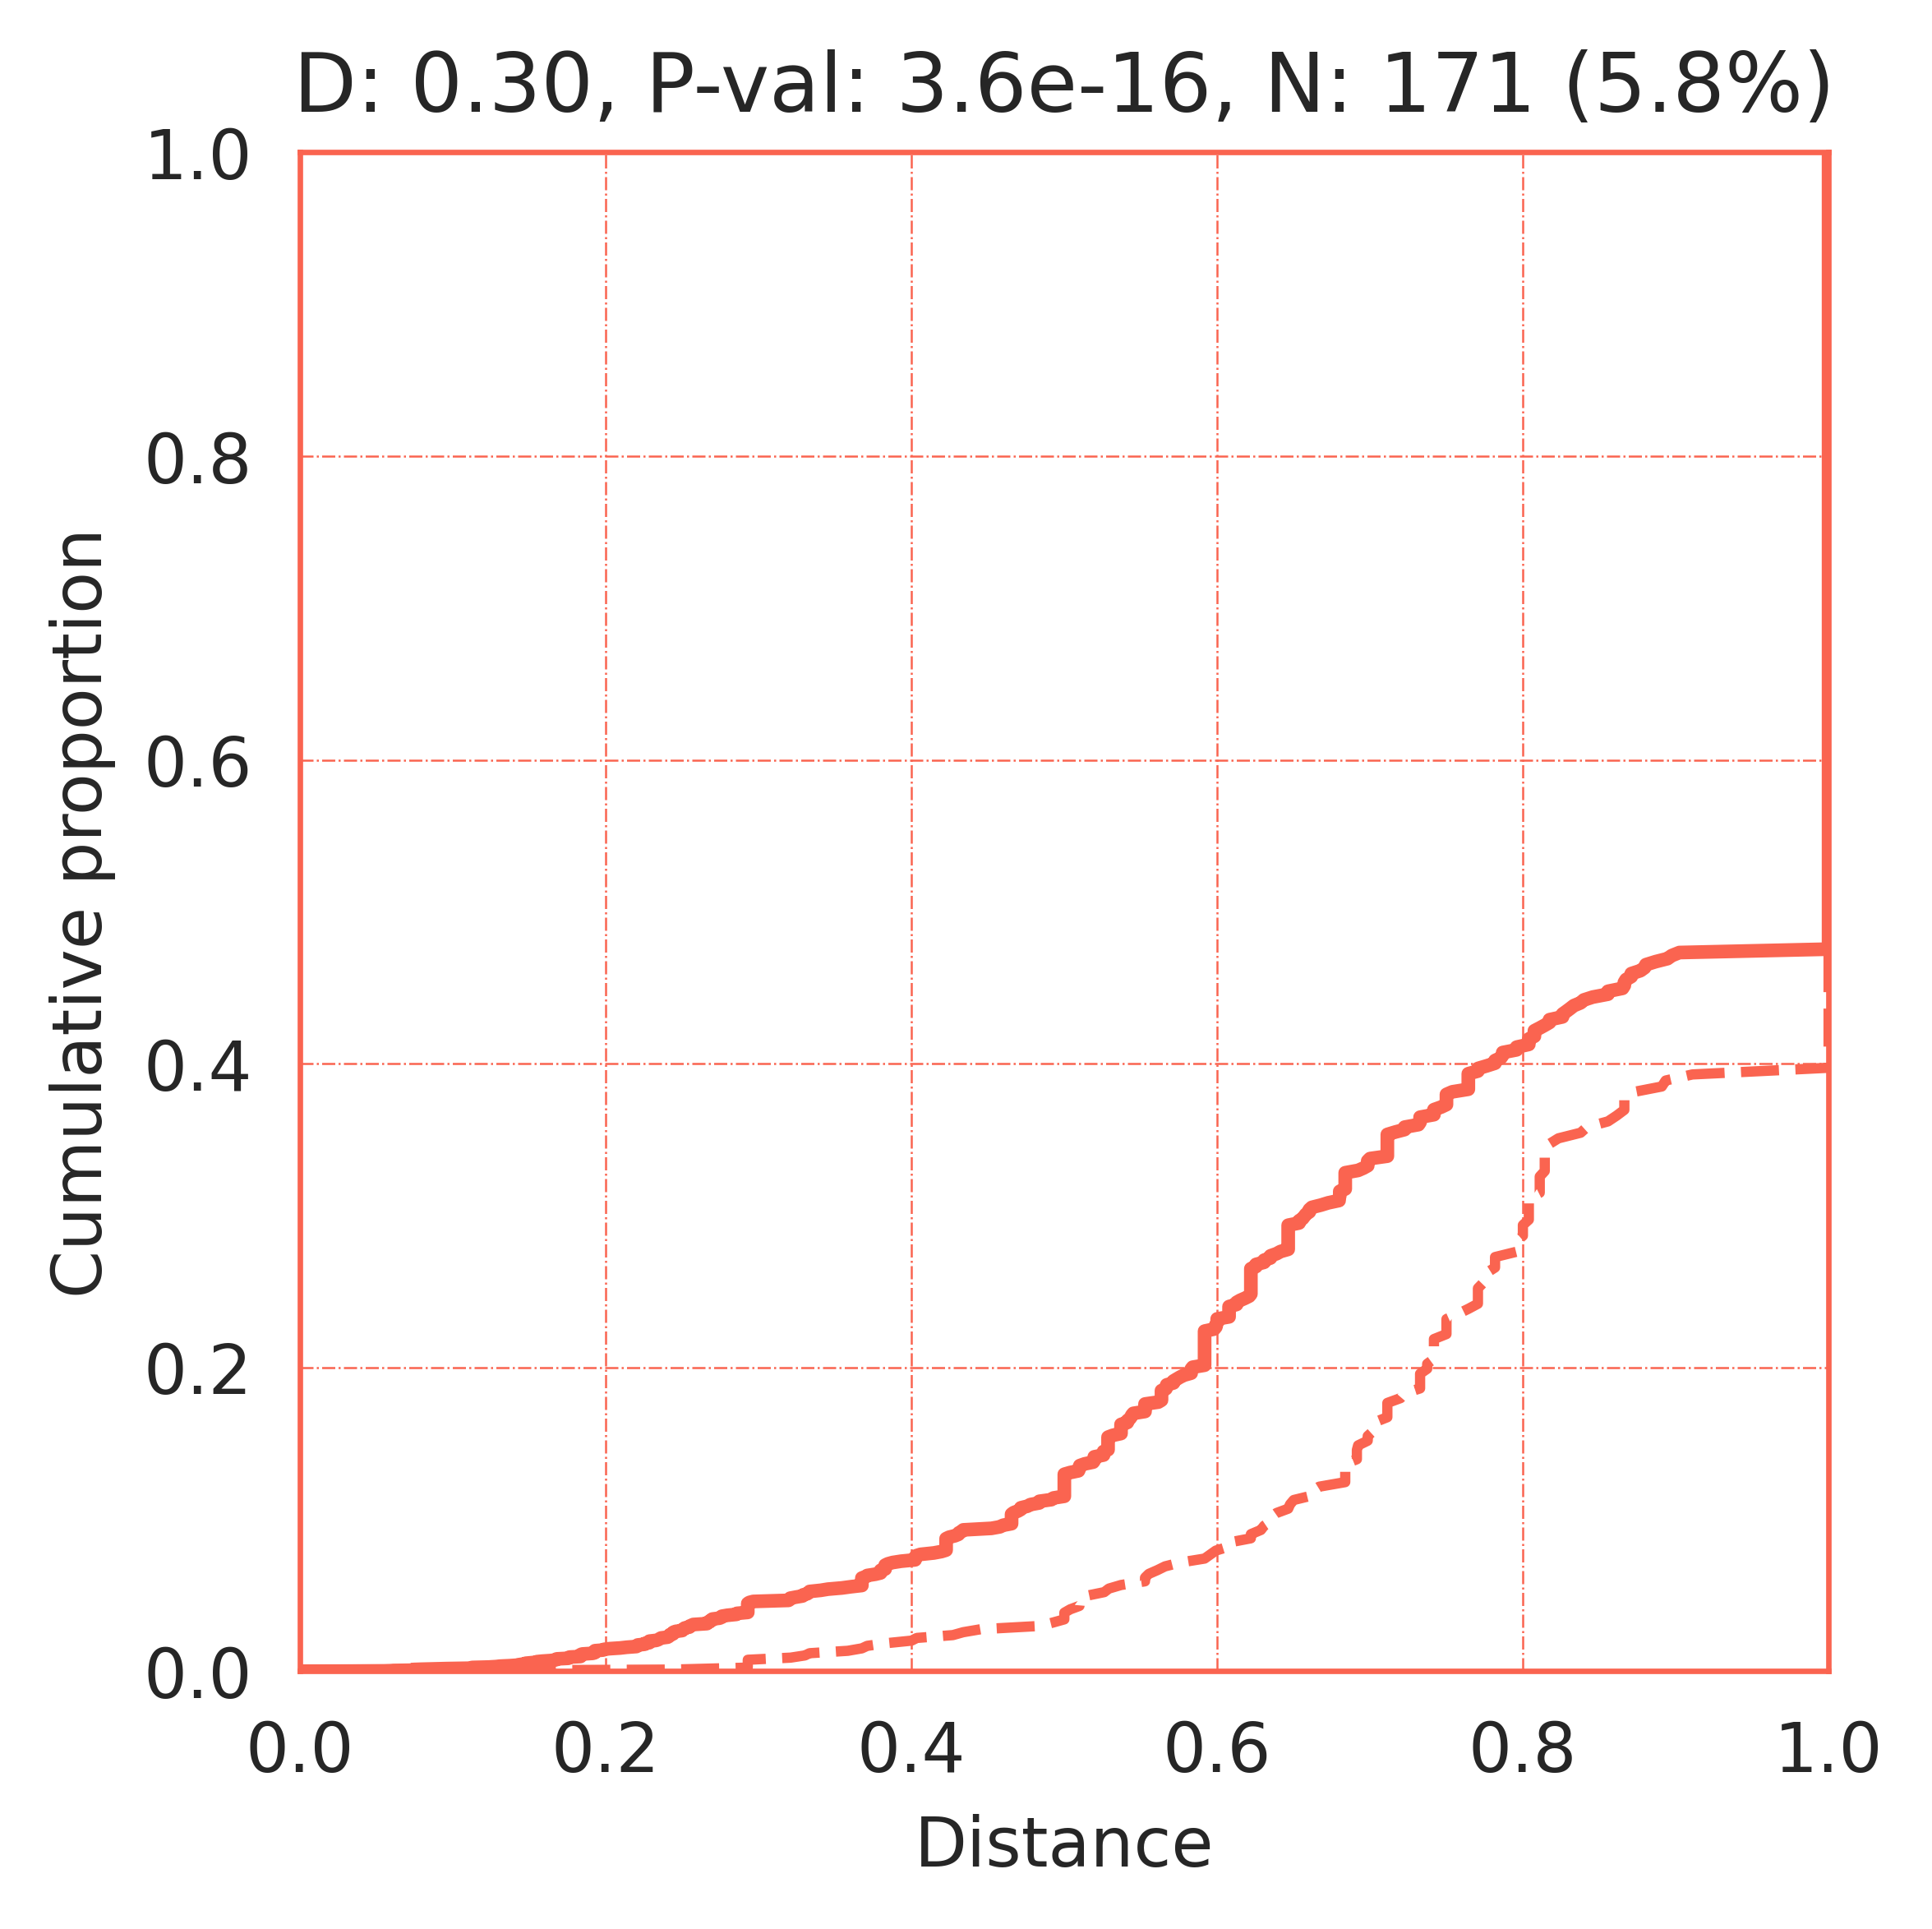

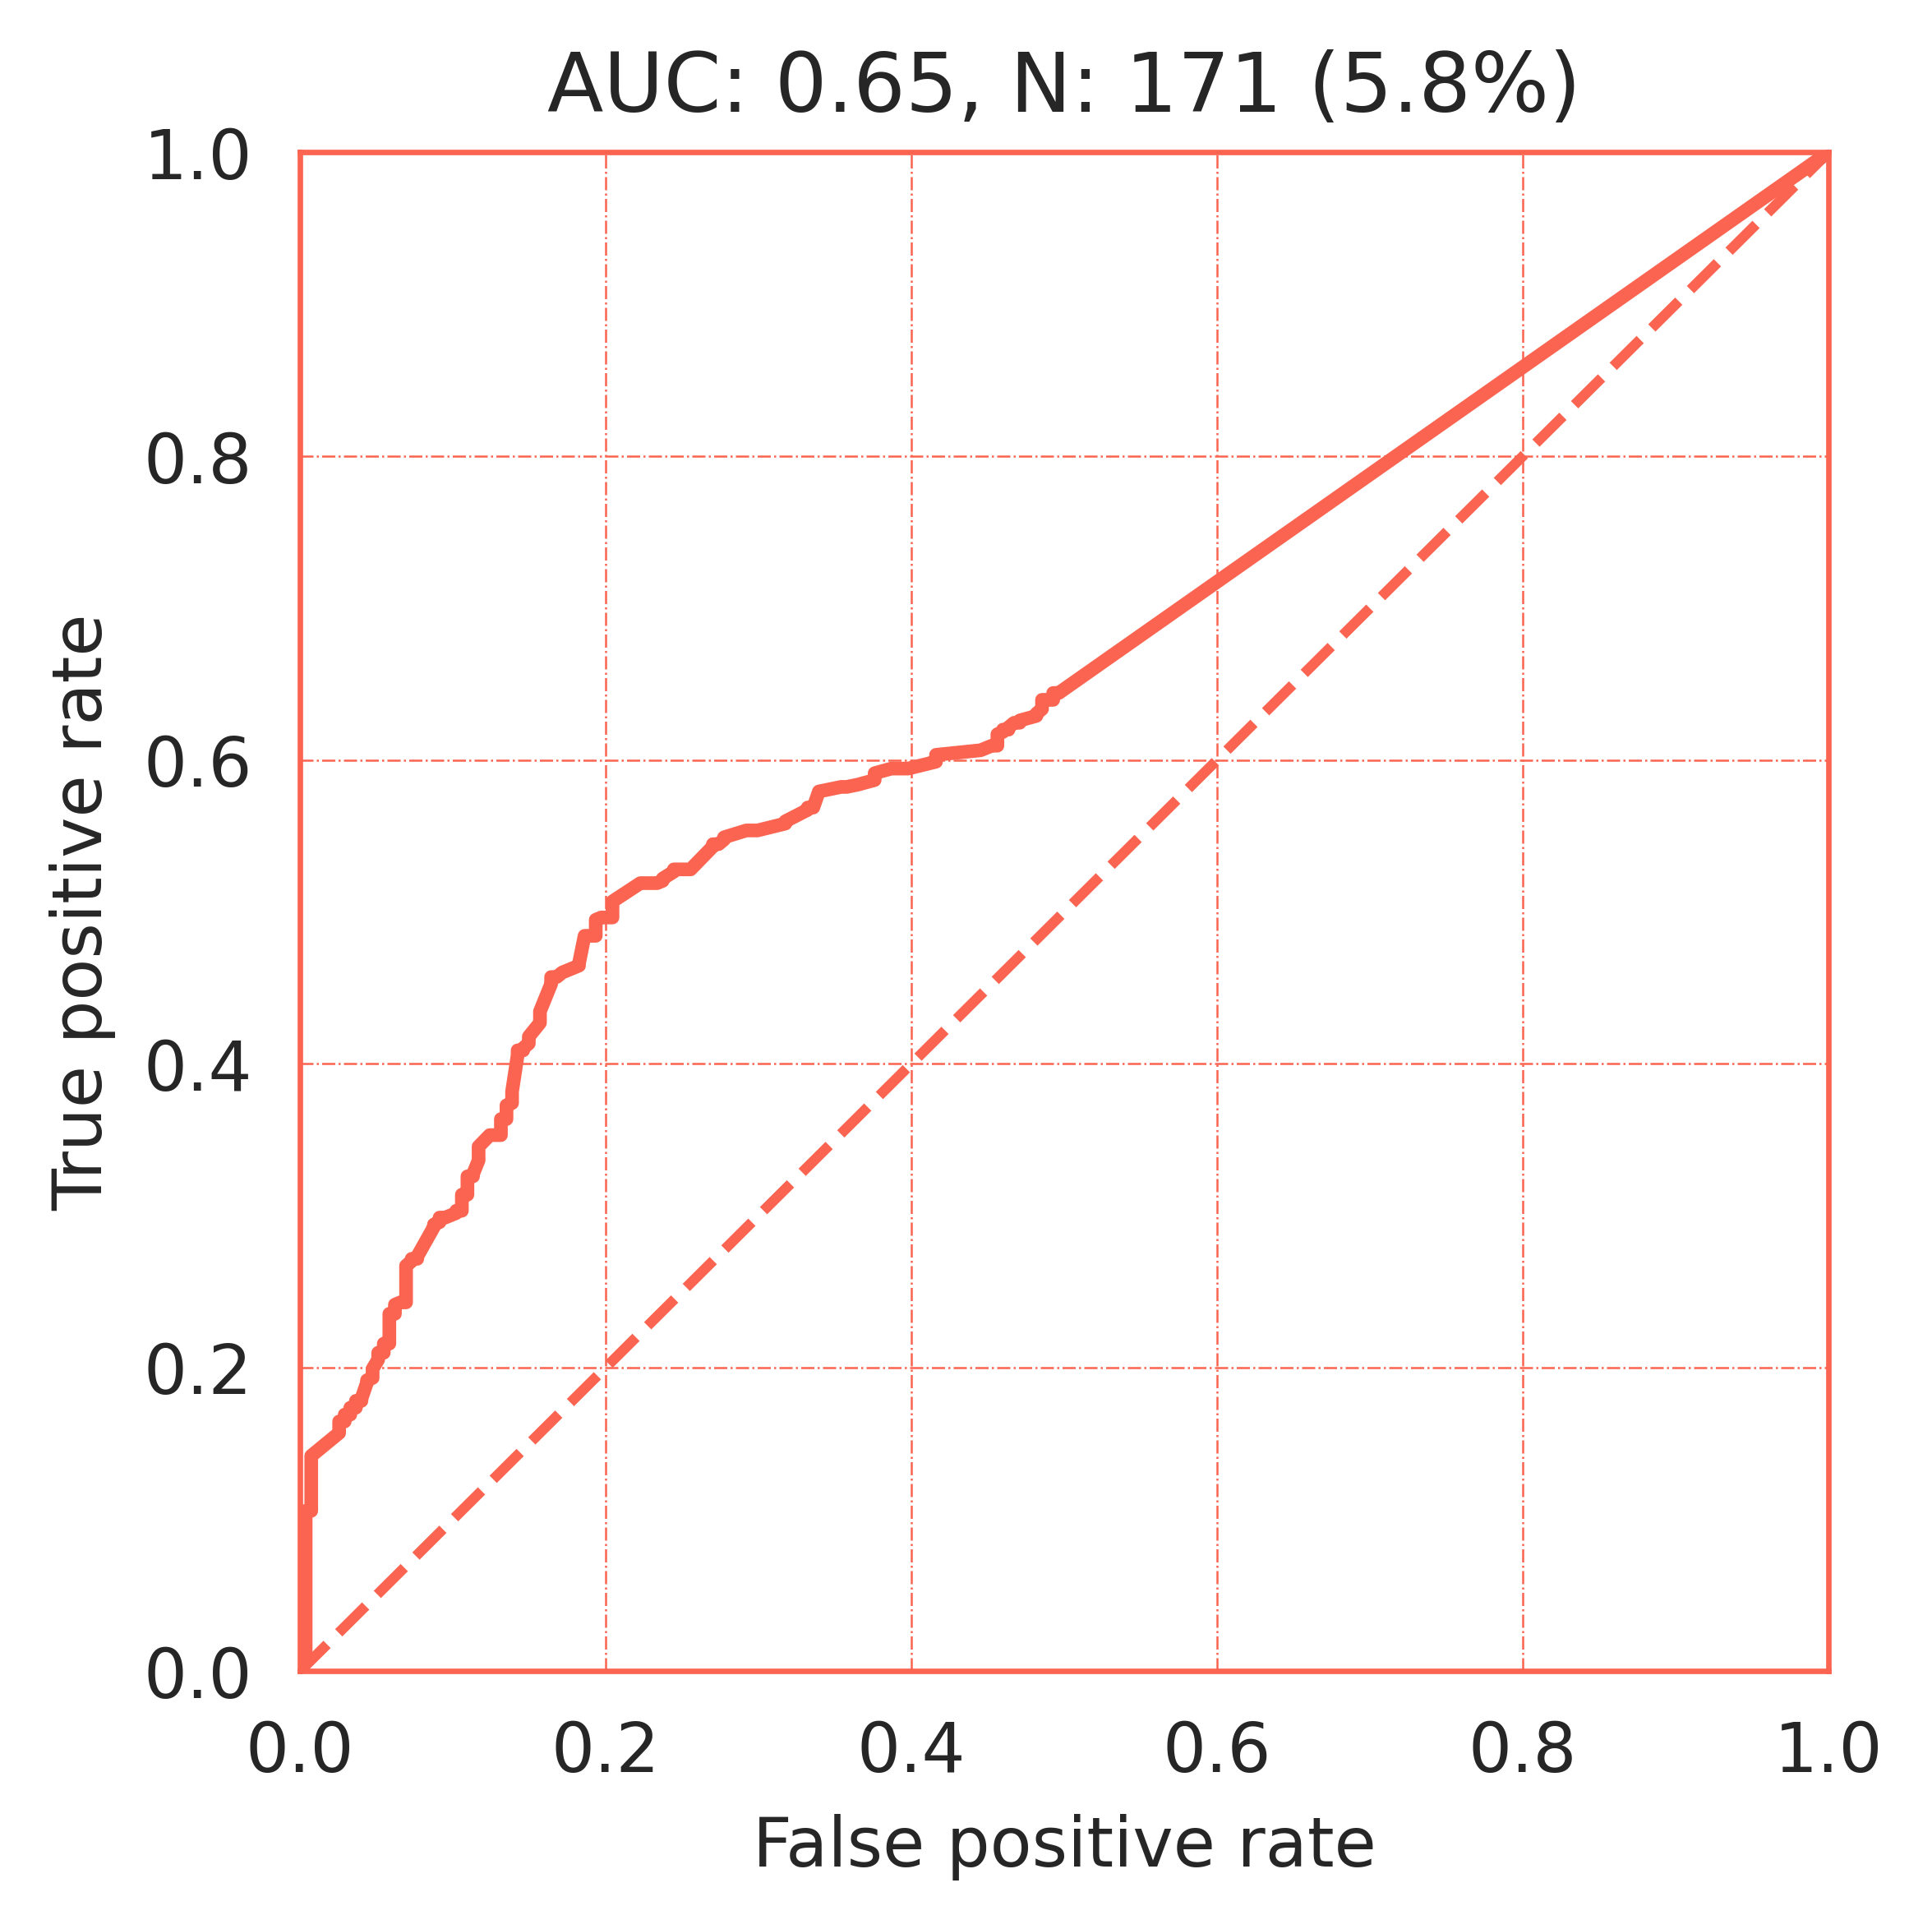

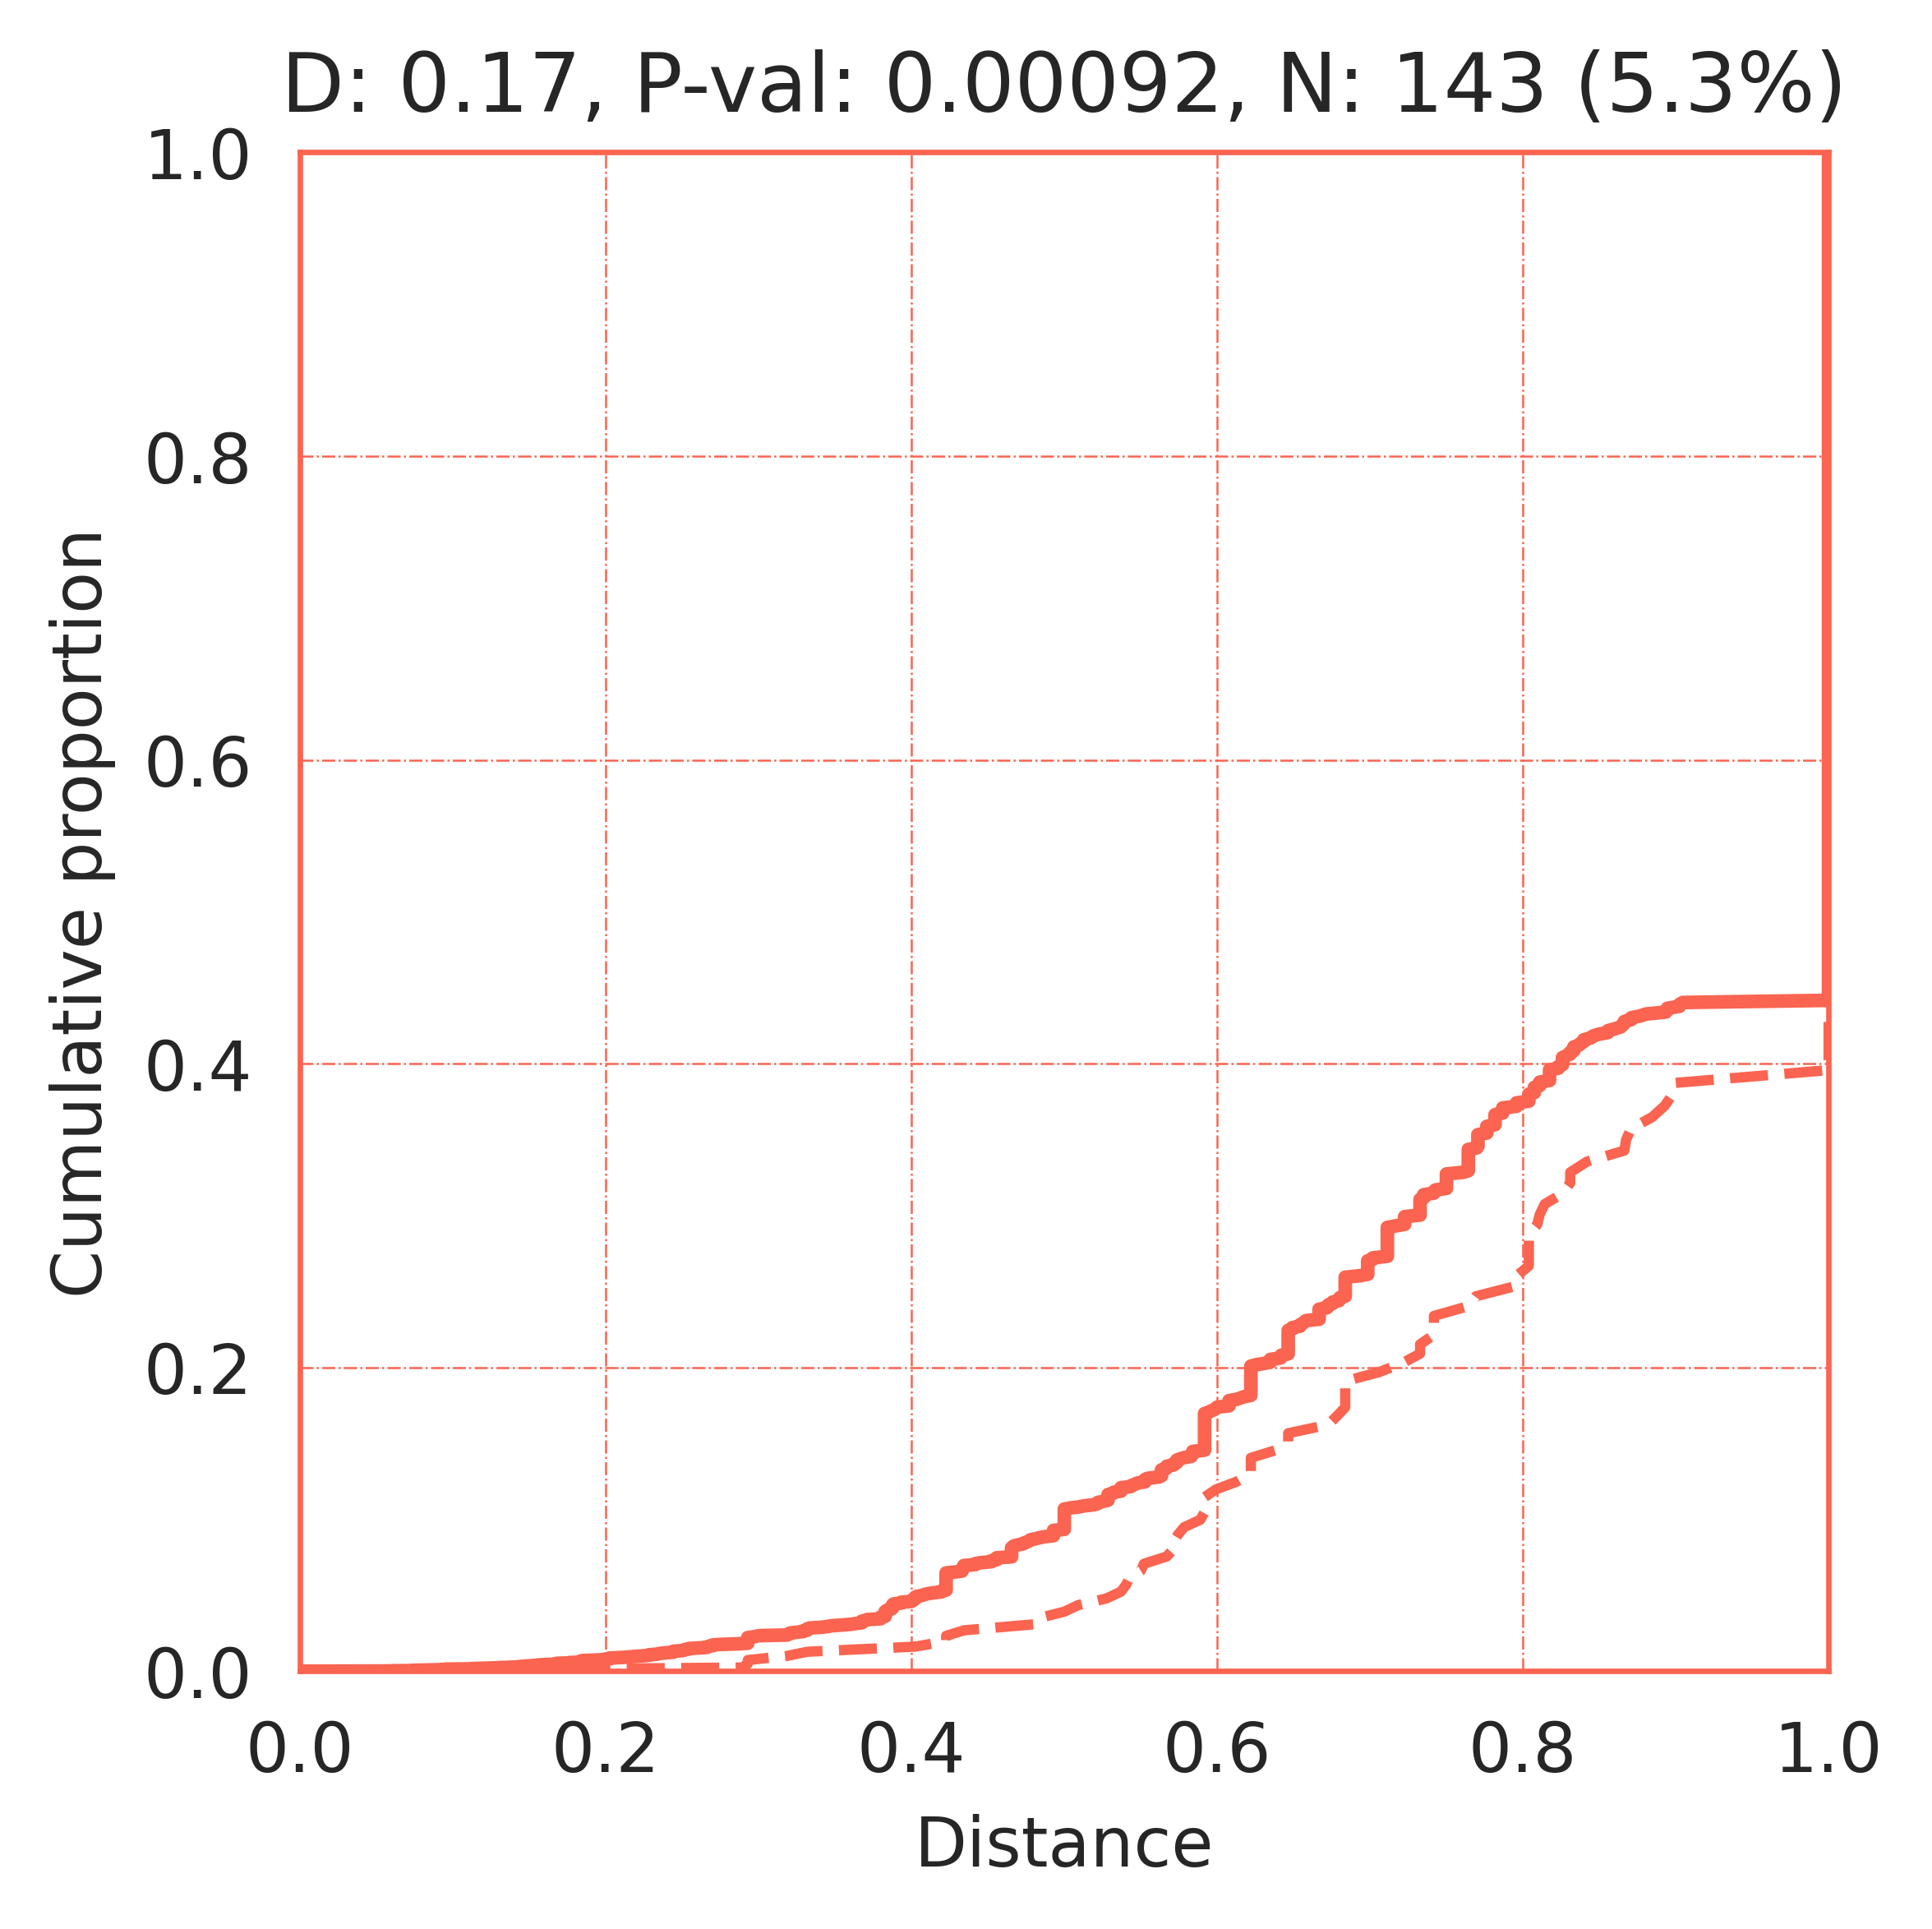

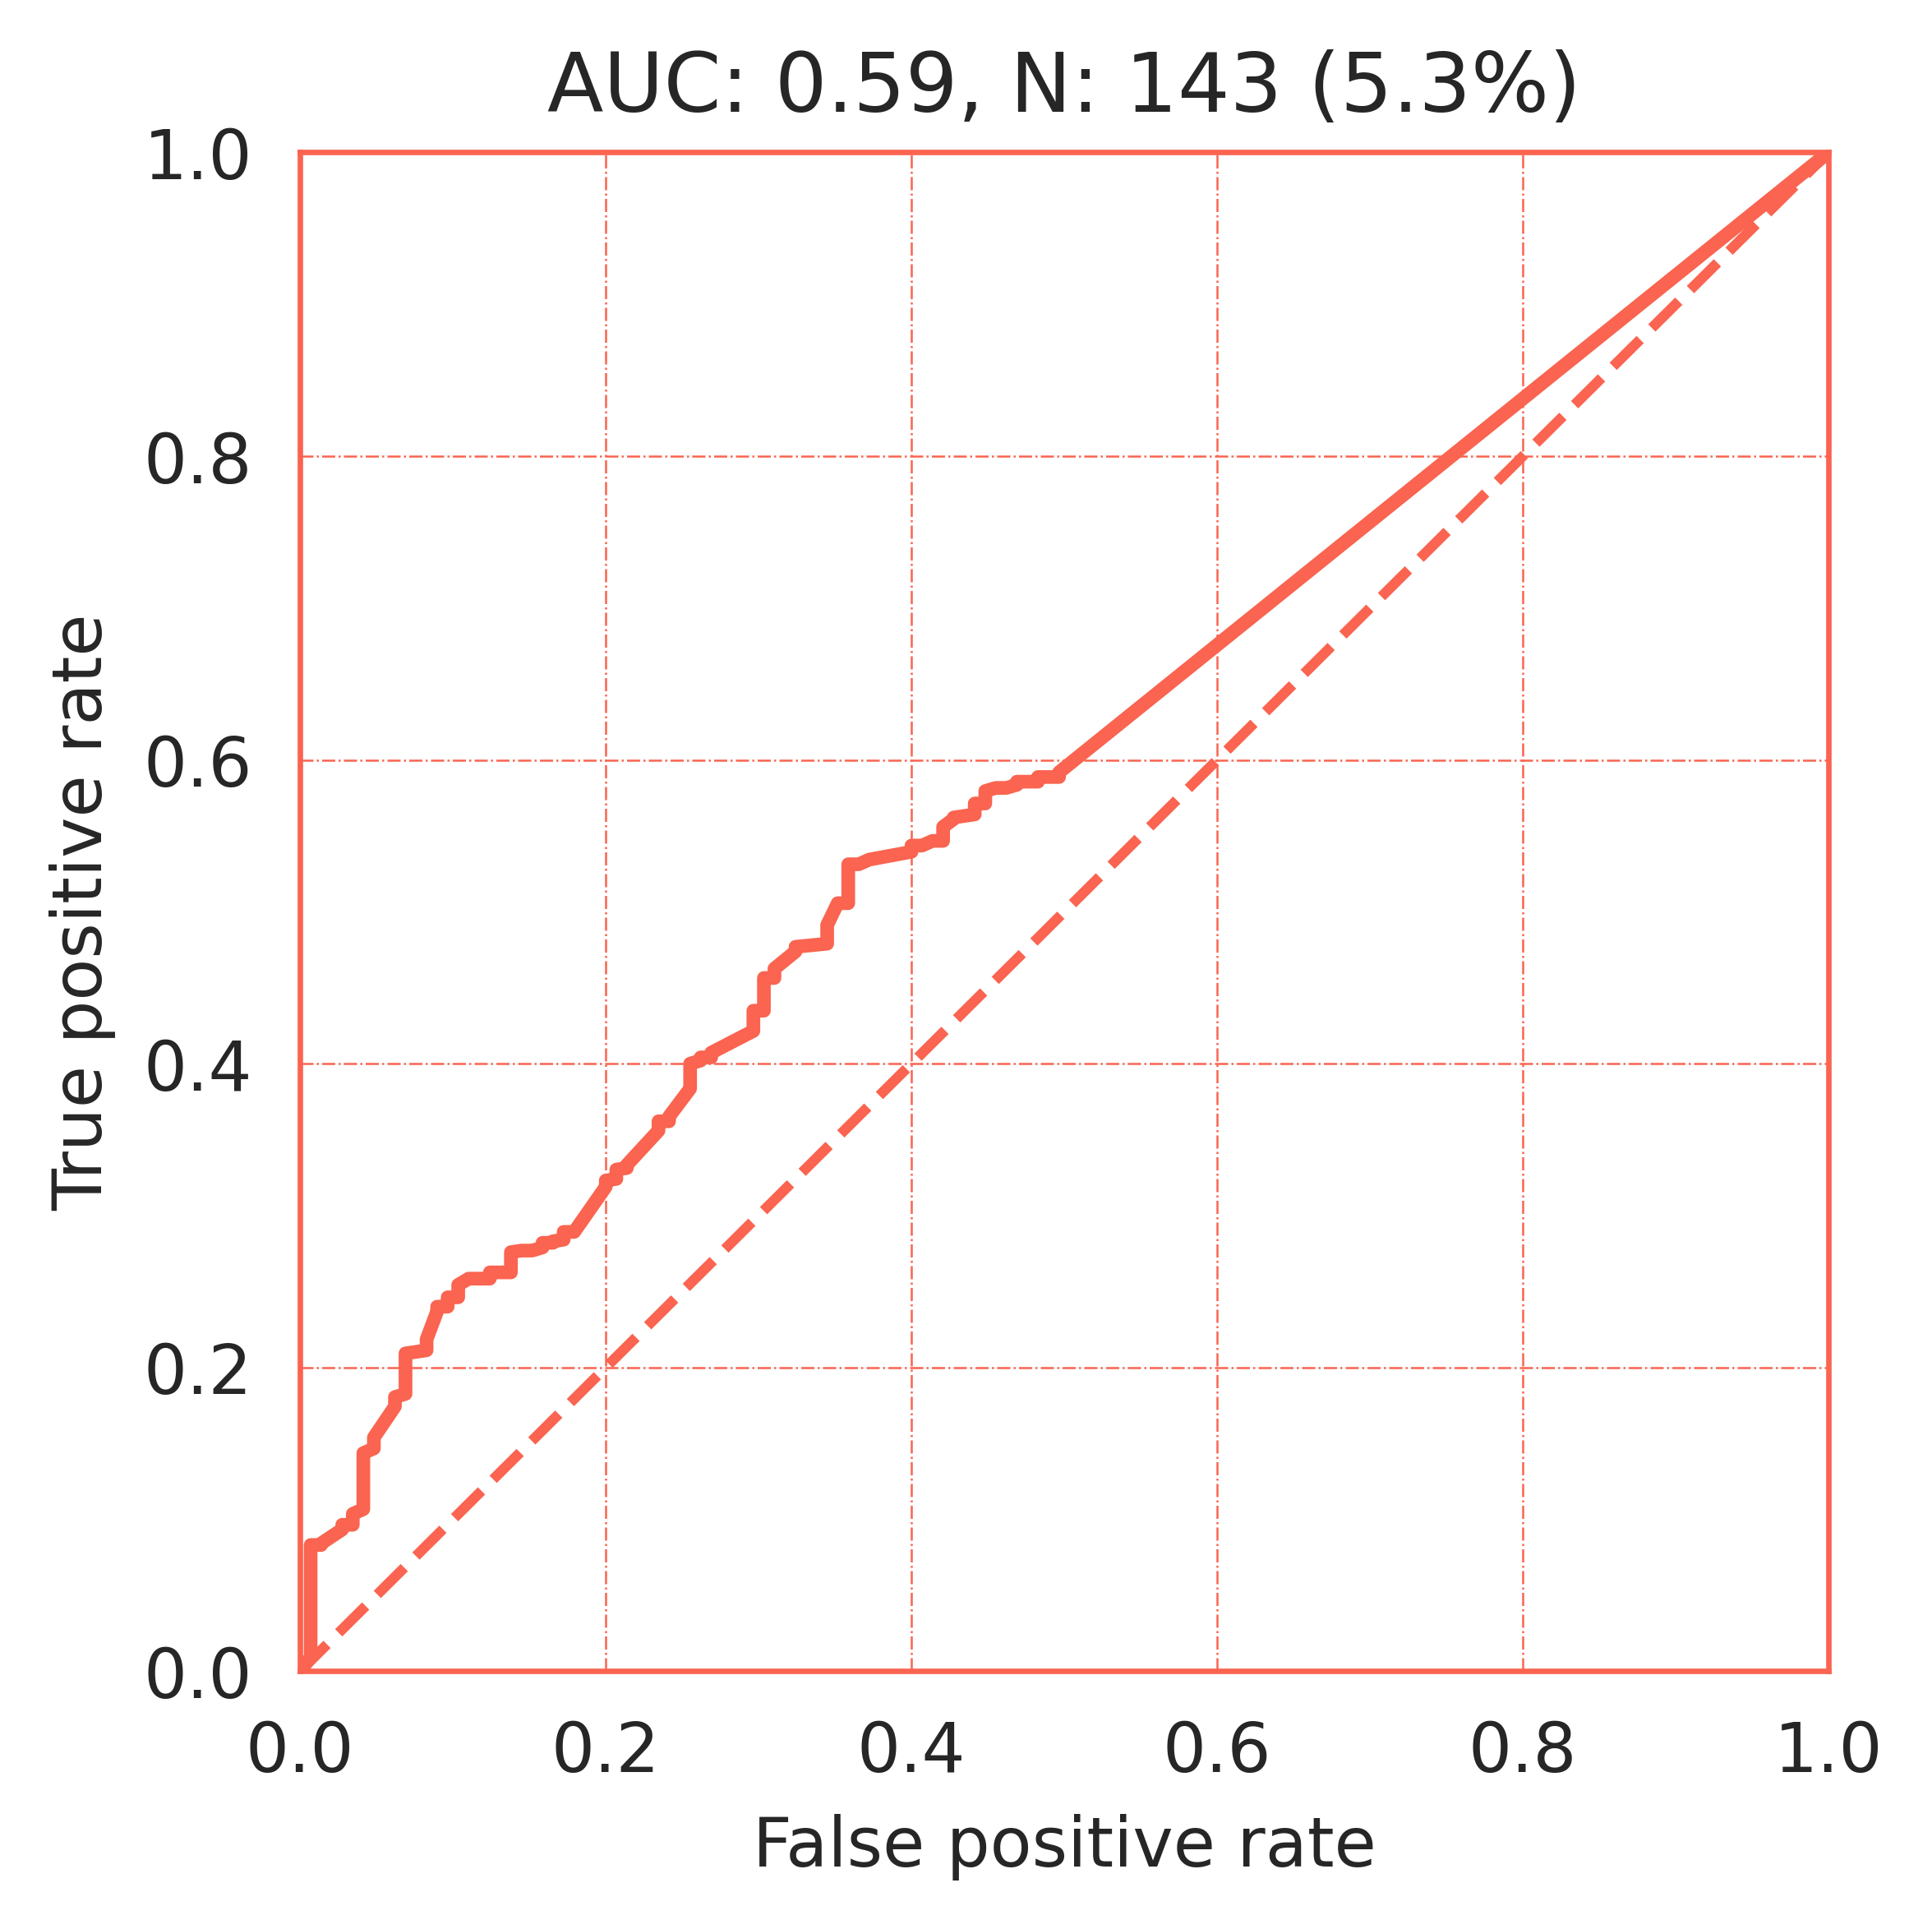

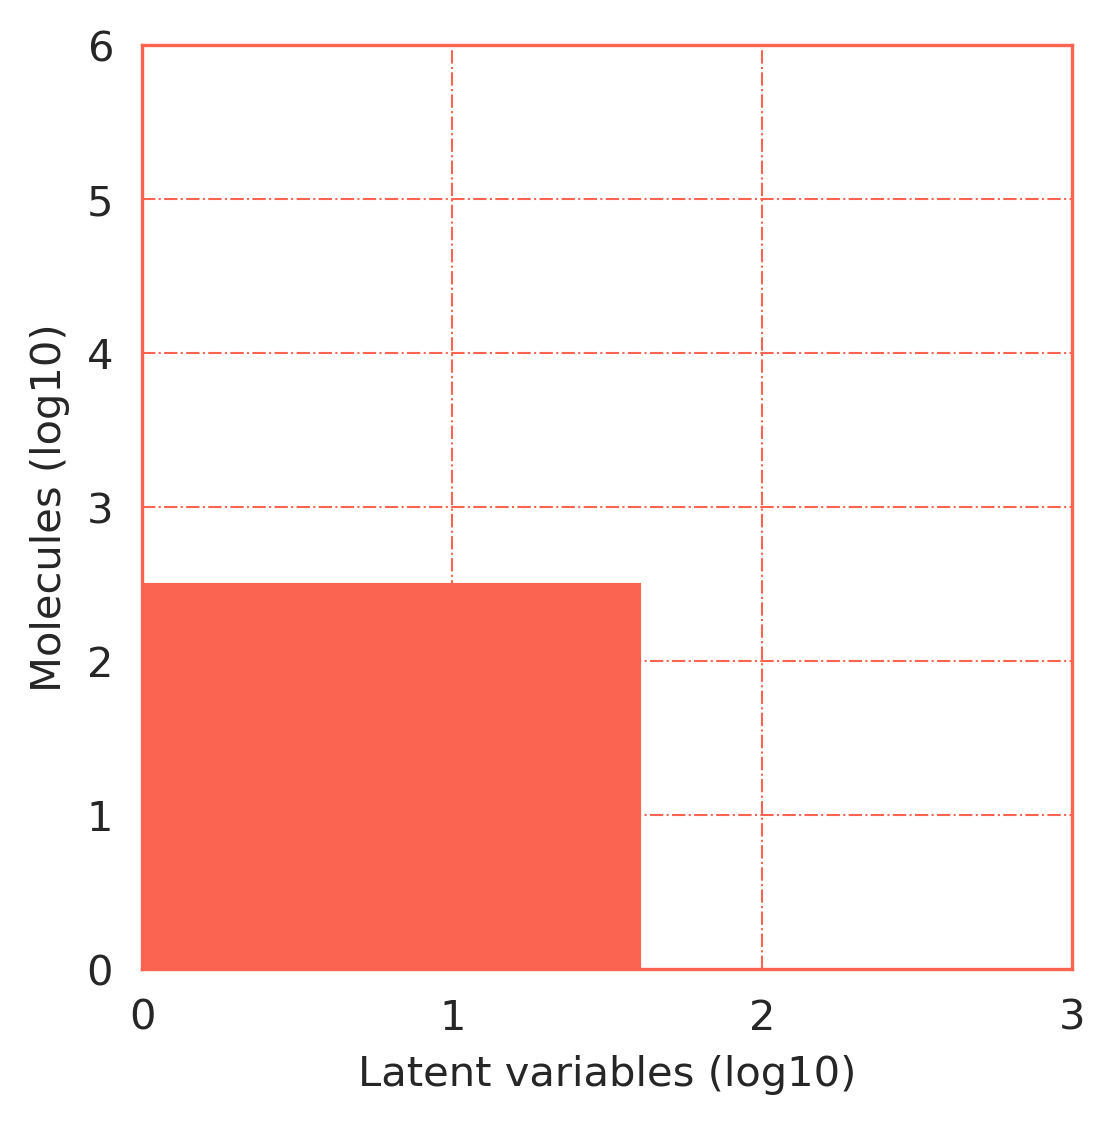

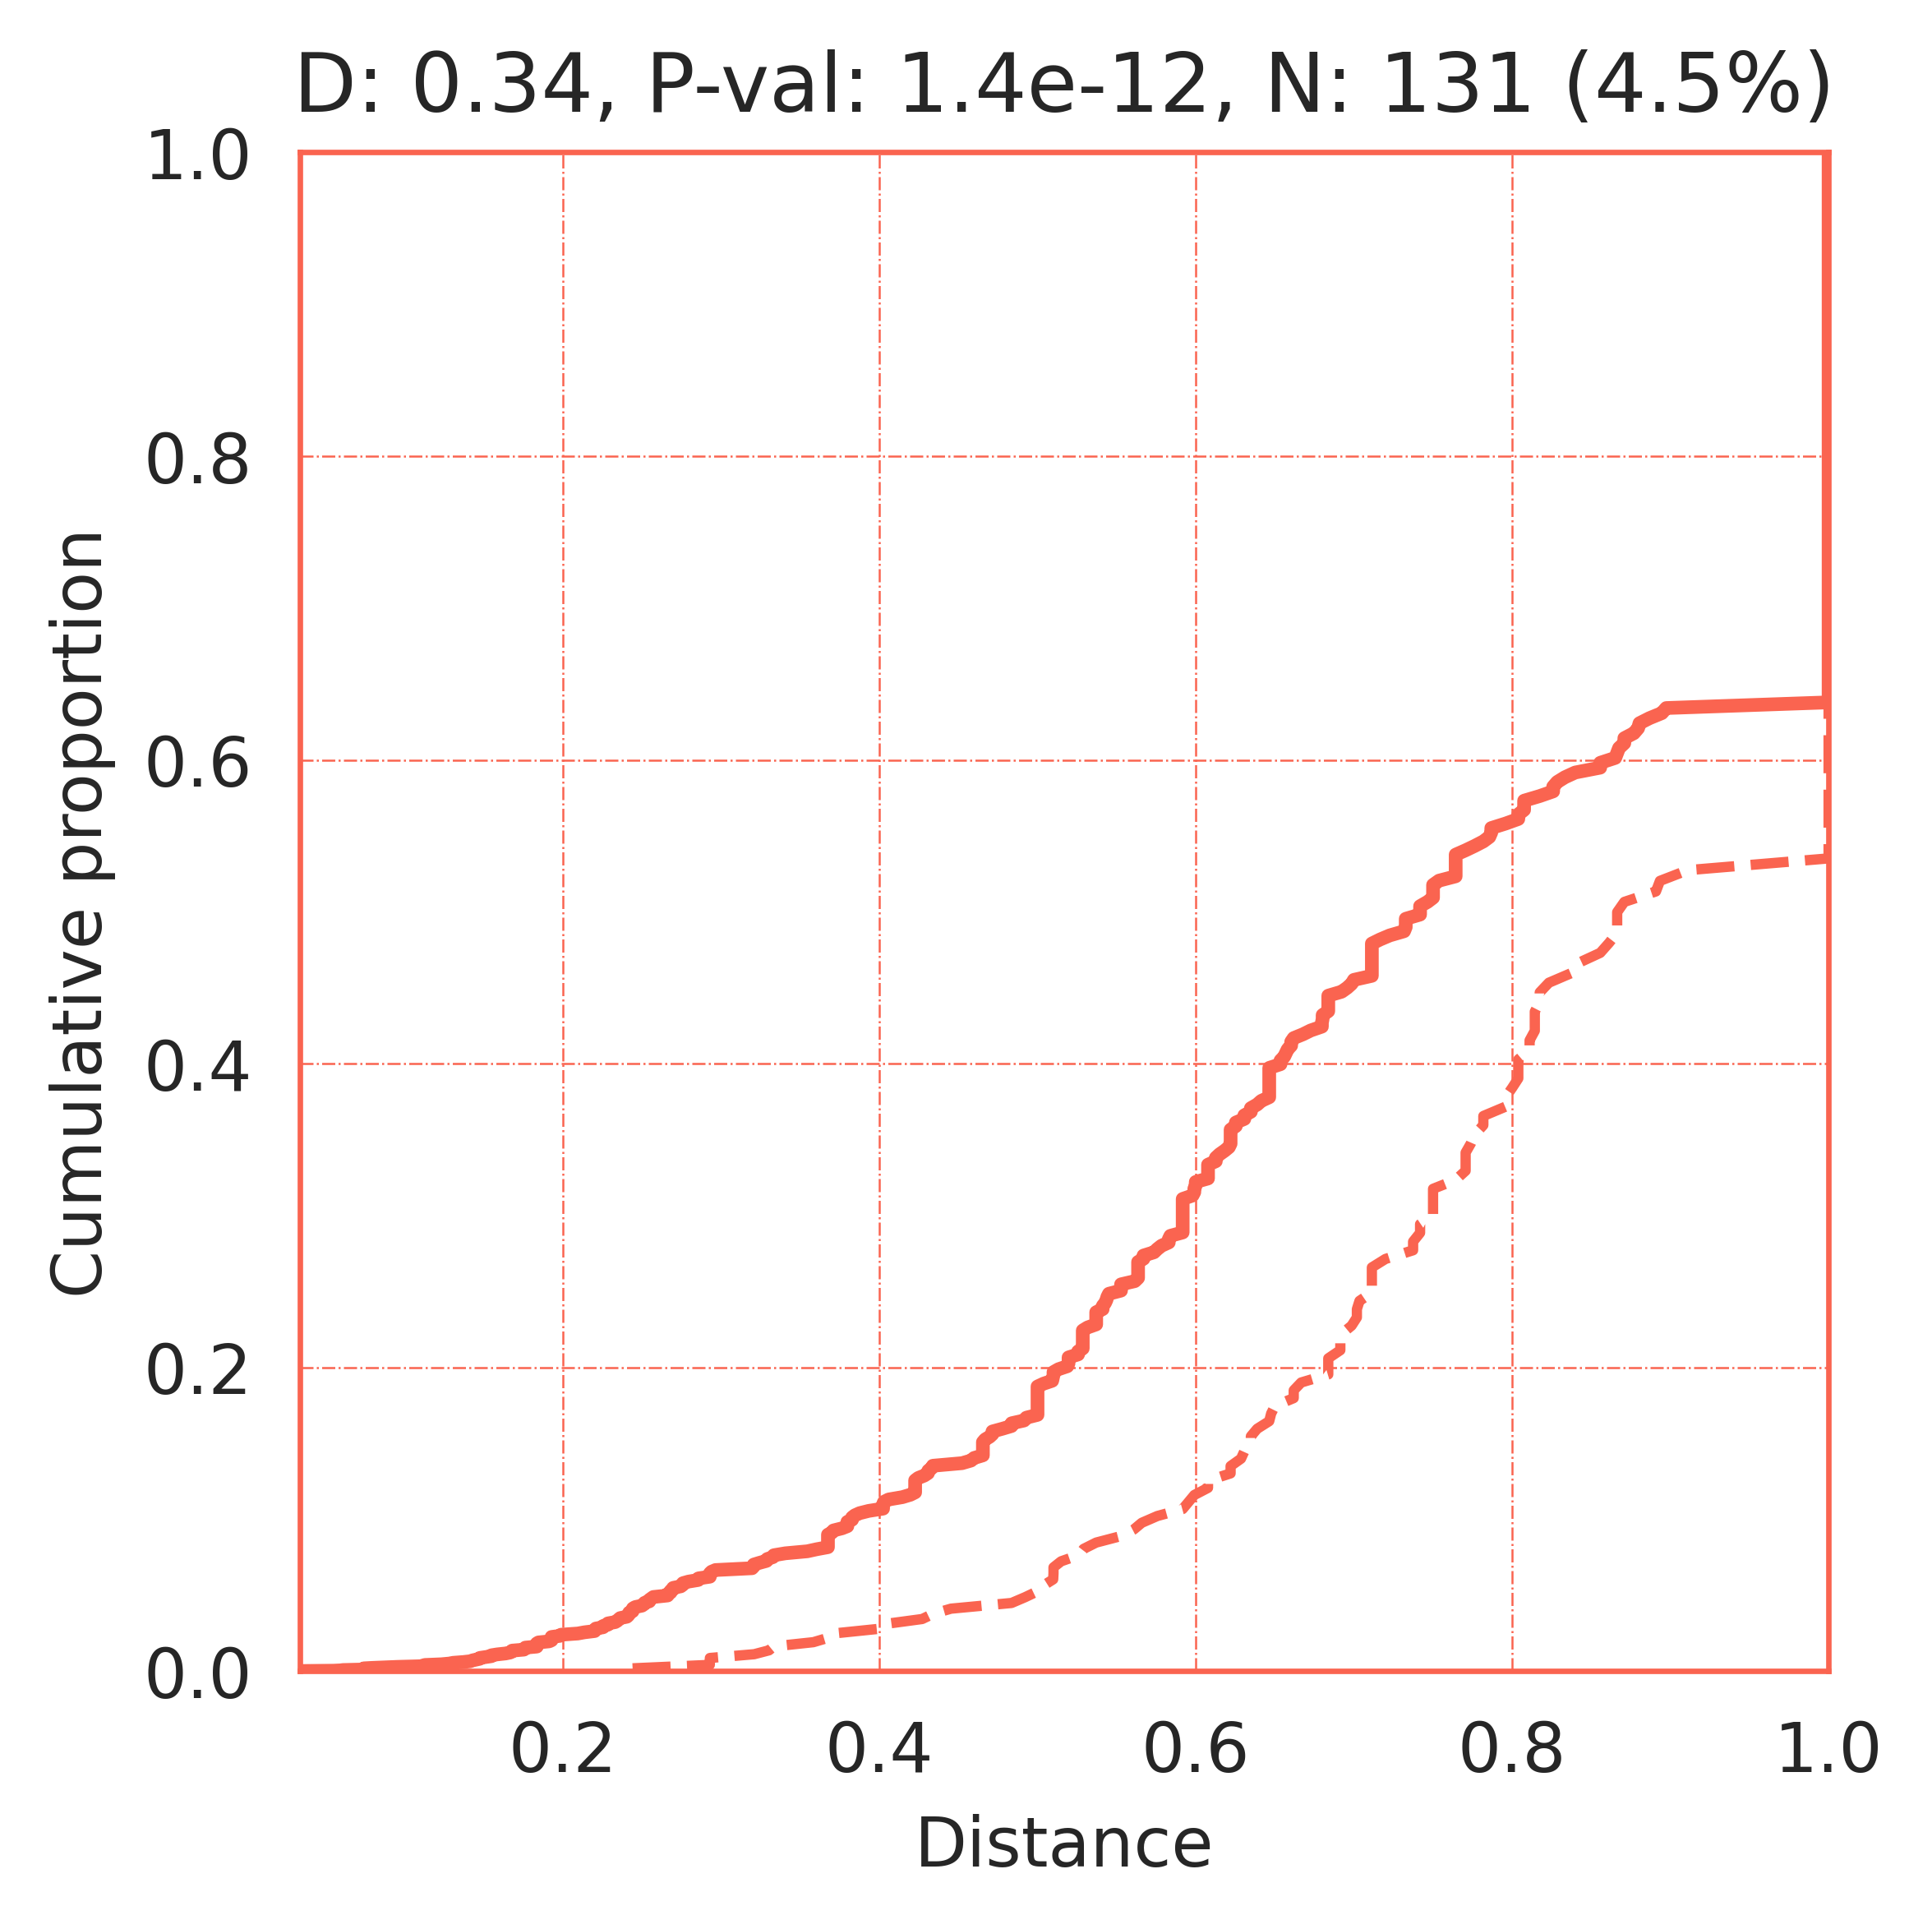

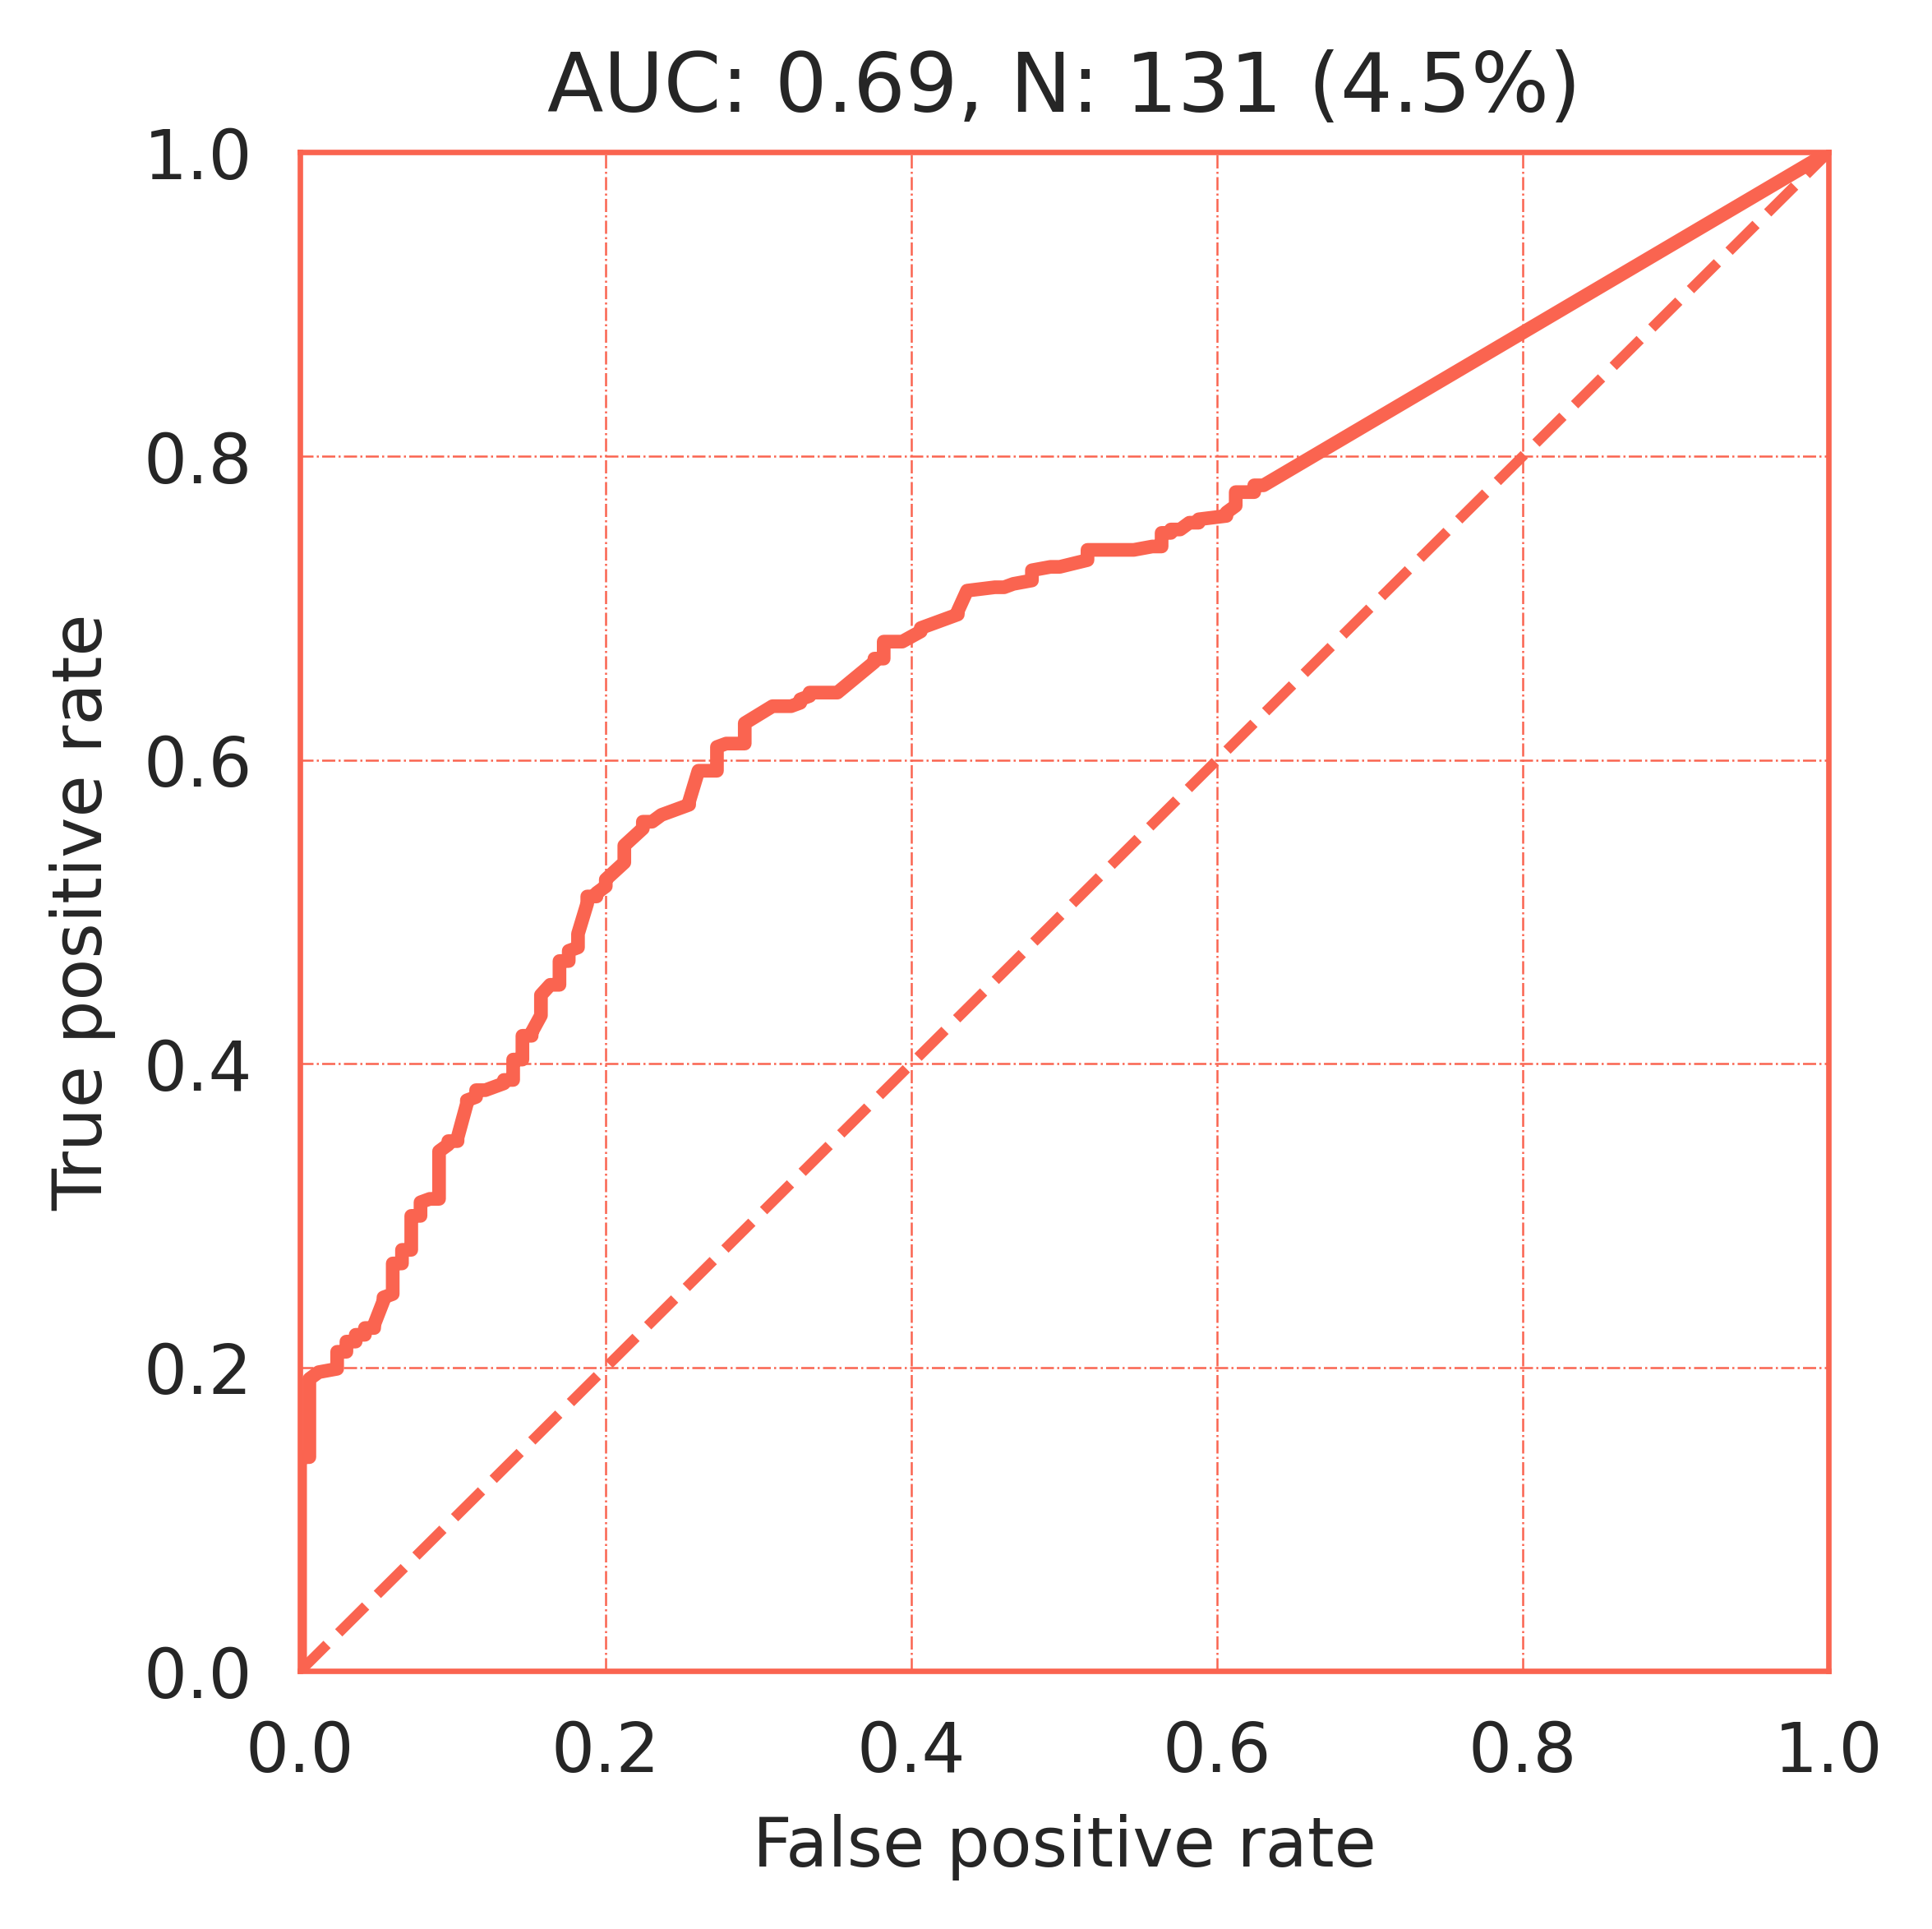

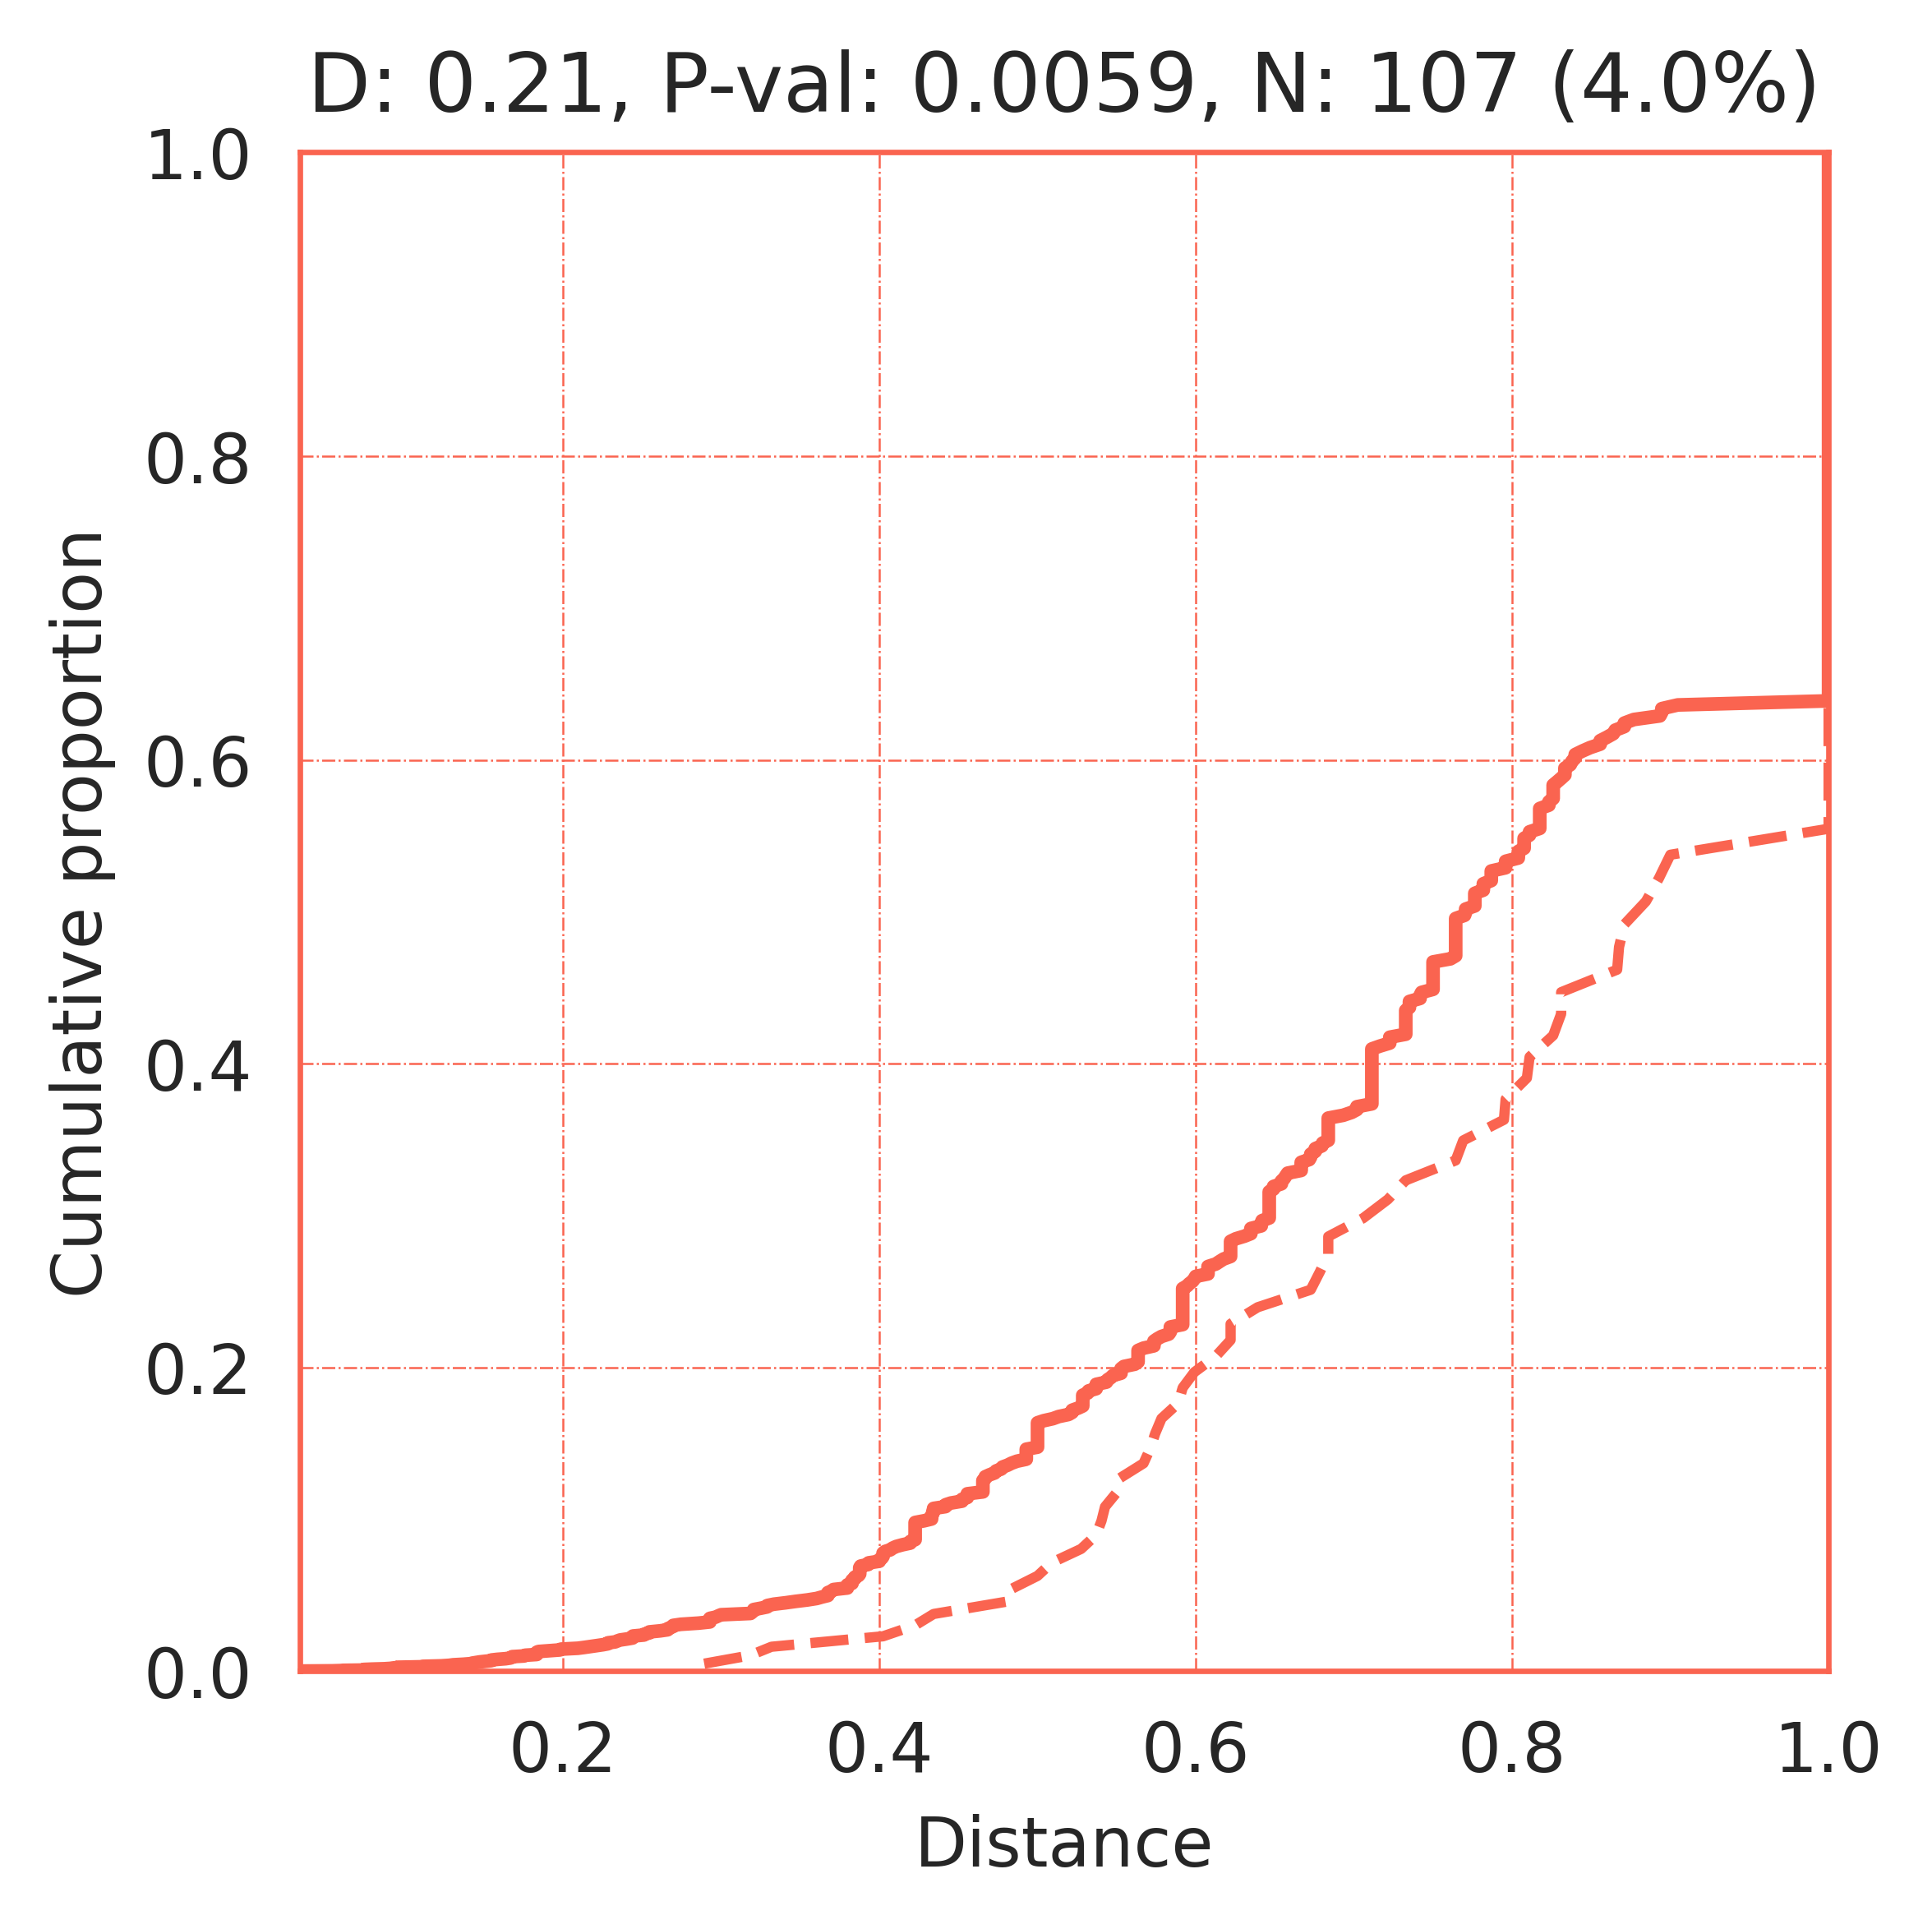

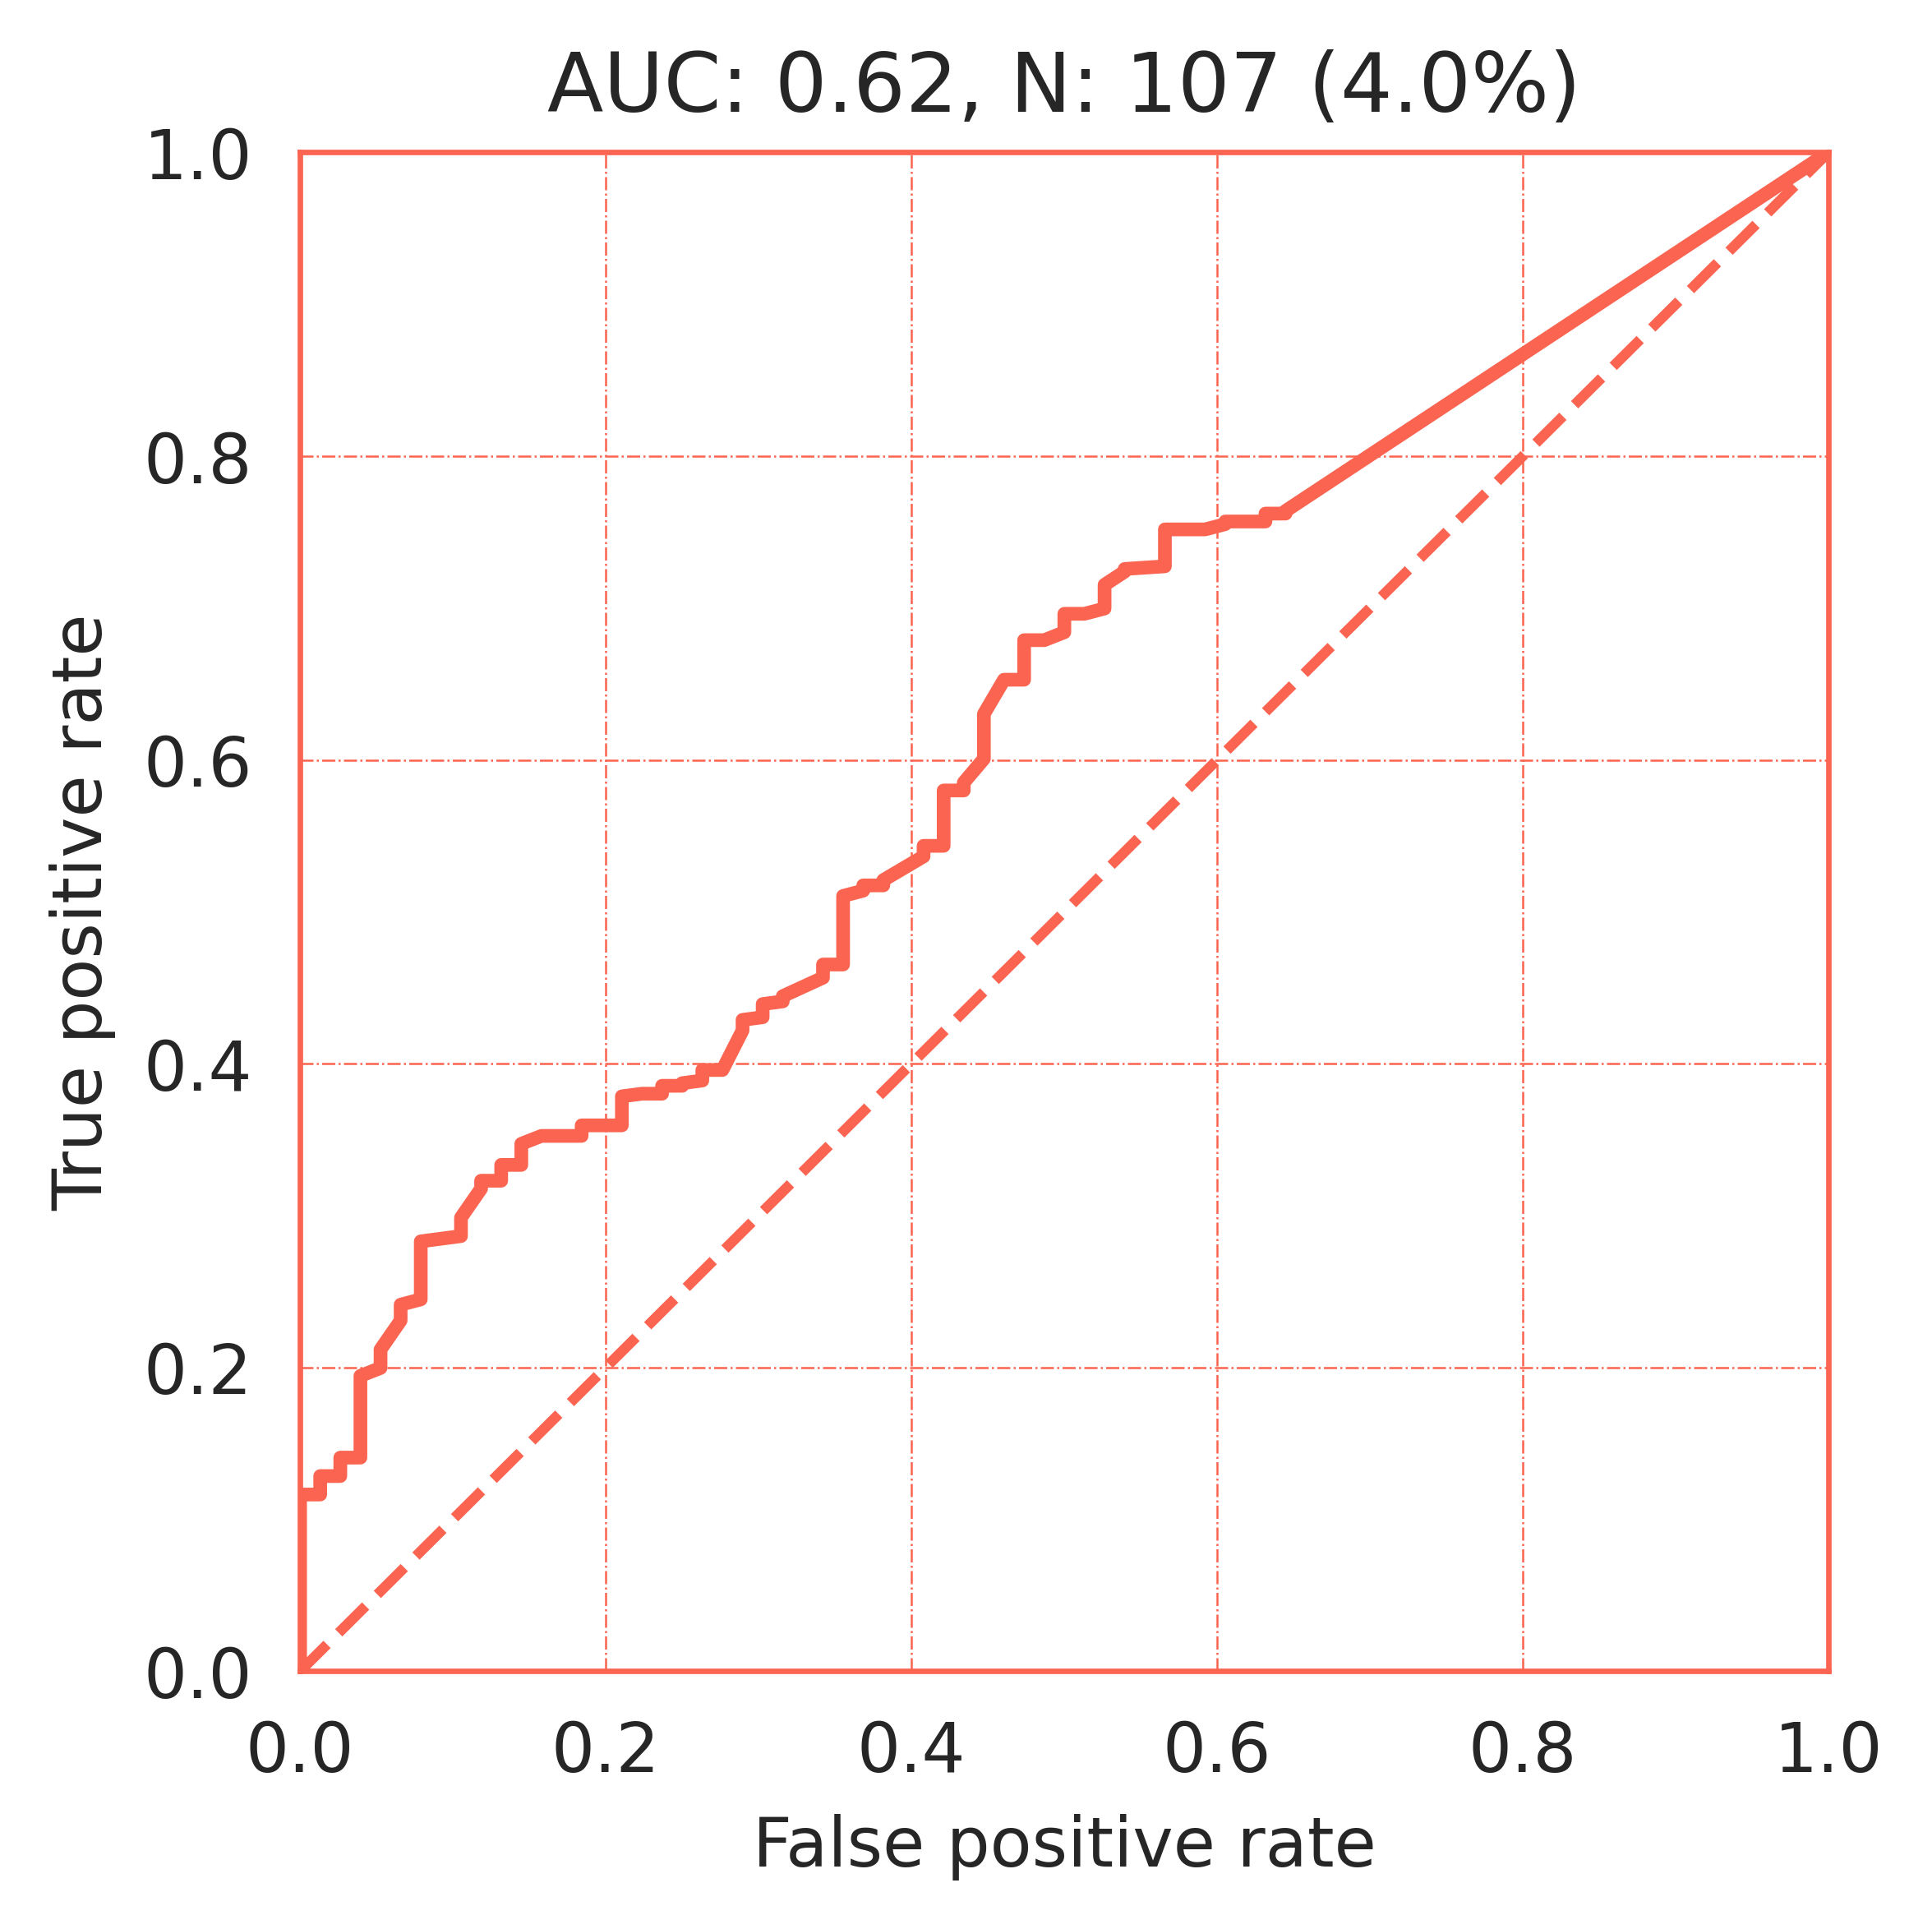

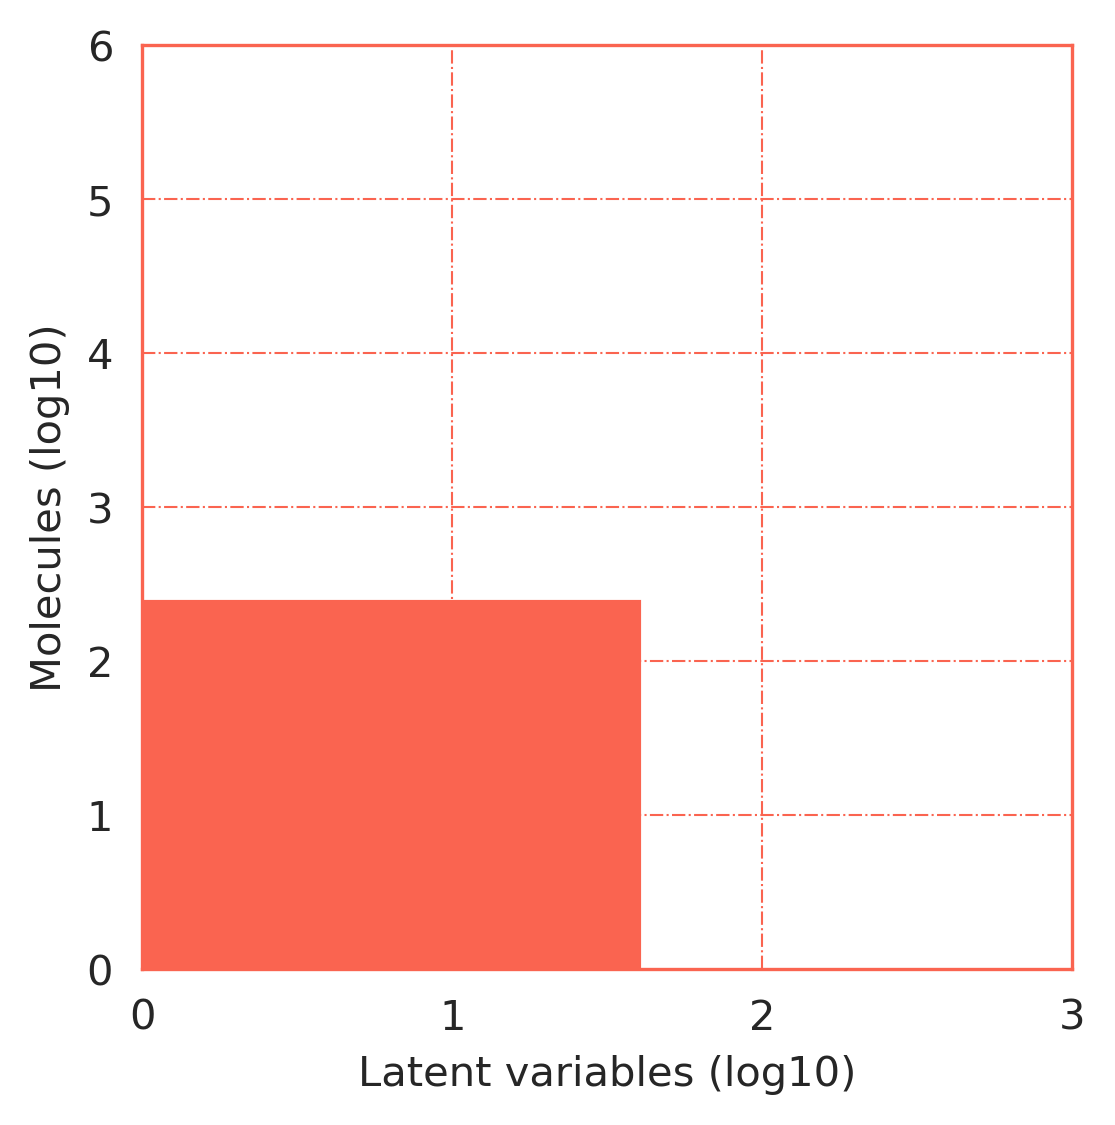

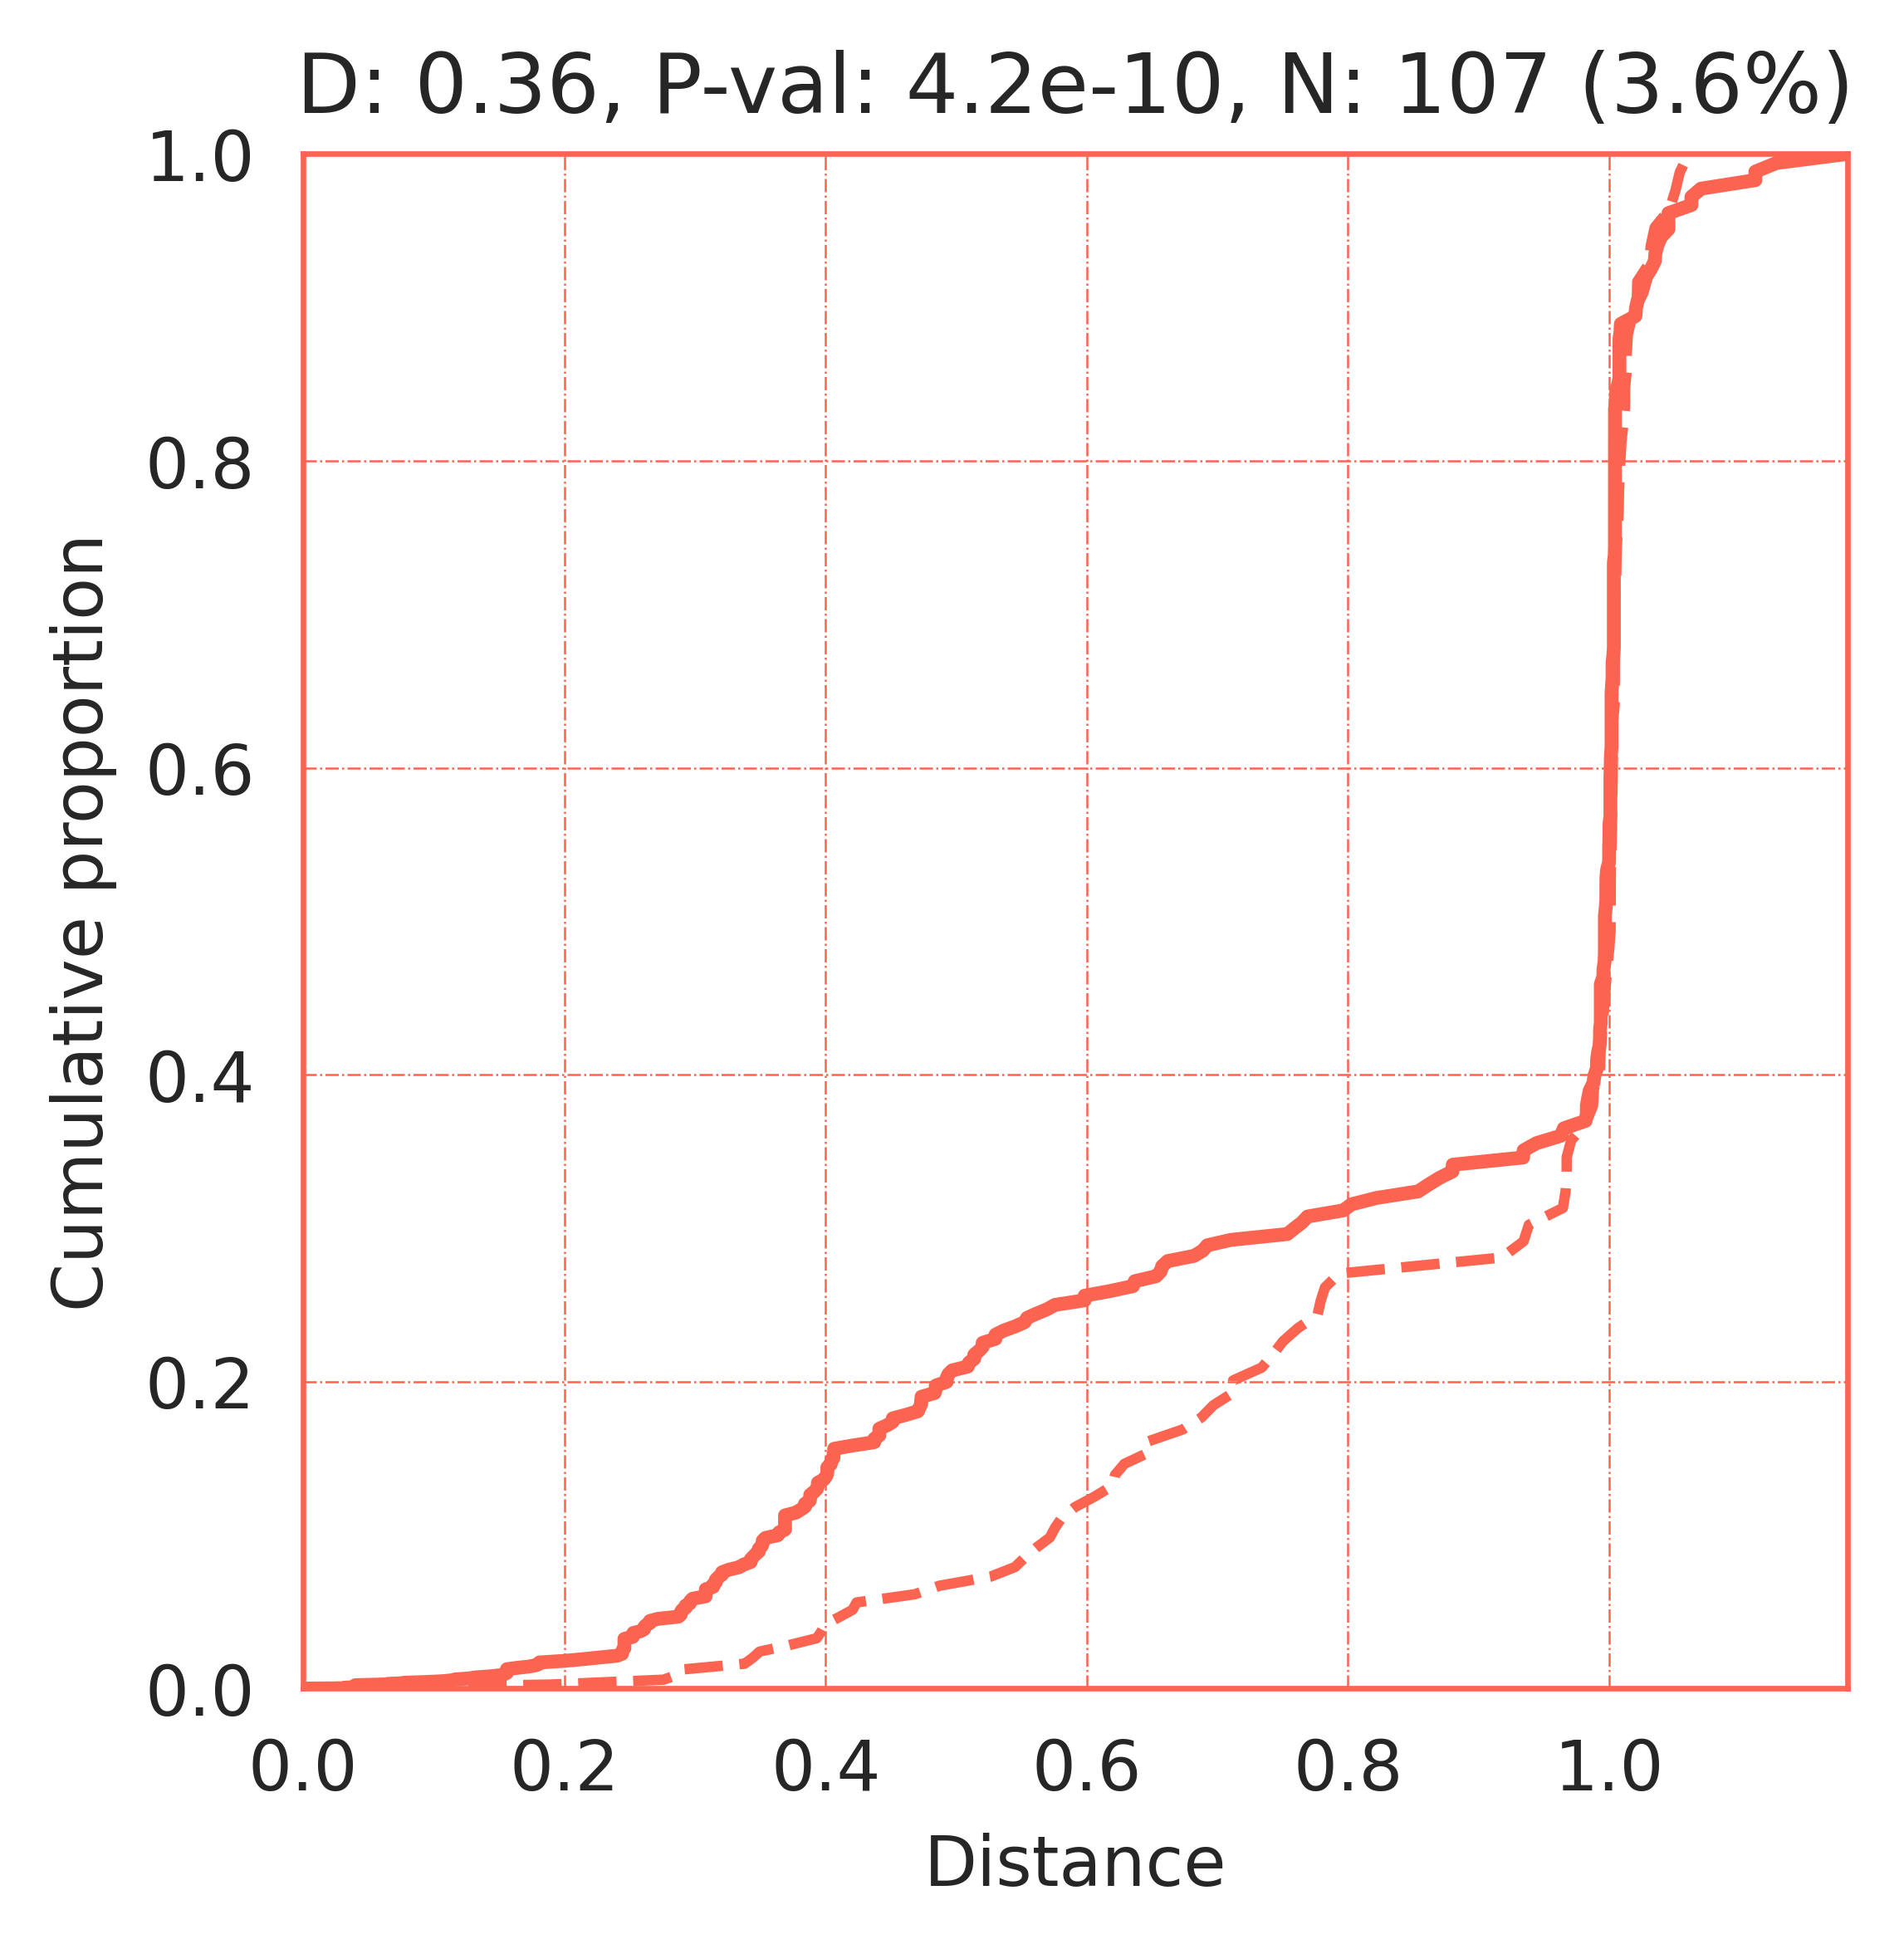

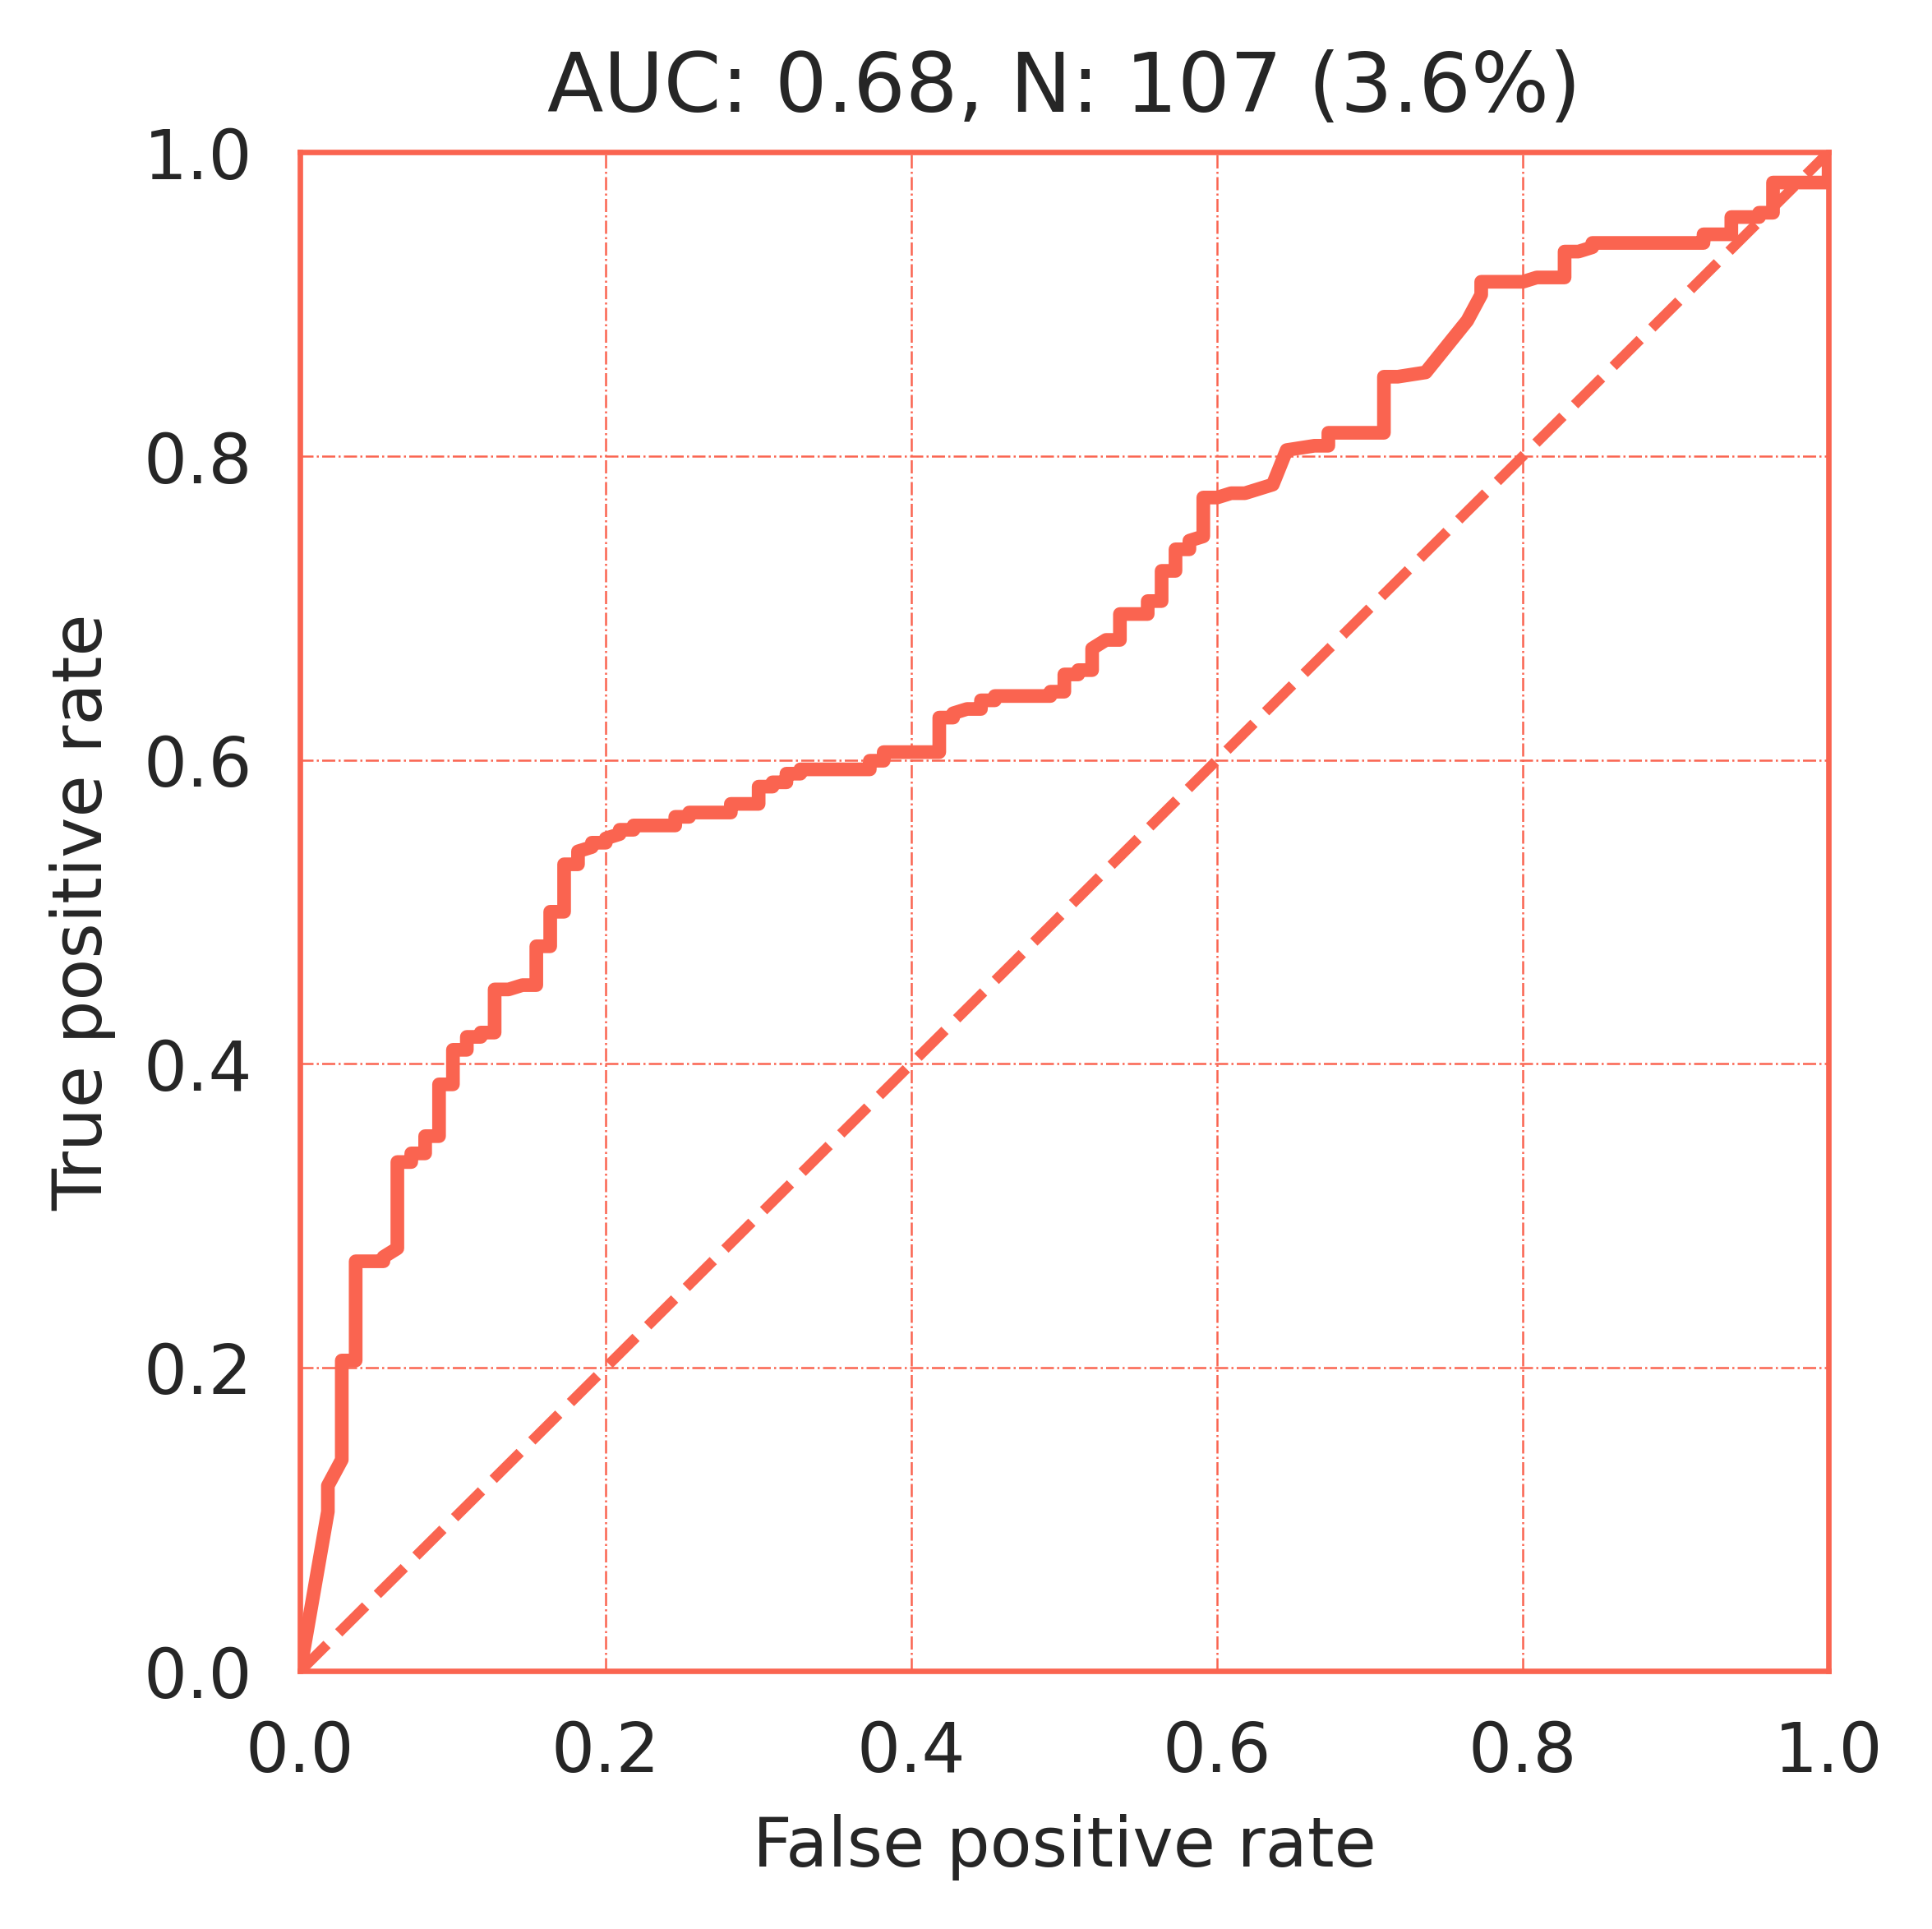

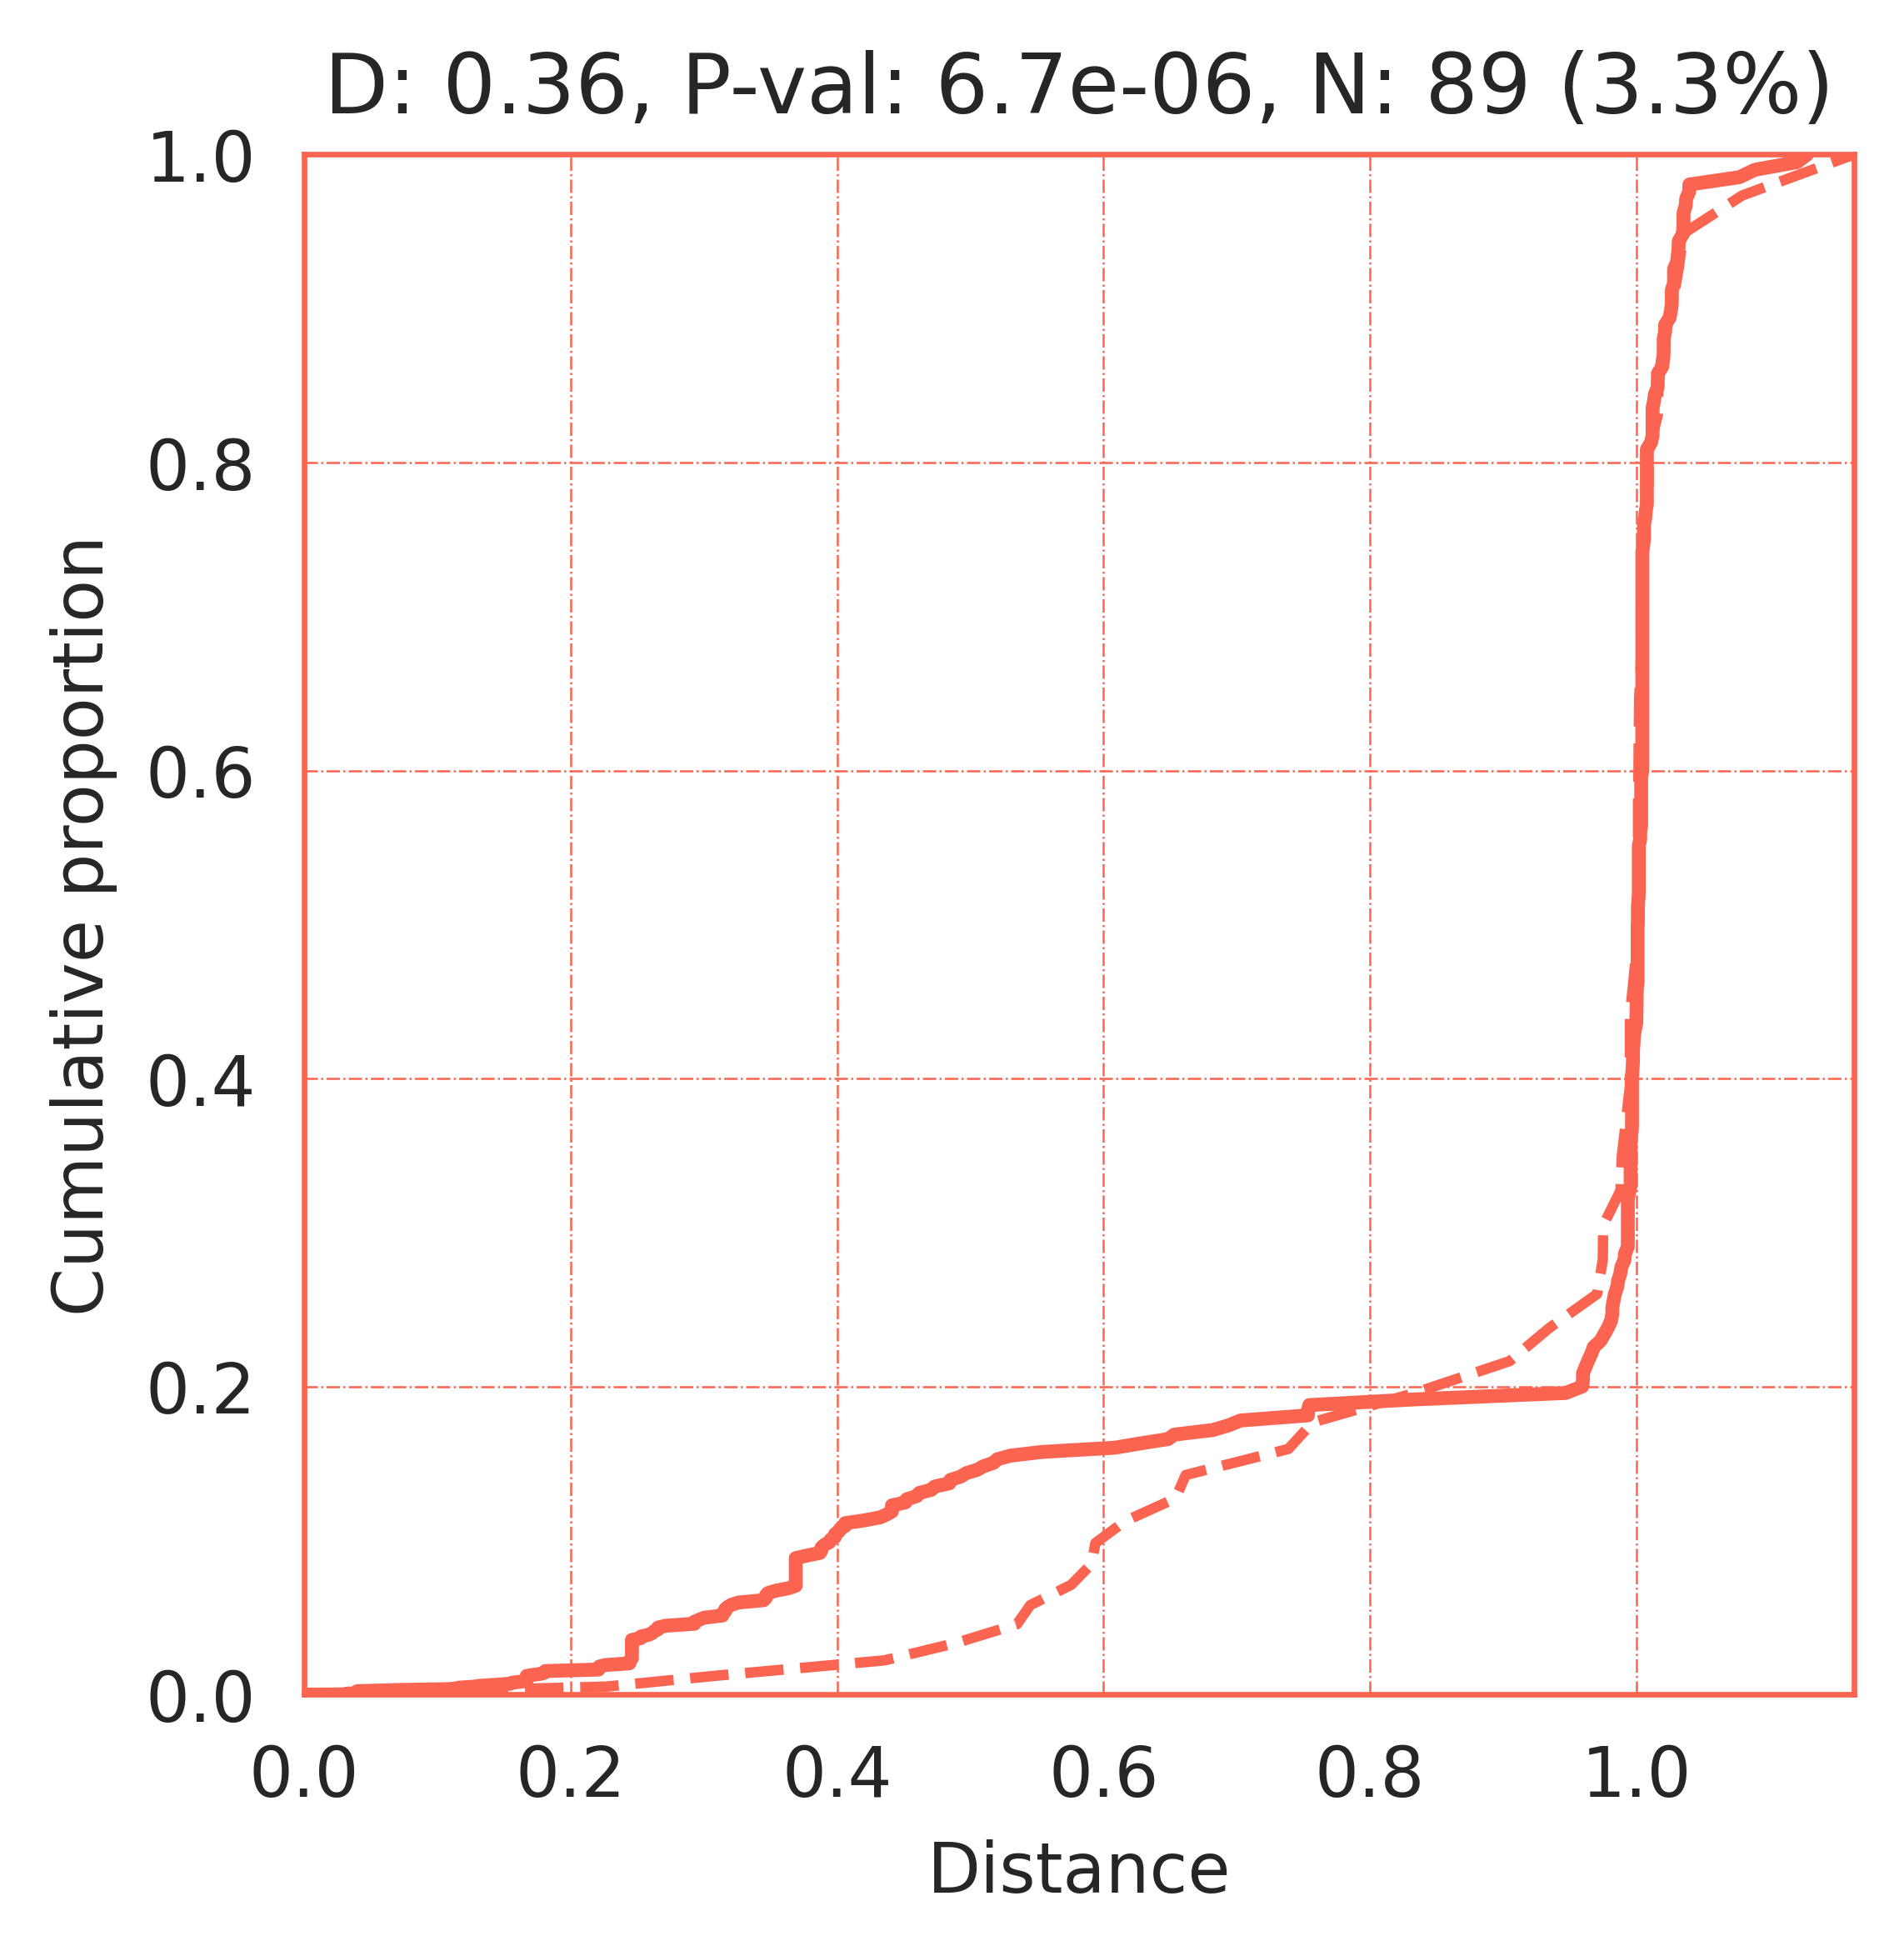

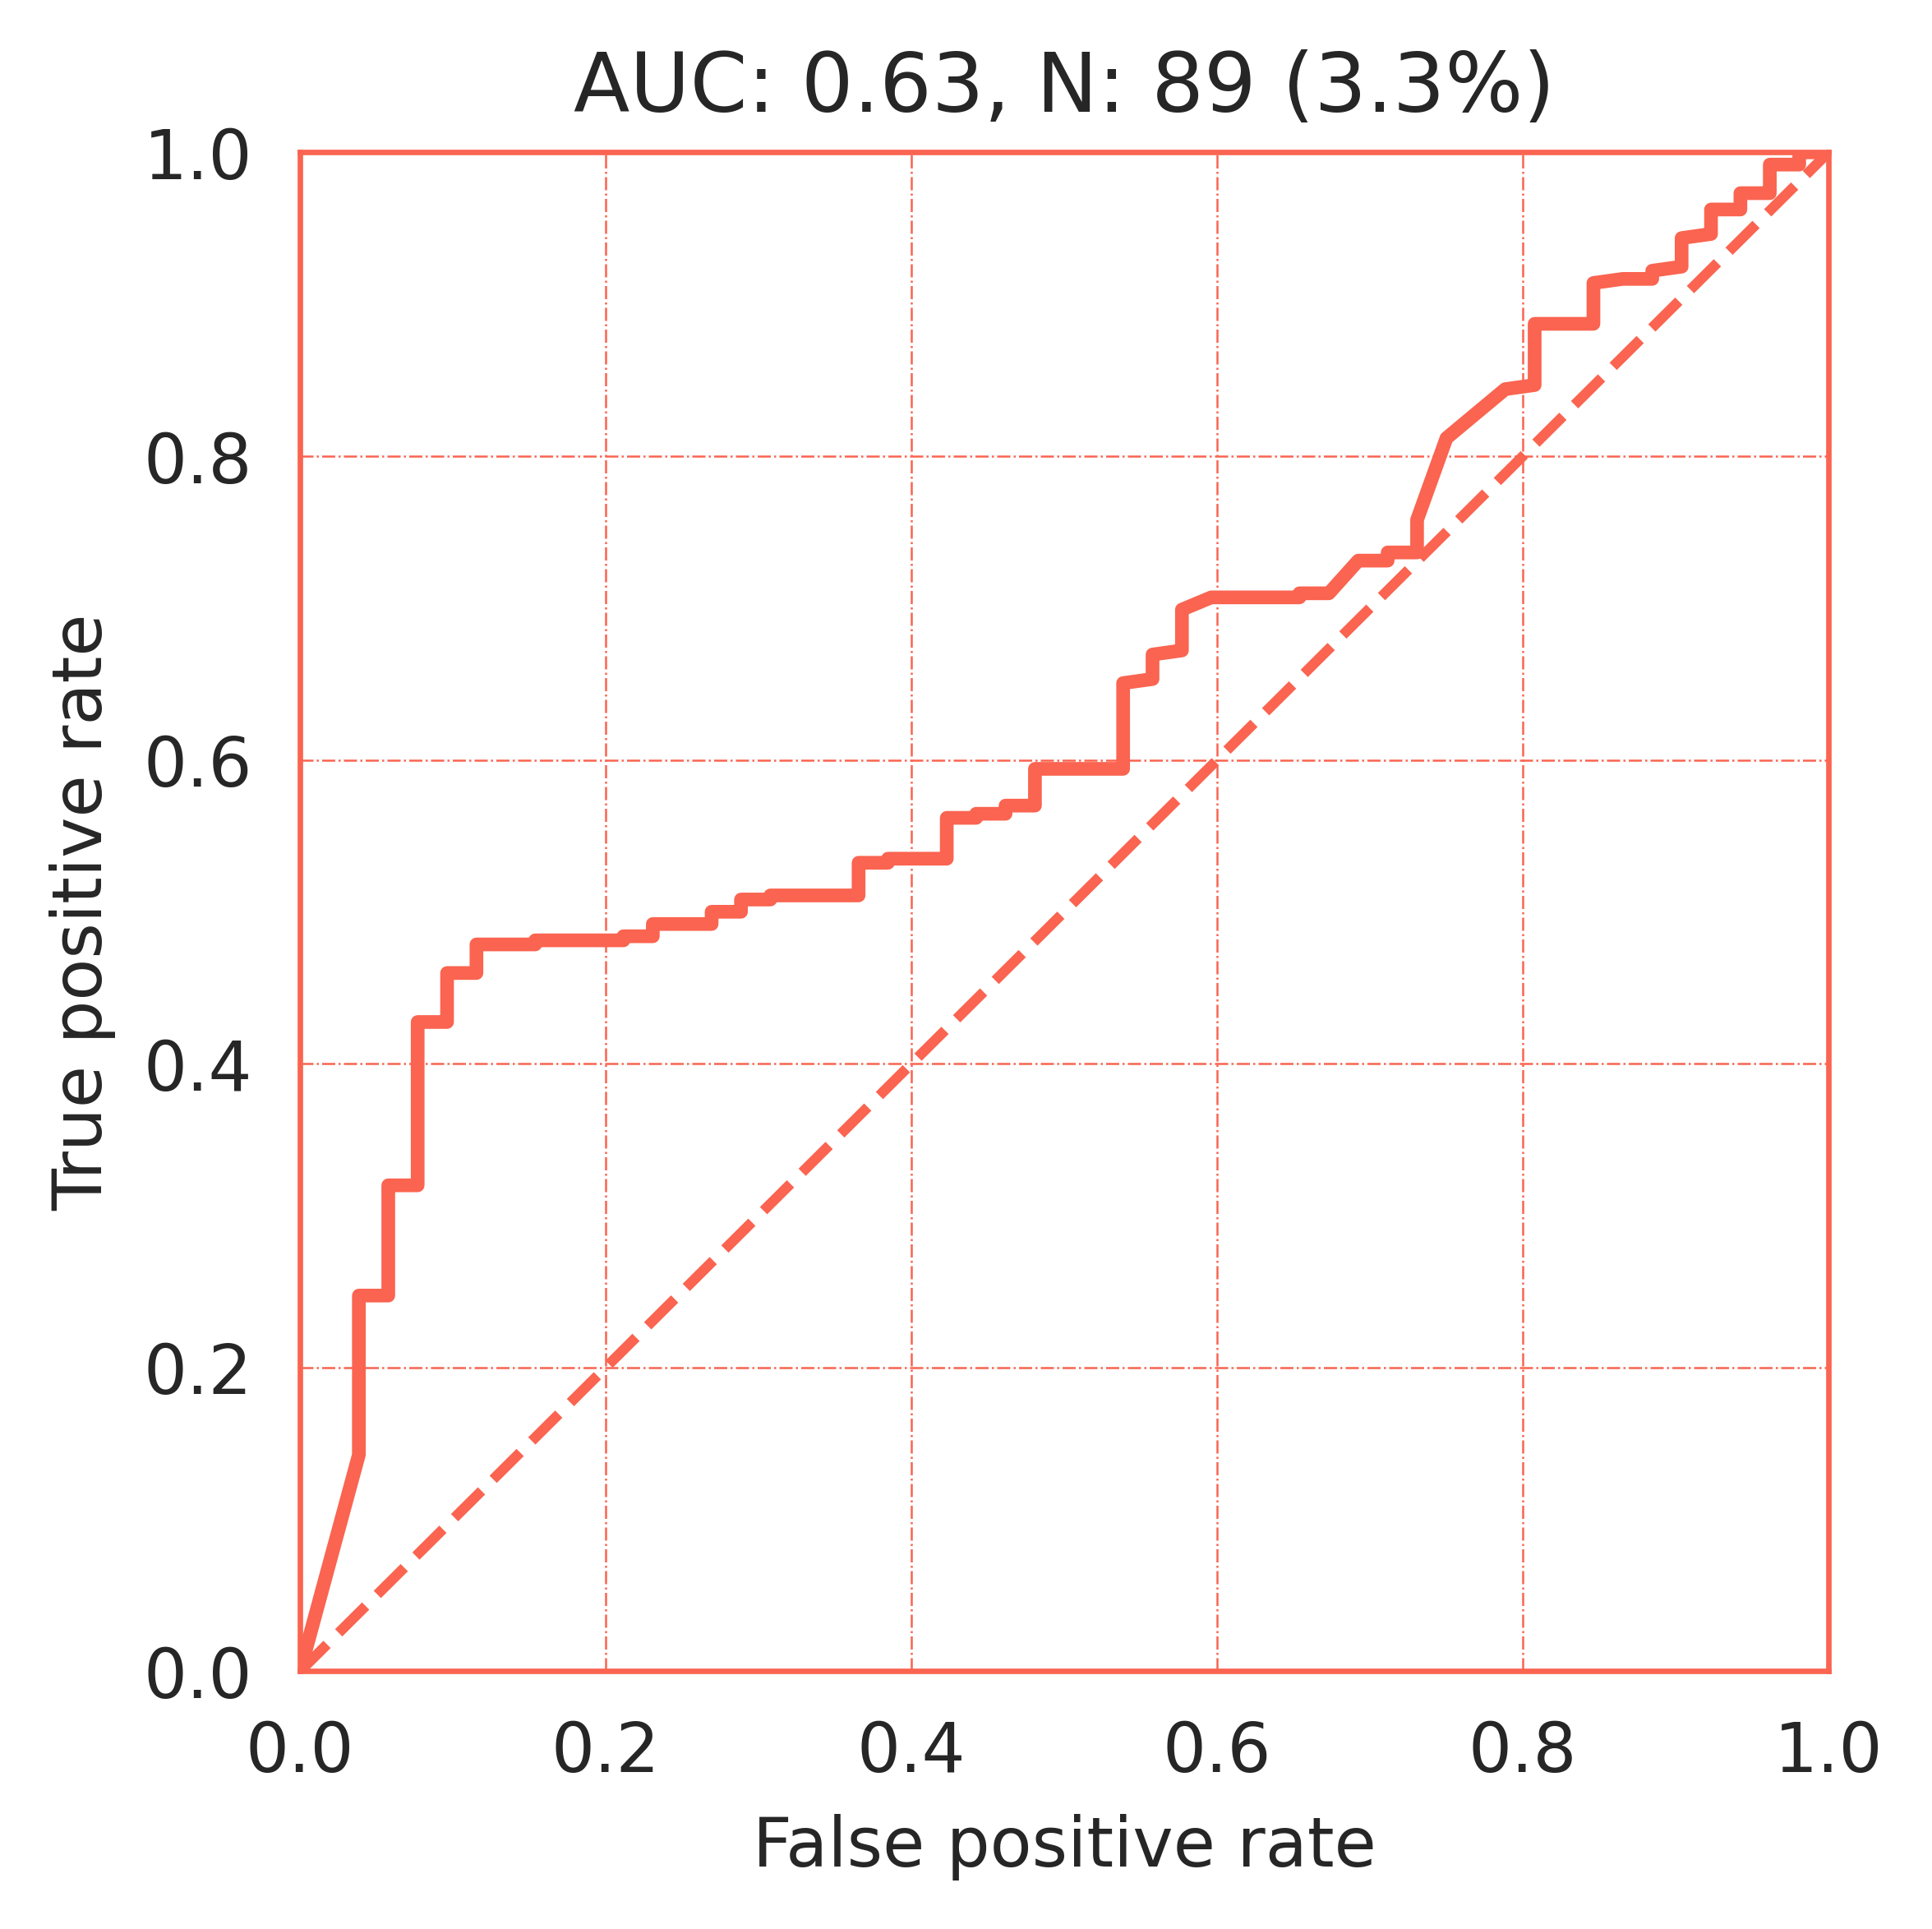

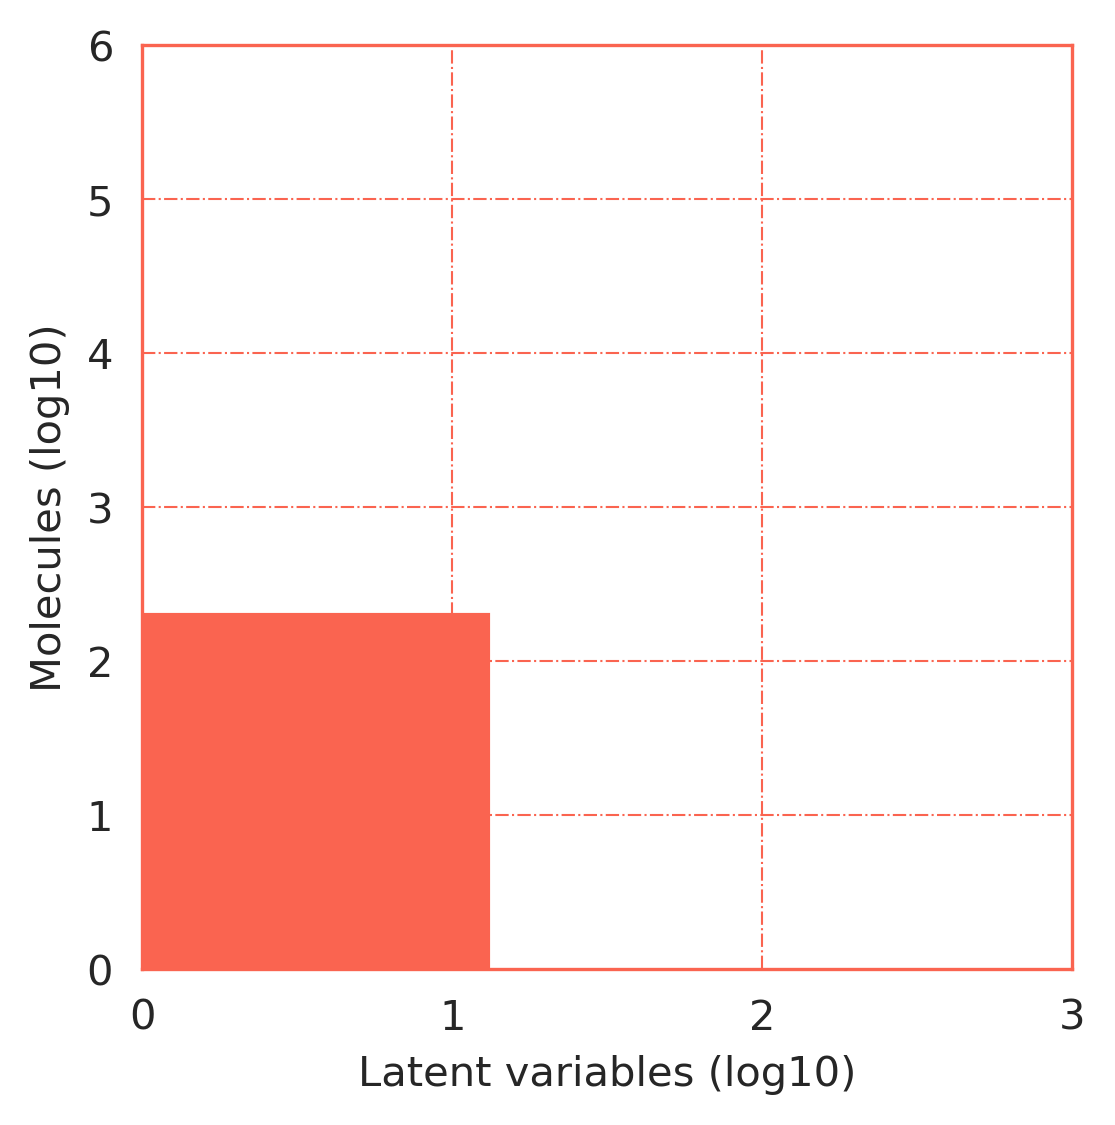

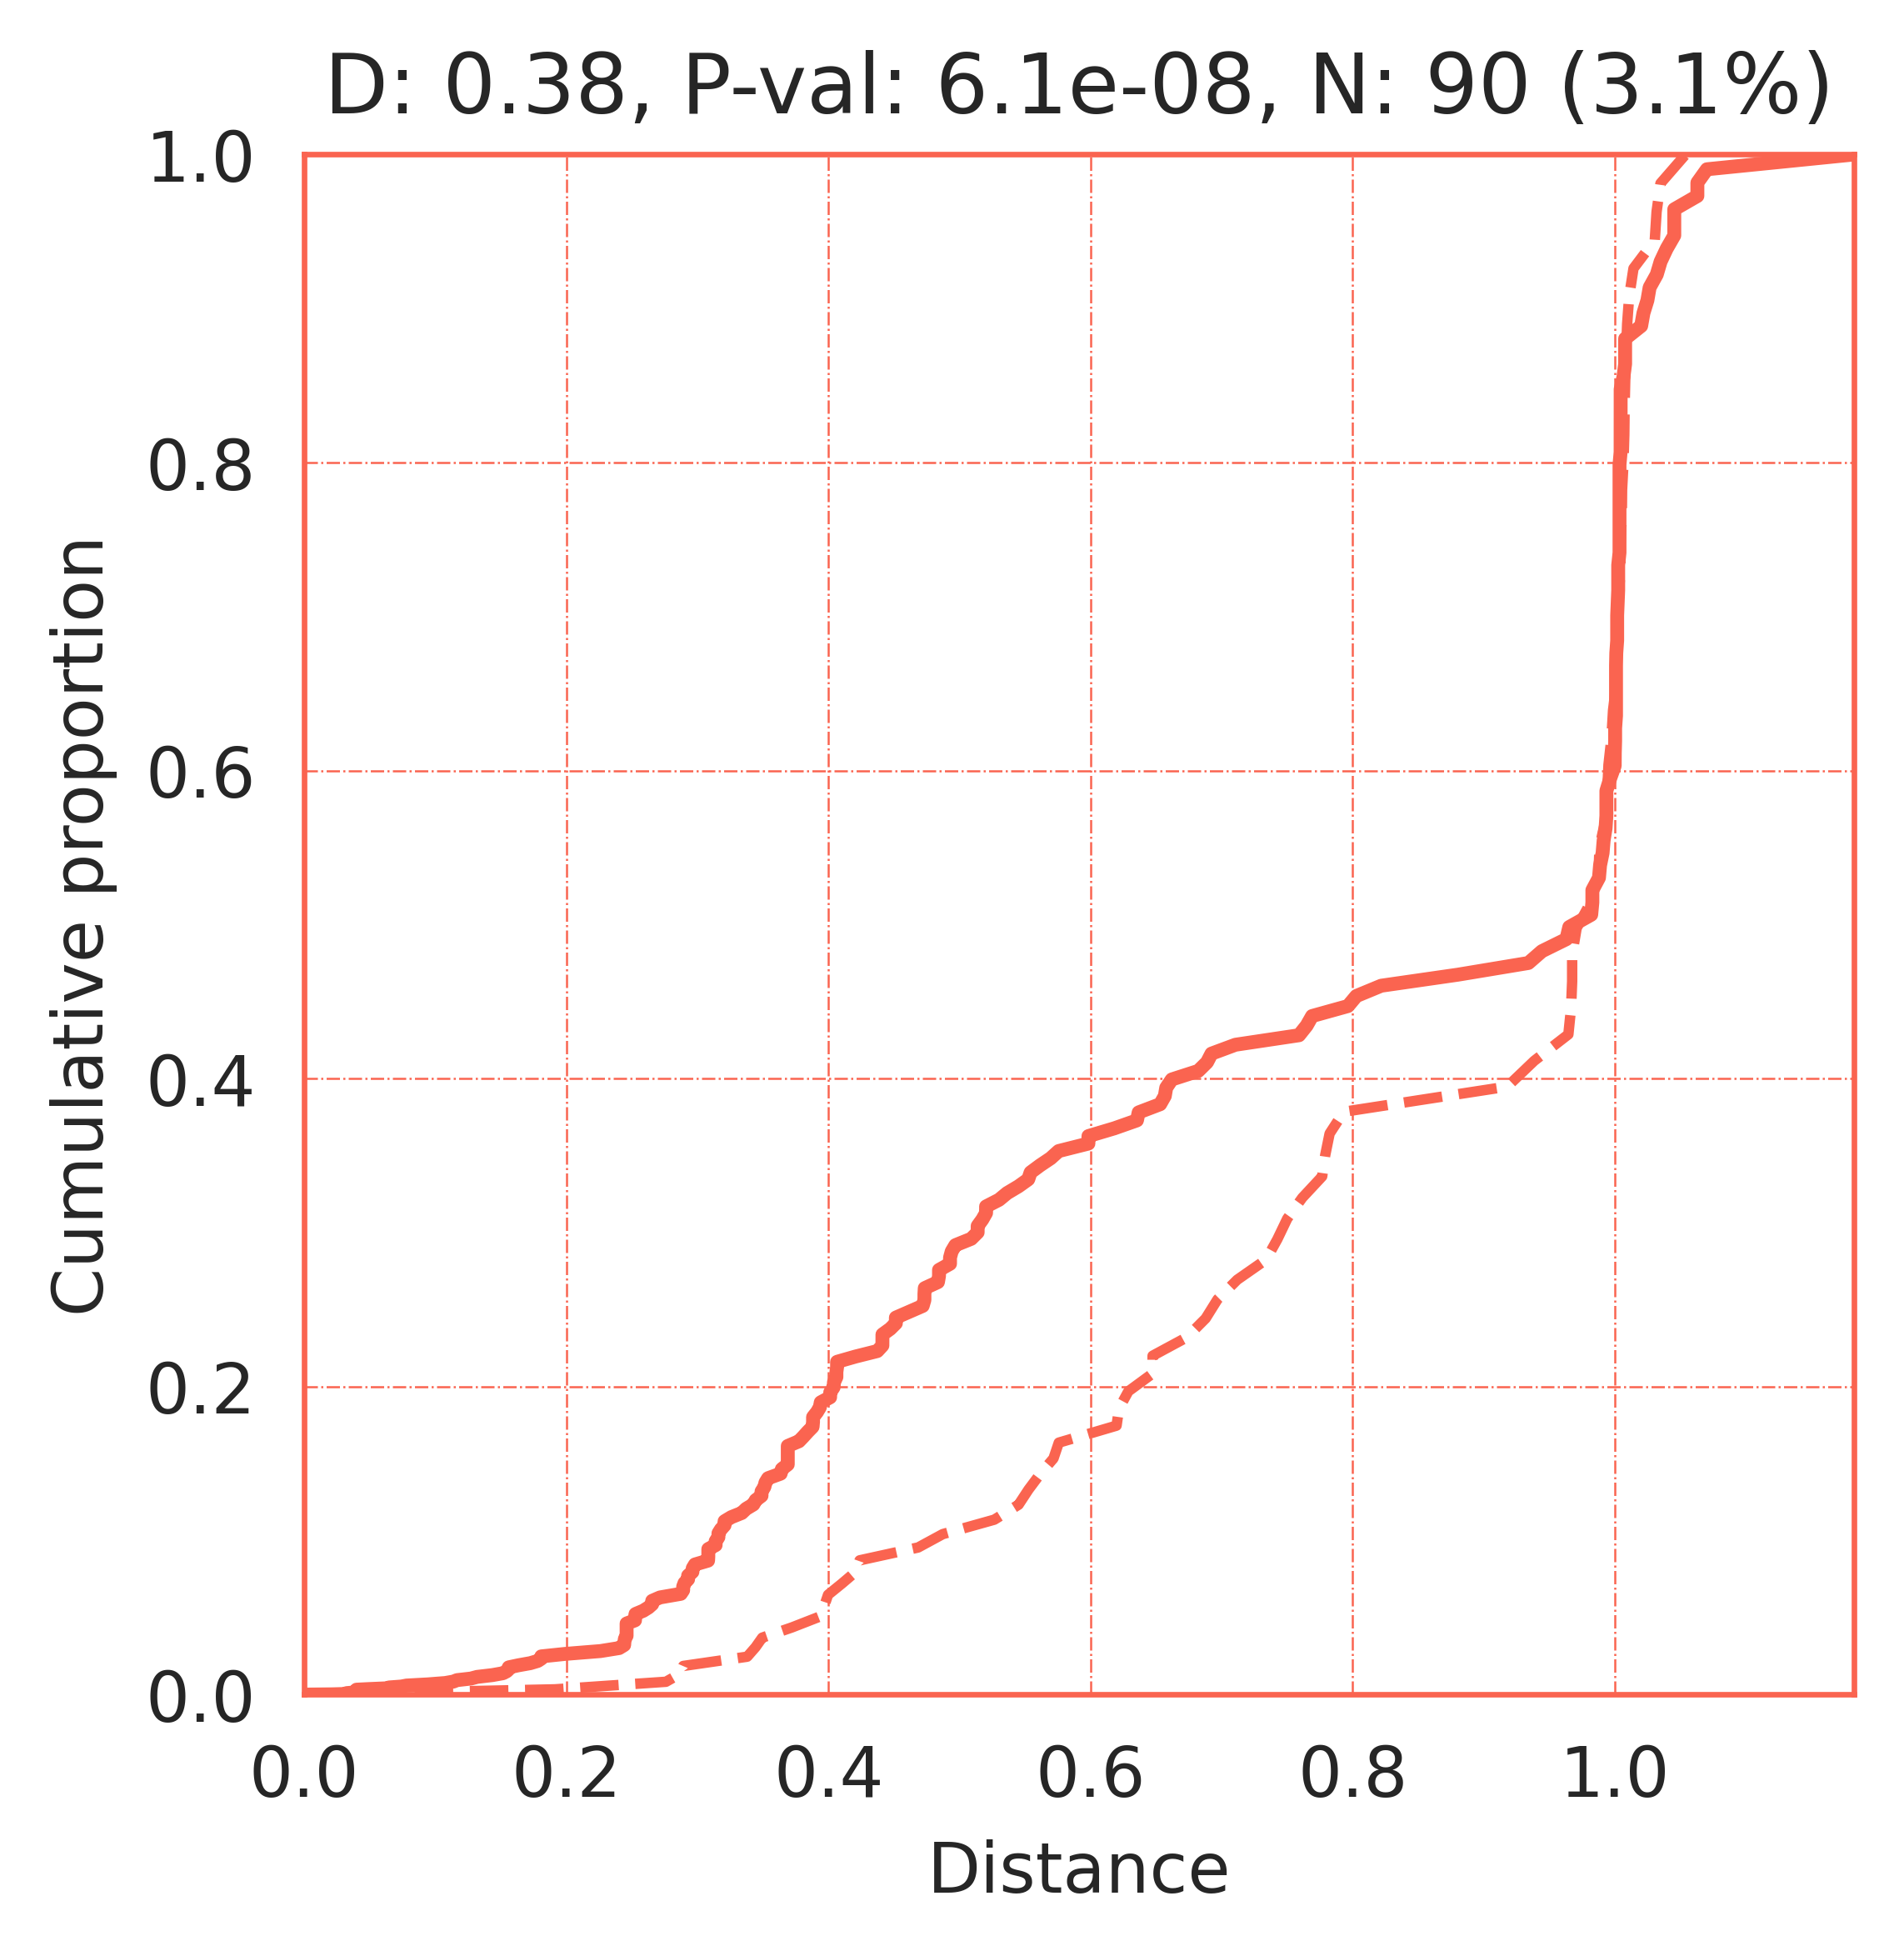

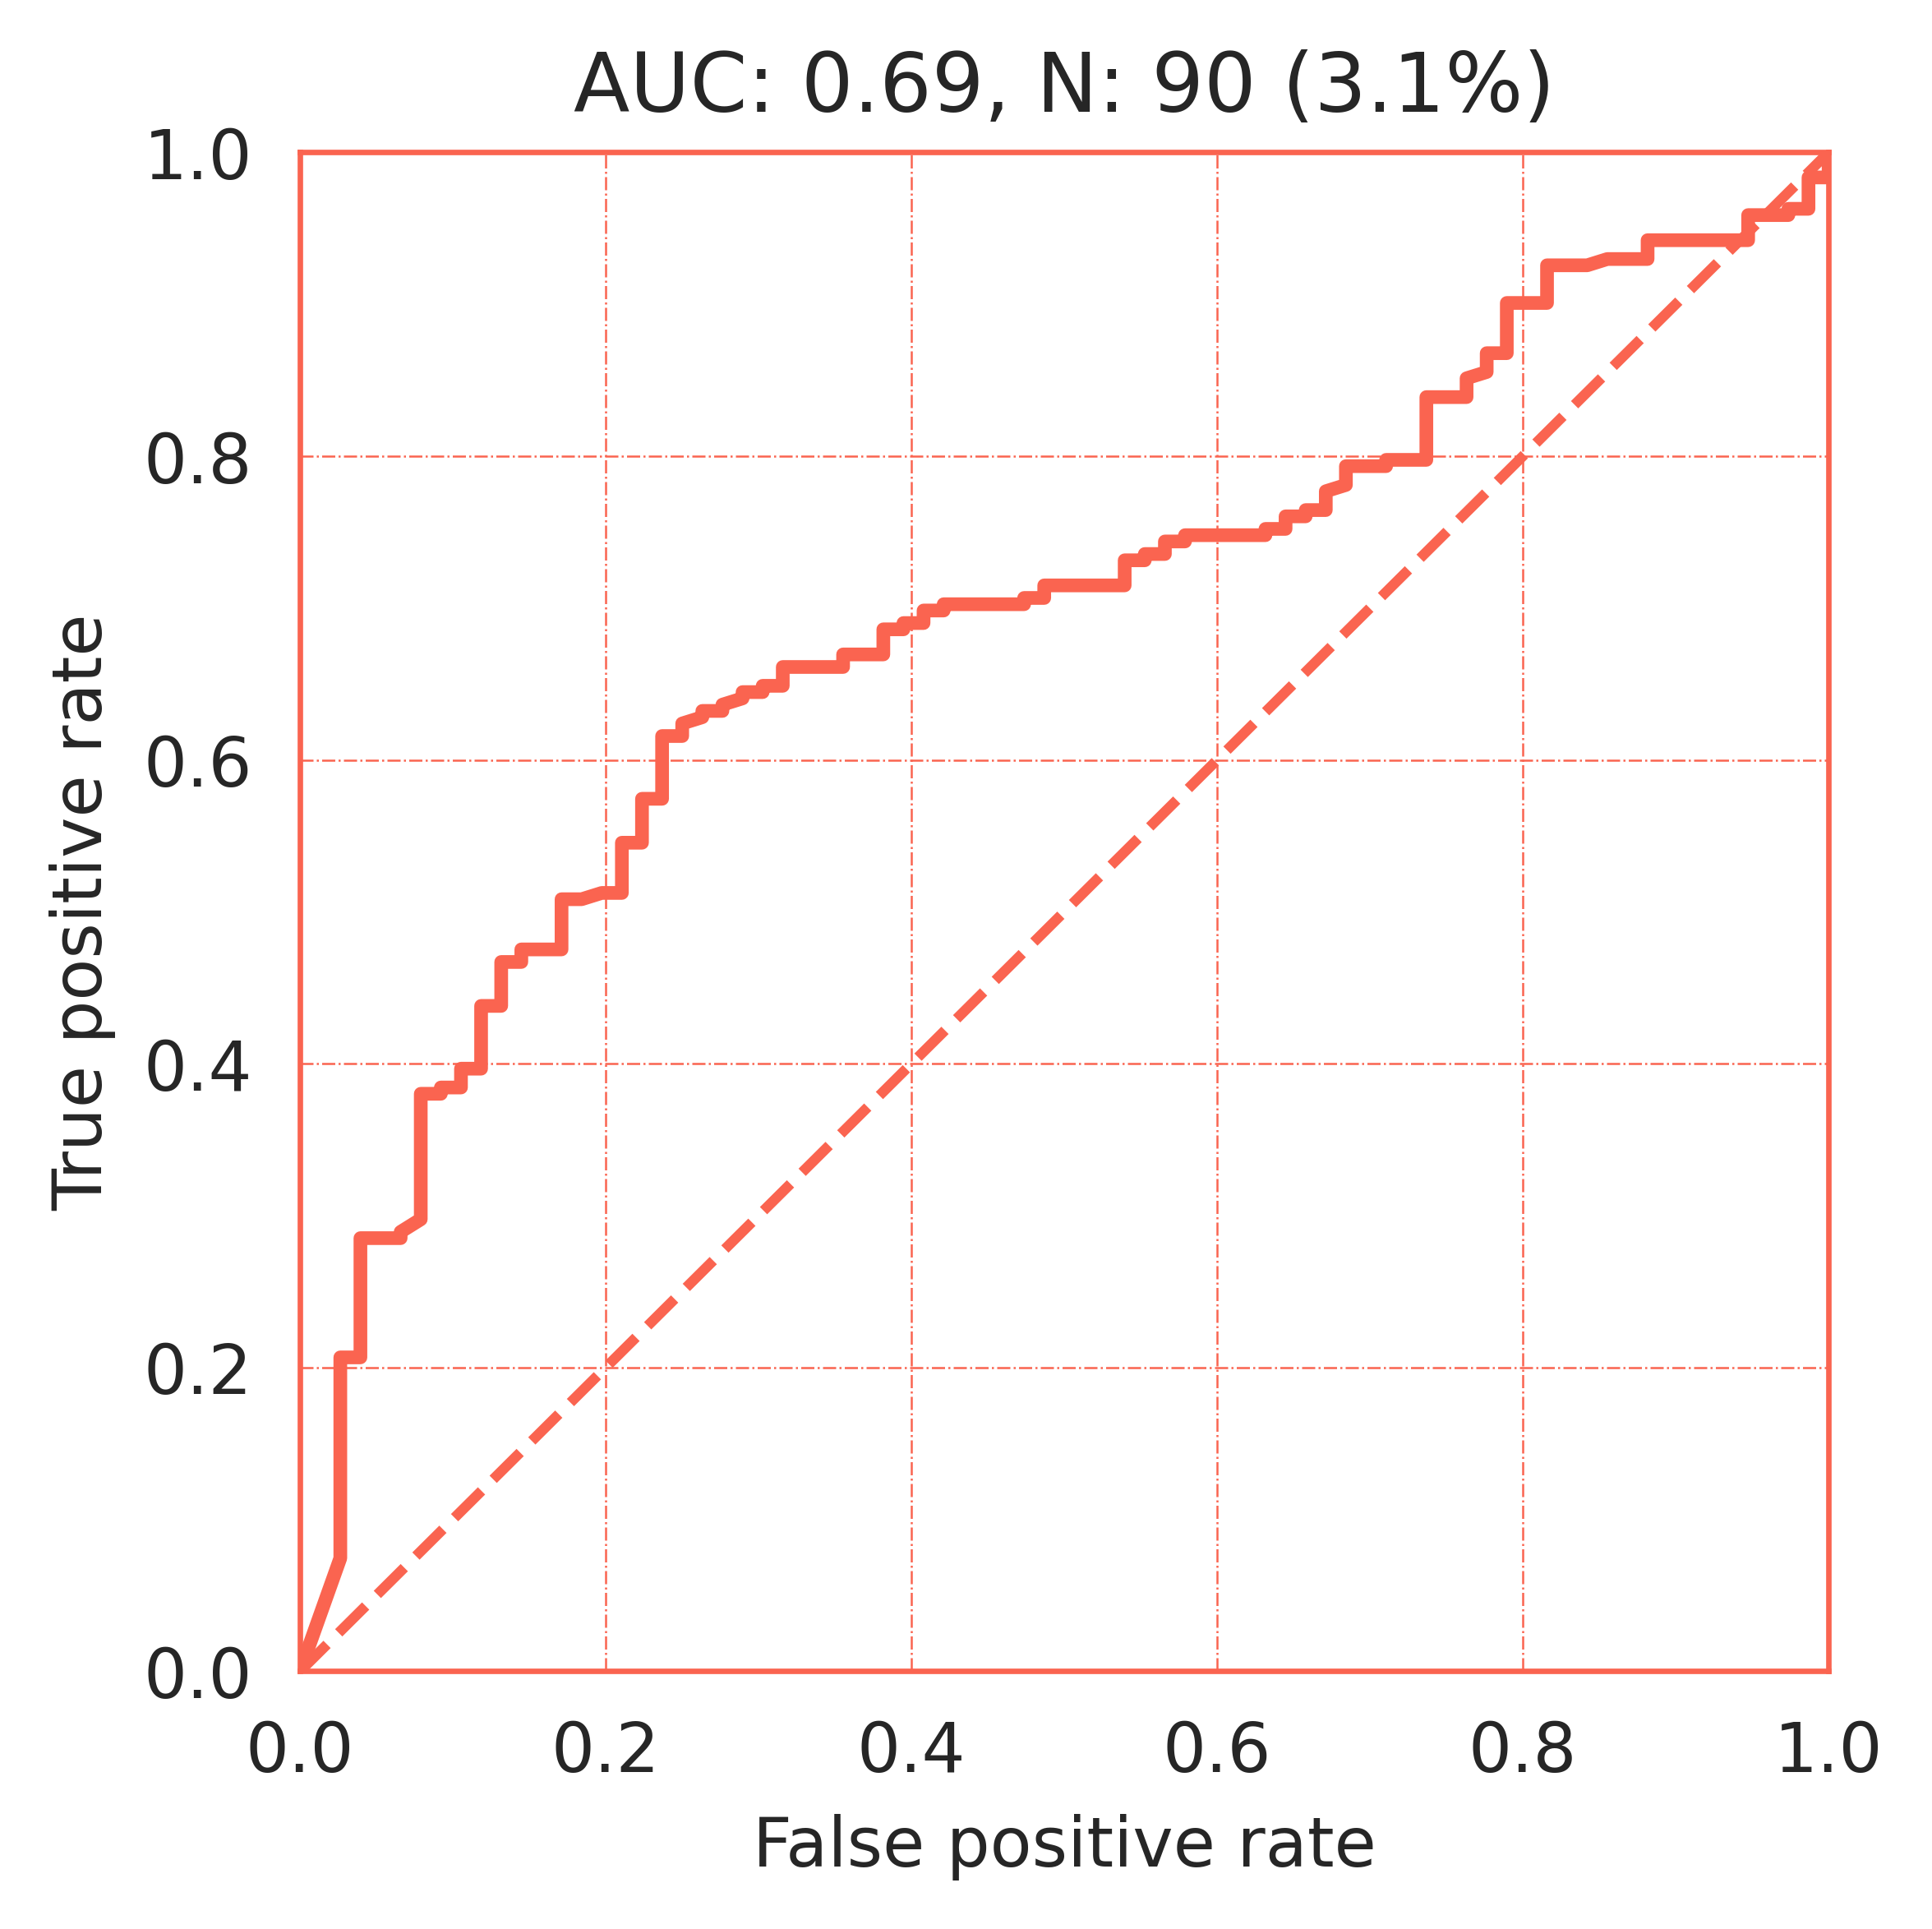

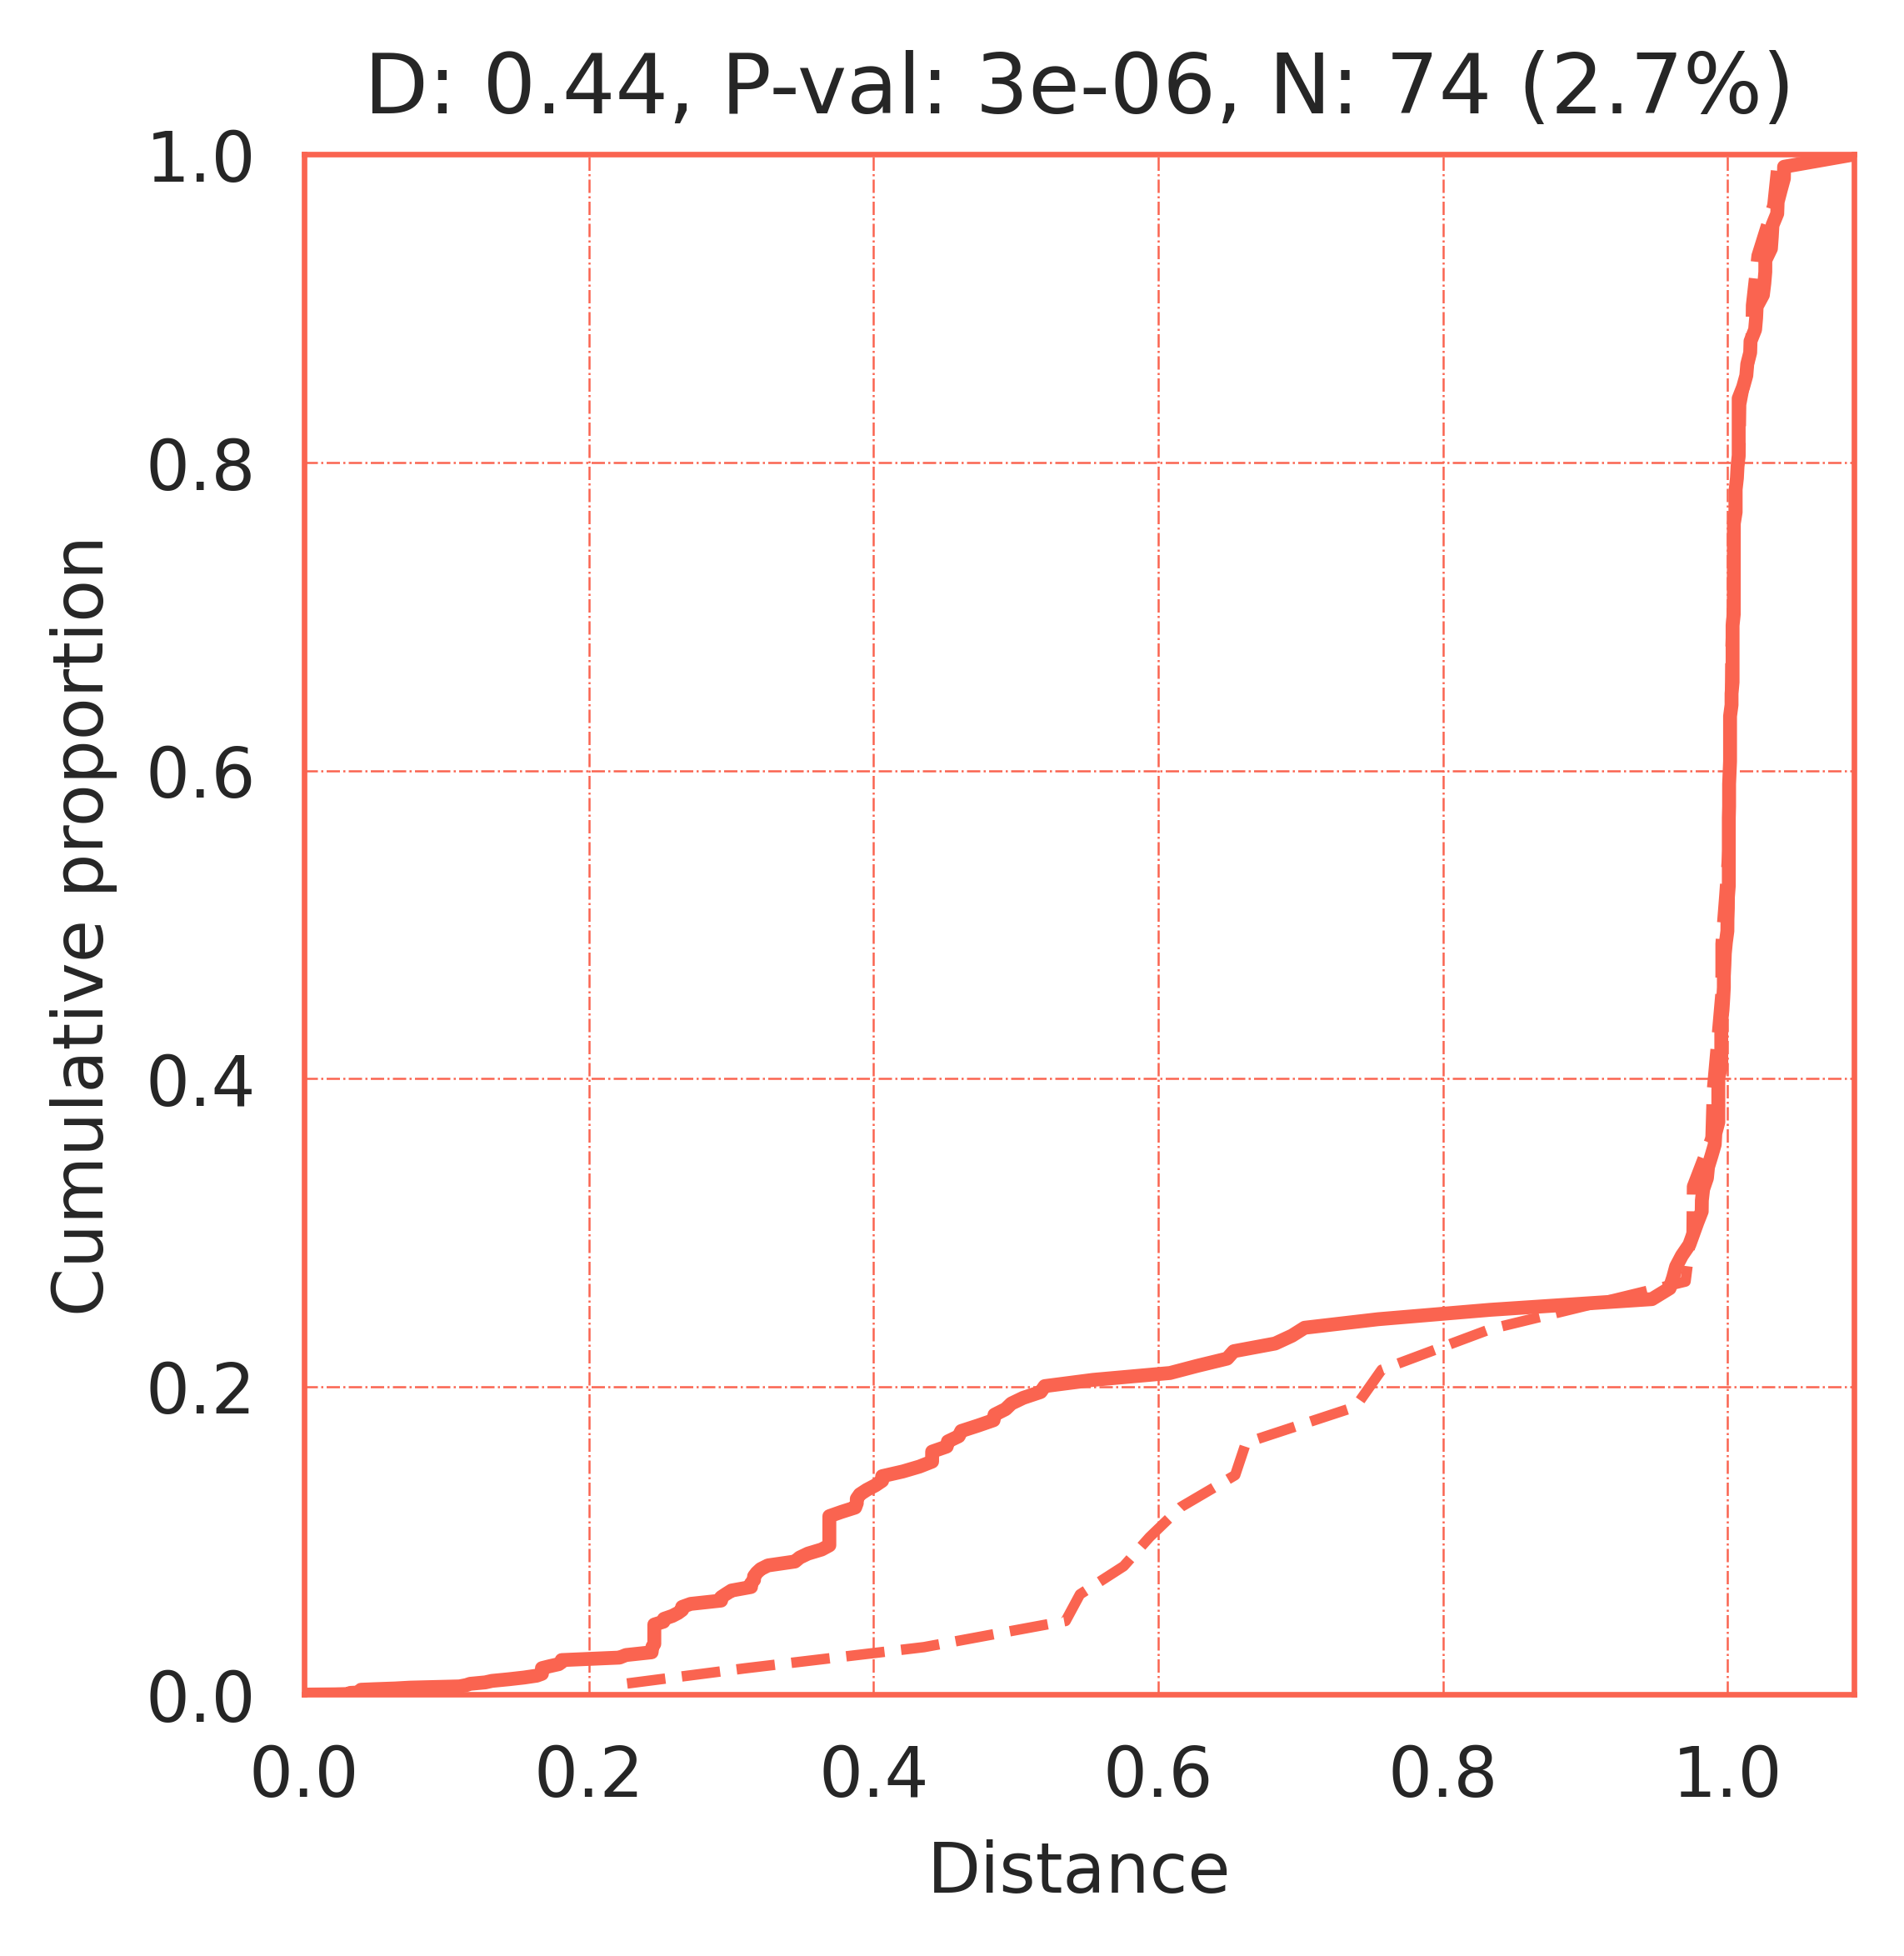

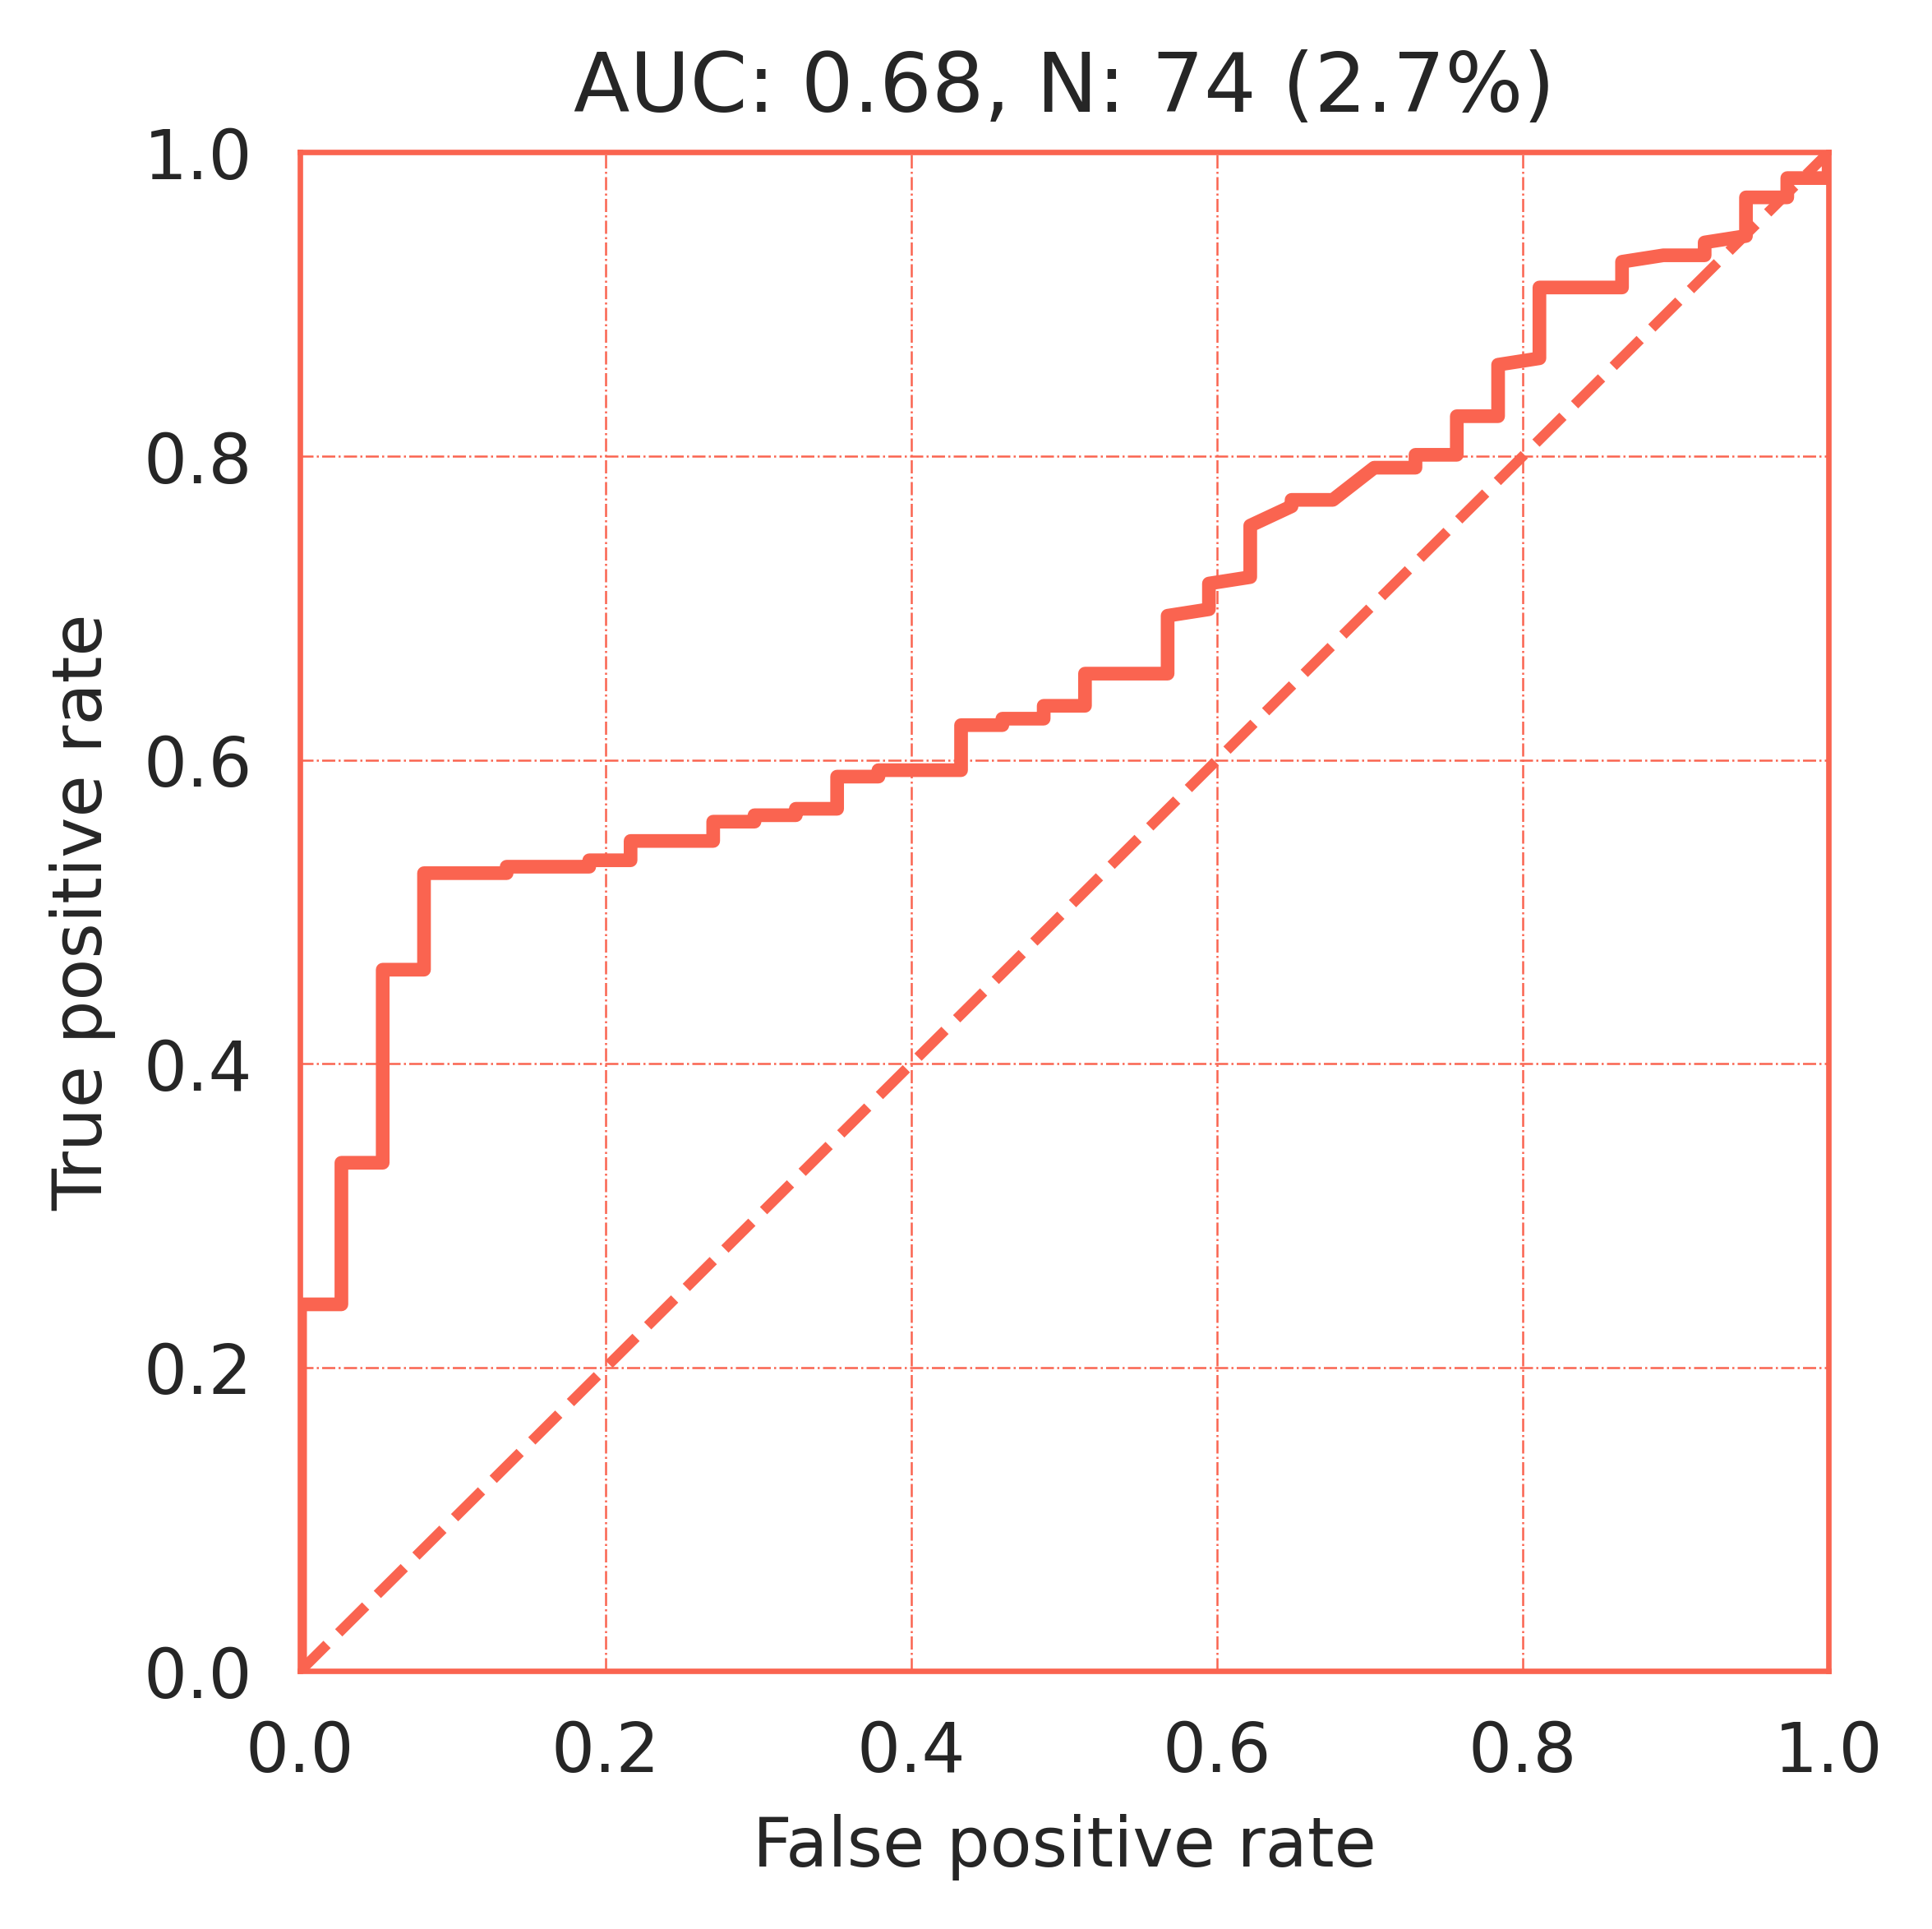

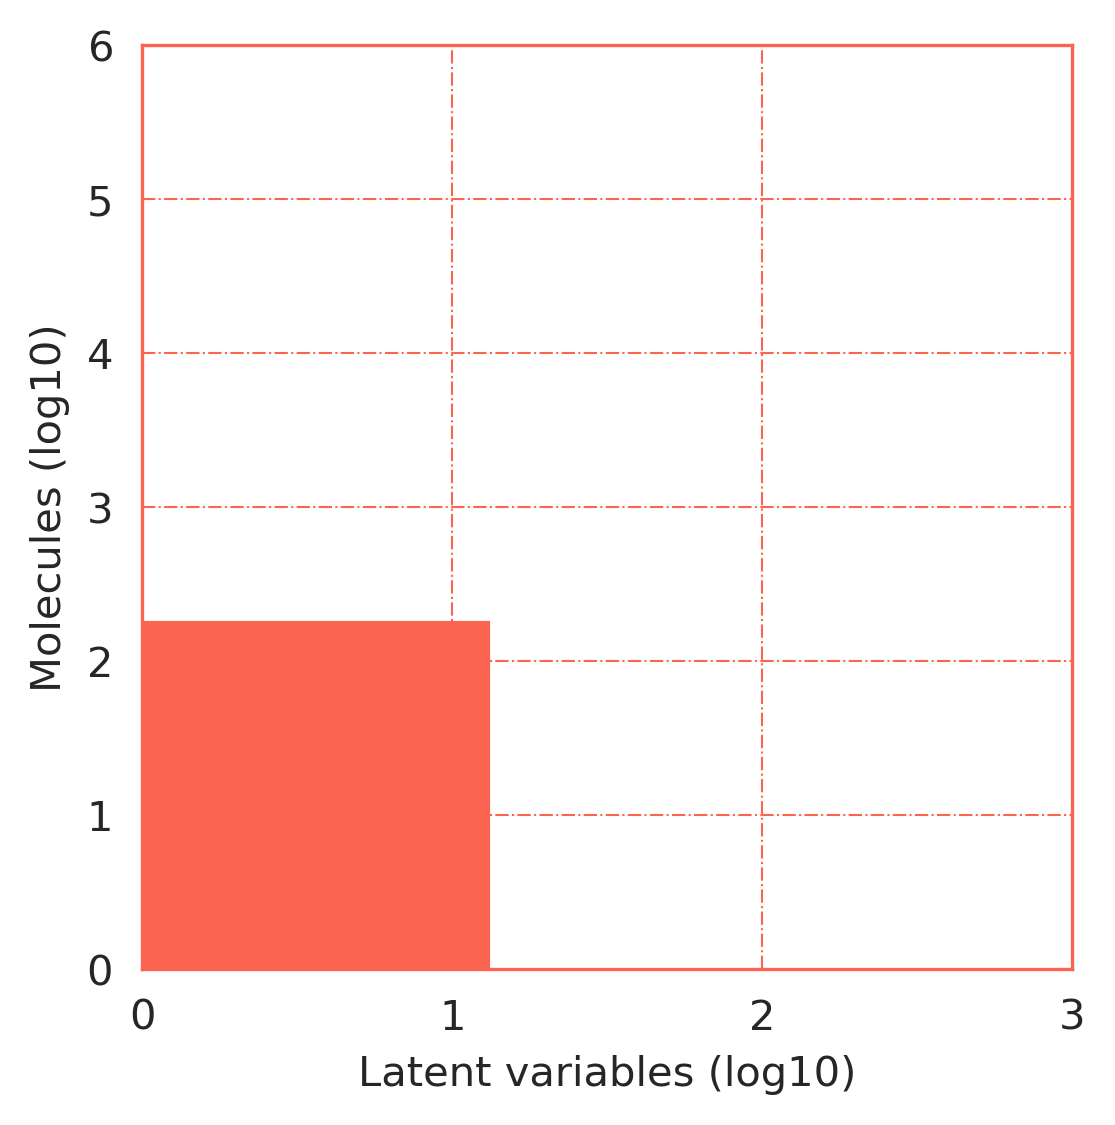

In [14]:
# Dataset Name
dataset = 'M1.001'

# Instantiation of sign0
sign0 = cc_local.signature(dataset, 'sign0')

# Instantiation of sign1
sign1 = cc_local.signature(dataset, 'sign1')

# Cleaning both full and reference datasets. This is crucial!
sign1.clear_all()

# Fitting sign1
sign1.fit(sign0)

In [15]:
sign1.shape

(200, 13)

2024-10-17 12:04:02,201 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign1
2024-10-17 12:04:02,202 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_M1
2024-10-17 12:04:02,291 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across ROC
2024-10-17 12:04:02,294 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/A/A1/A1.001/sign0
2024-10-17 12:04:04,842 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/A/A1/A1.001/sign0
2024-10-17 12:04:09,049 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 188 rows from dataset V
2024-10-17 12:04:10,439 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 188 rows from dataset V
2

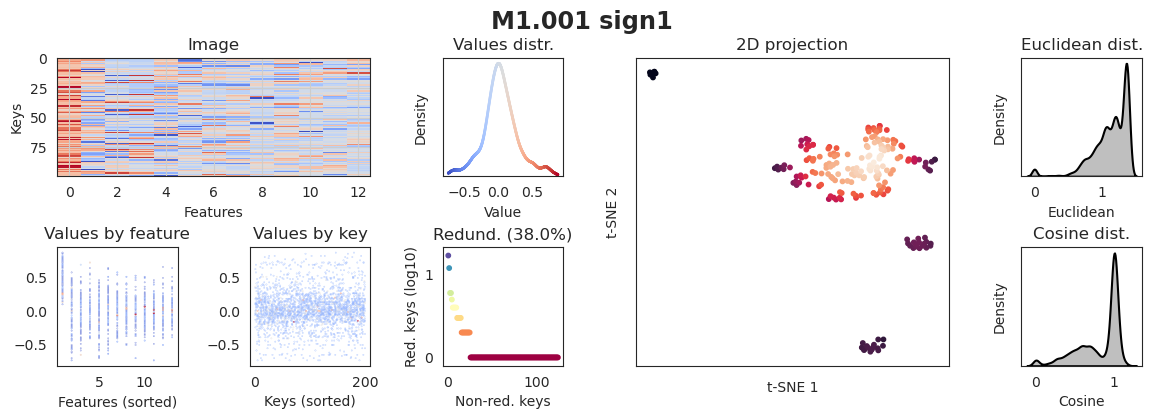

In [16]:
# Instantiation of sign1
sign1 = cc_local.signature(dataset, 'sign1')

# Instantiation of diag1 (diagnosis plots)
diag1 = sign1.diagnosis(ref_cctype='sign0')

# Including M1 into the ROC diagnosis plot
diag1.across_roc(include_datasets=[dataset], save=True, plot=False)

# Plot medium & small diagnosis plots
diag1.canvas(size='medium', savefig=True, savefig_kwargs={'dpi': 300})
diag1.canvas(size='small', savefig=True, savefig_kwargs={'dpi': 300})

In [17]:
# Instantiation of sign1
sign1 = cc_local.signature(dataset, 'sign1')

# Instantiation of neig1
neig1 = cc_local.get_signature("neig1", "full", dataset)  # It will take the reference anyway...

# Cleaning both full and reference. This is crucial!
neig1.clear_all()

# Fitting neig1
neig1.fit(sign1)

2024-10-17 12:05:43,658 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign1
2024-10-17 12:05:43,660 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/neig1
2024-10-17 12:05:43,664 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/neig1
2024-10-17 12:05:43,665 chemicalchecker.core.neig.neig [DEBUG   ] data_path: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/neig1/neig.h5
2024-10-17 12:05:43,666 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/reference/M/M1/M1.001/neig1
2024-10-17 12:05:43,670 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/acomajuncosa/Protocols/local_CC_M1/reference/M/M1/M1.001/neig1
2024-10-17 12:05:

In [18]:
neig1.shape

array([200, 177])

In [19]:
np.min(np.array(sign1).flatten()), np.max(np.array(sign1).flatten())

(-0.7397413546088046, 0.8730405848868248)

## sign2 ##

2024-10-17 12:26:33,170 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign1
2024-10-17 12:26:33,191 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/neig1
2024-10-17 12:26:33,199 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/neig1
2024-10-17 12:26:33,201 chemicalchecker.core.neig.neig [DEBUG   ] data_path: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/neig1/neig.h5
2024-10-17 12:26:33,202 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign2
2024-10-17 12:26:33,239 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/reference/M/M1/M1.001/sign2
202

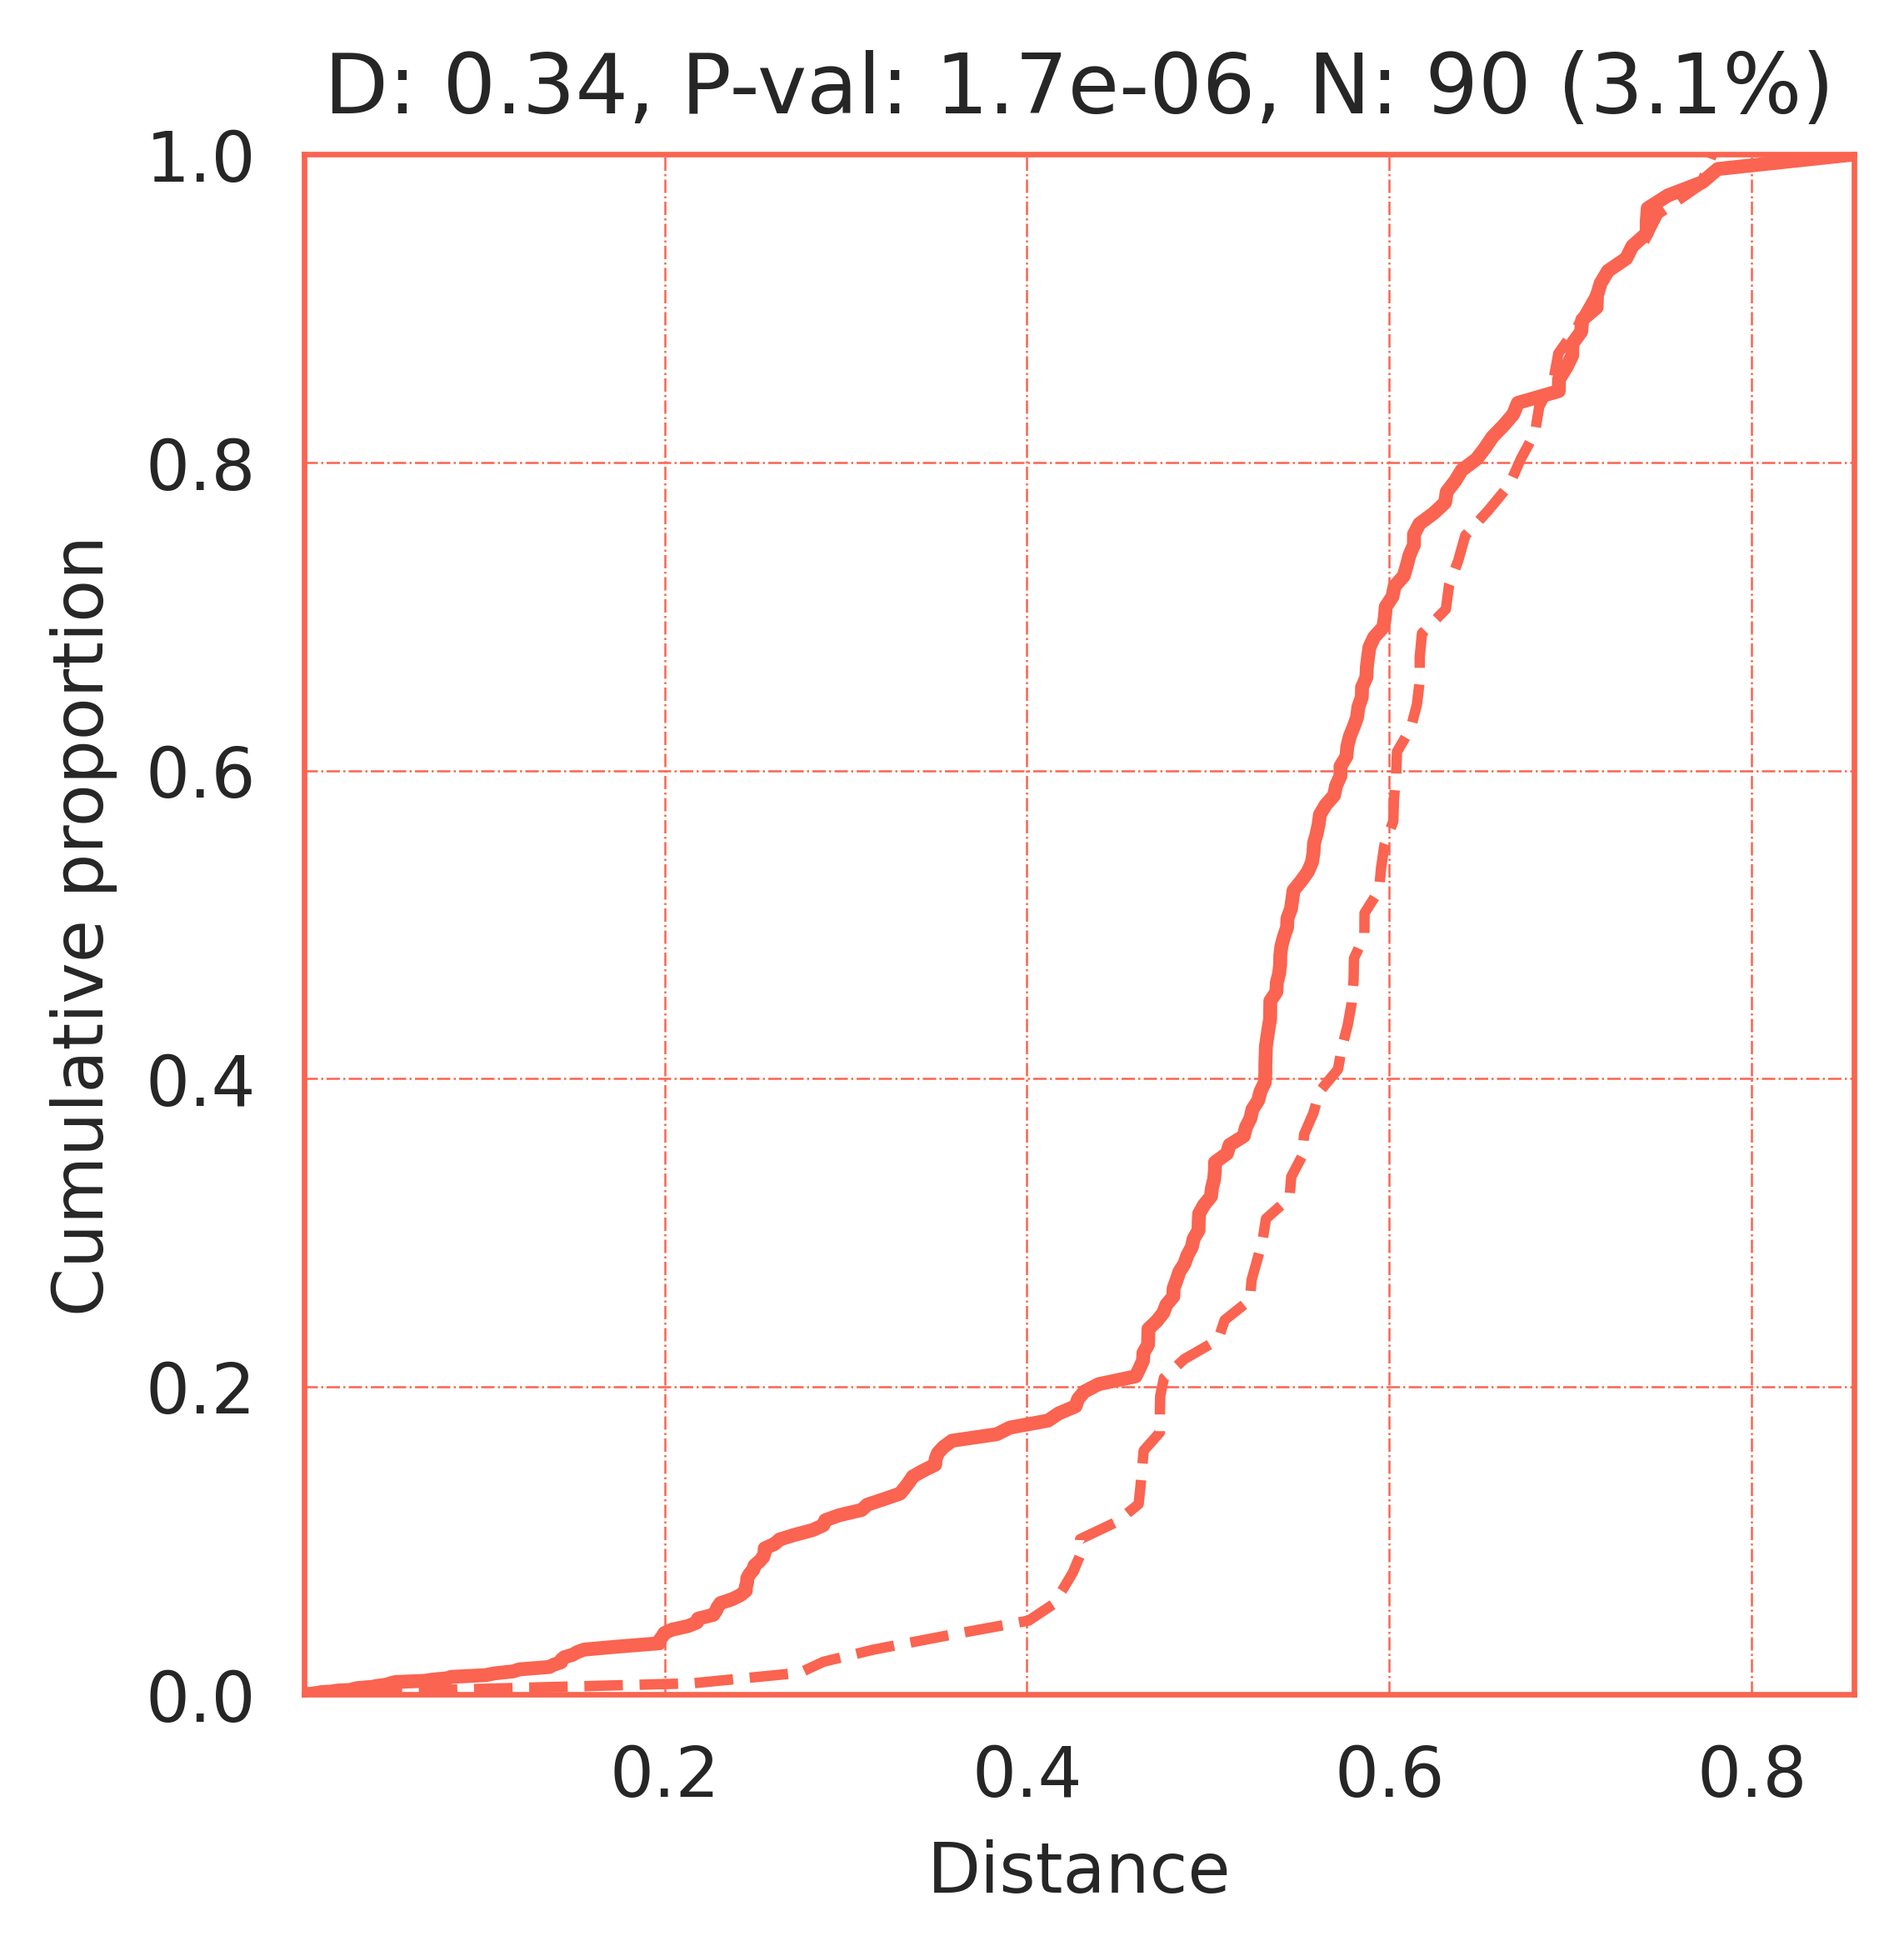

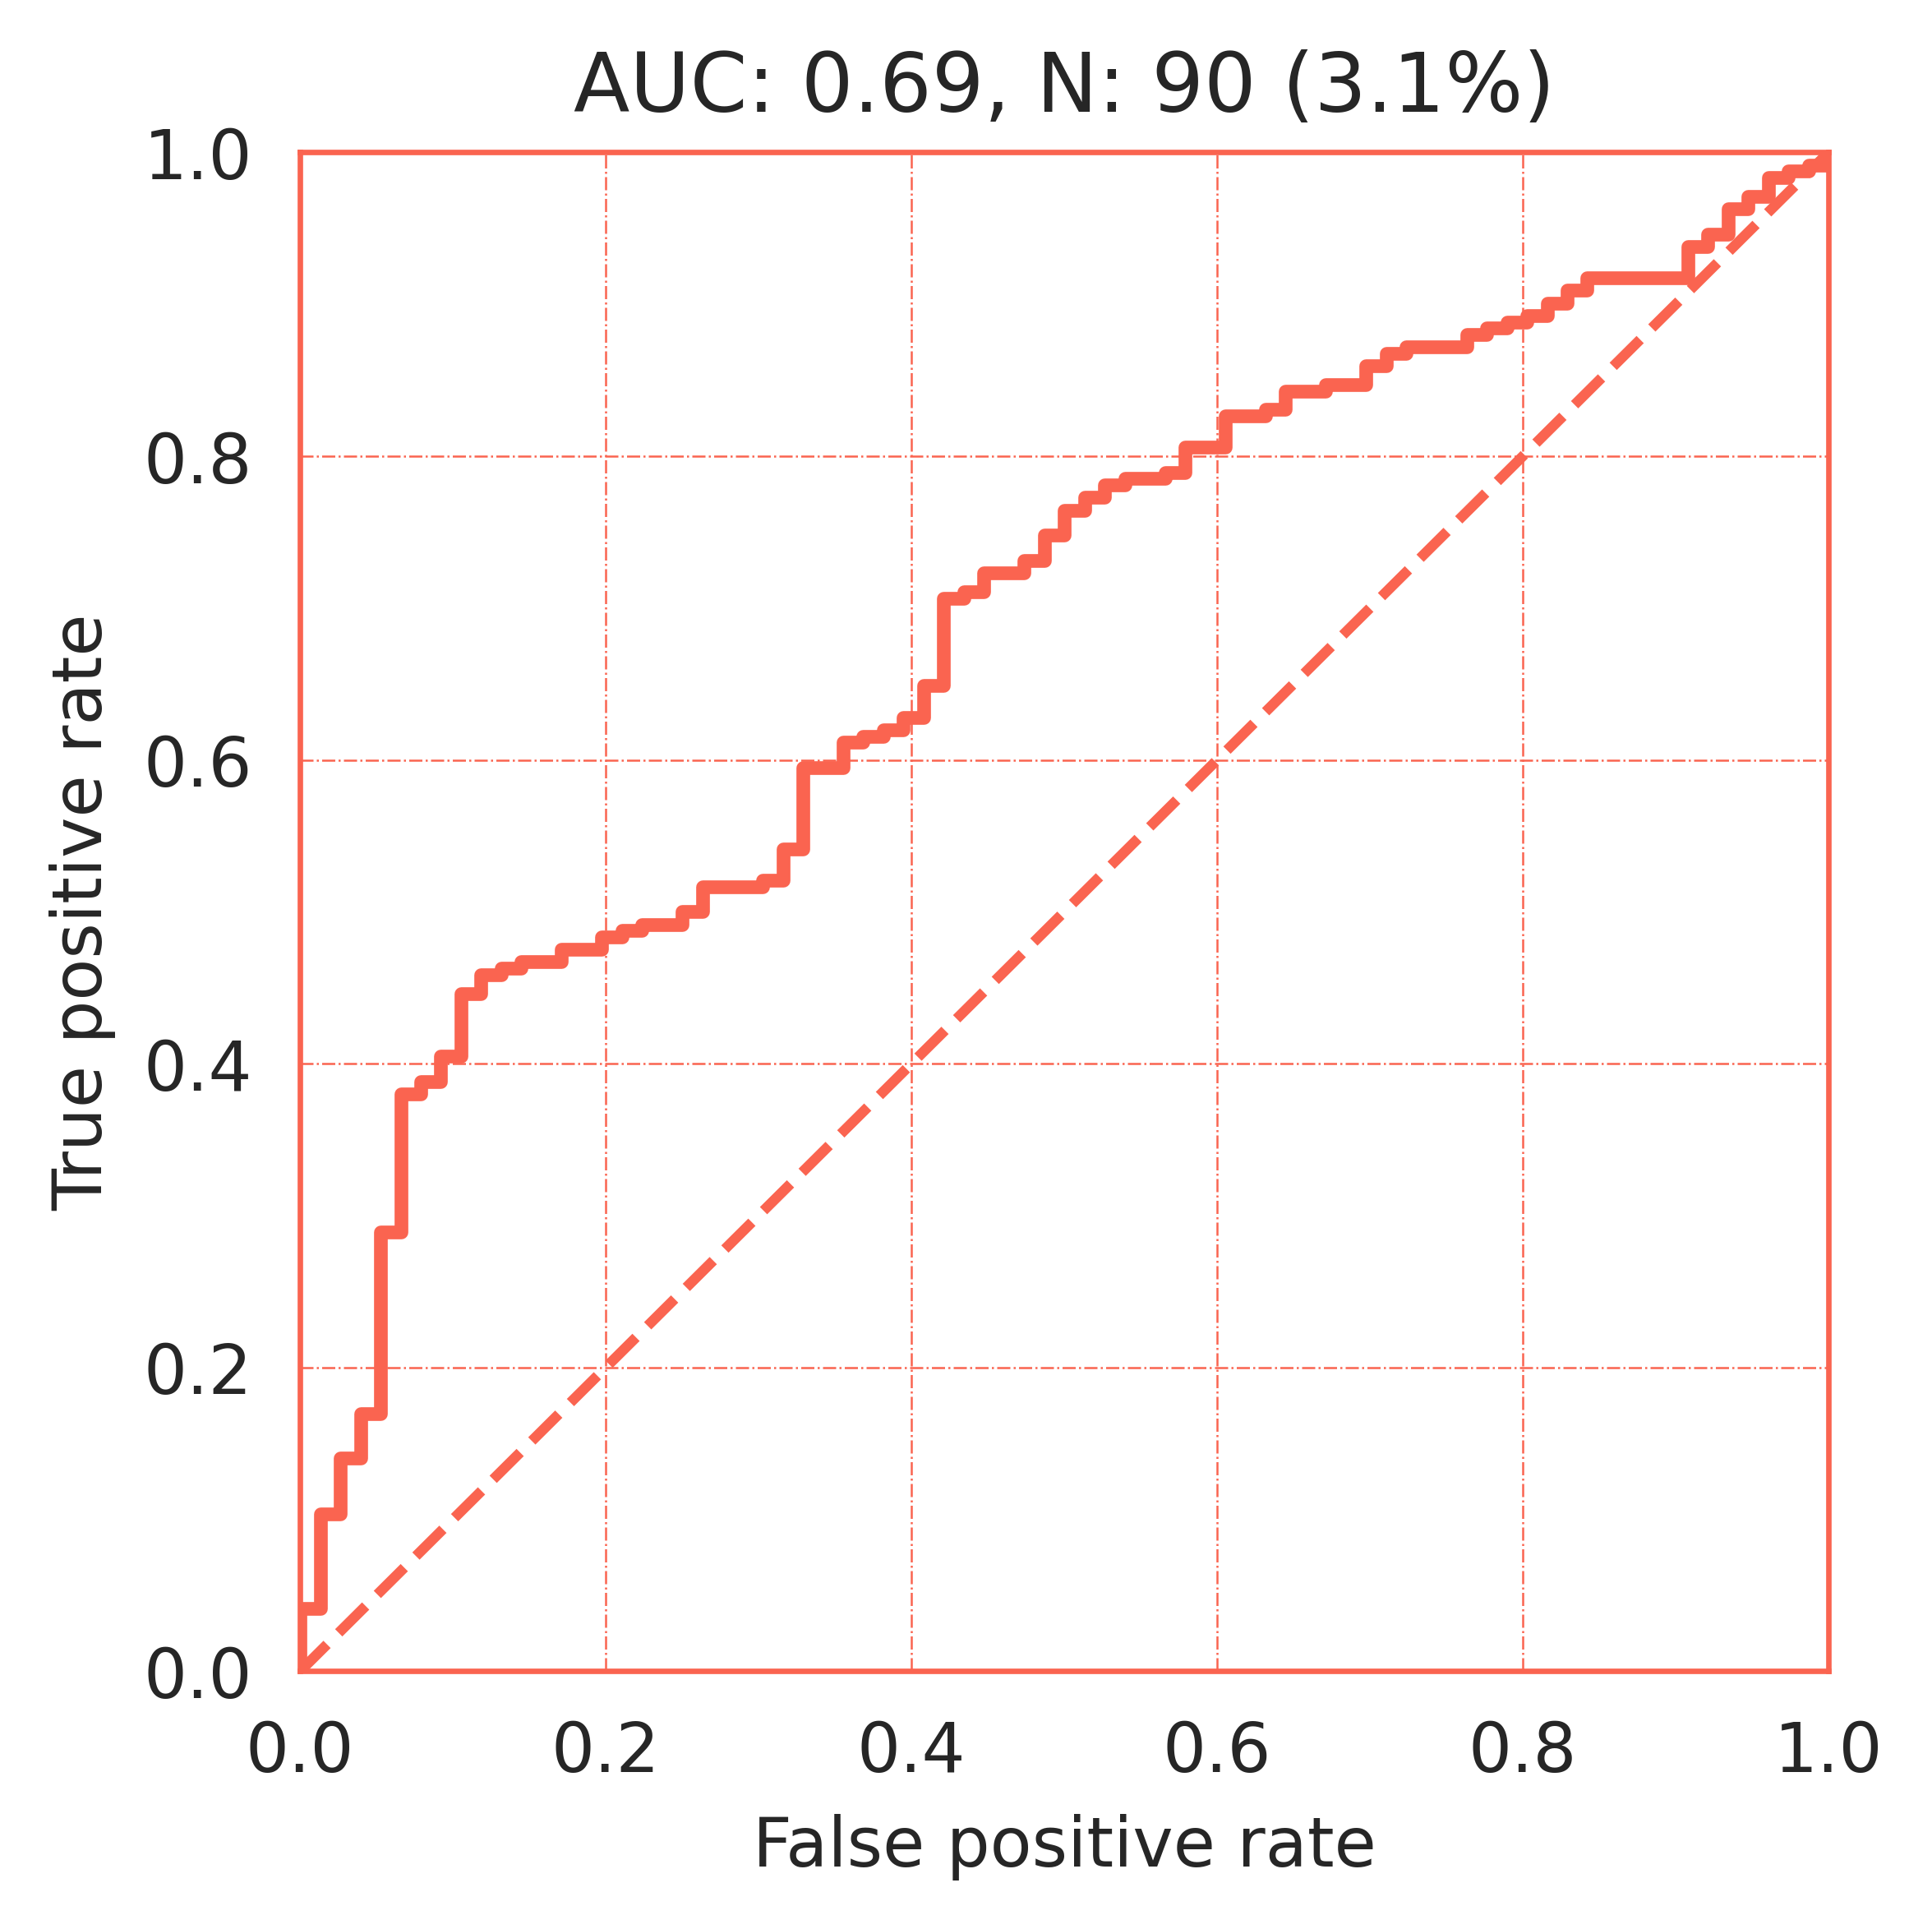

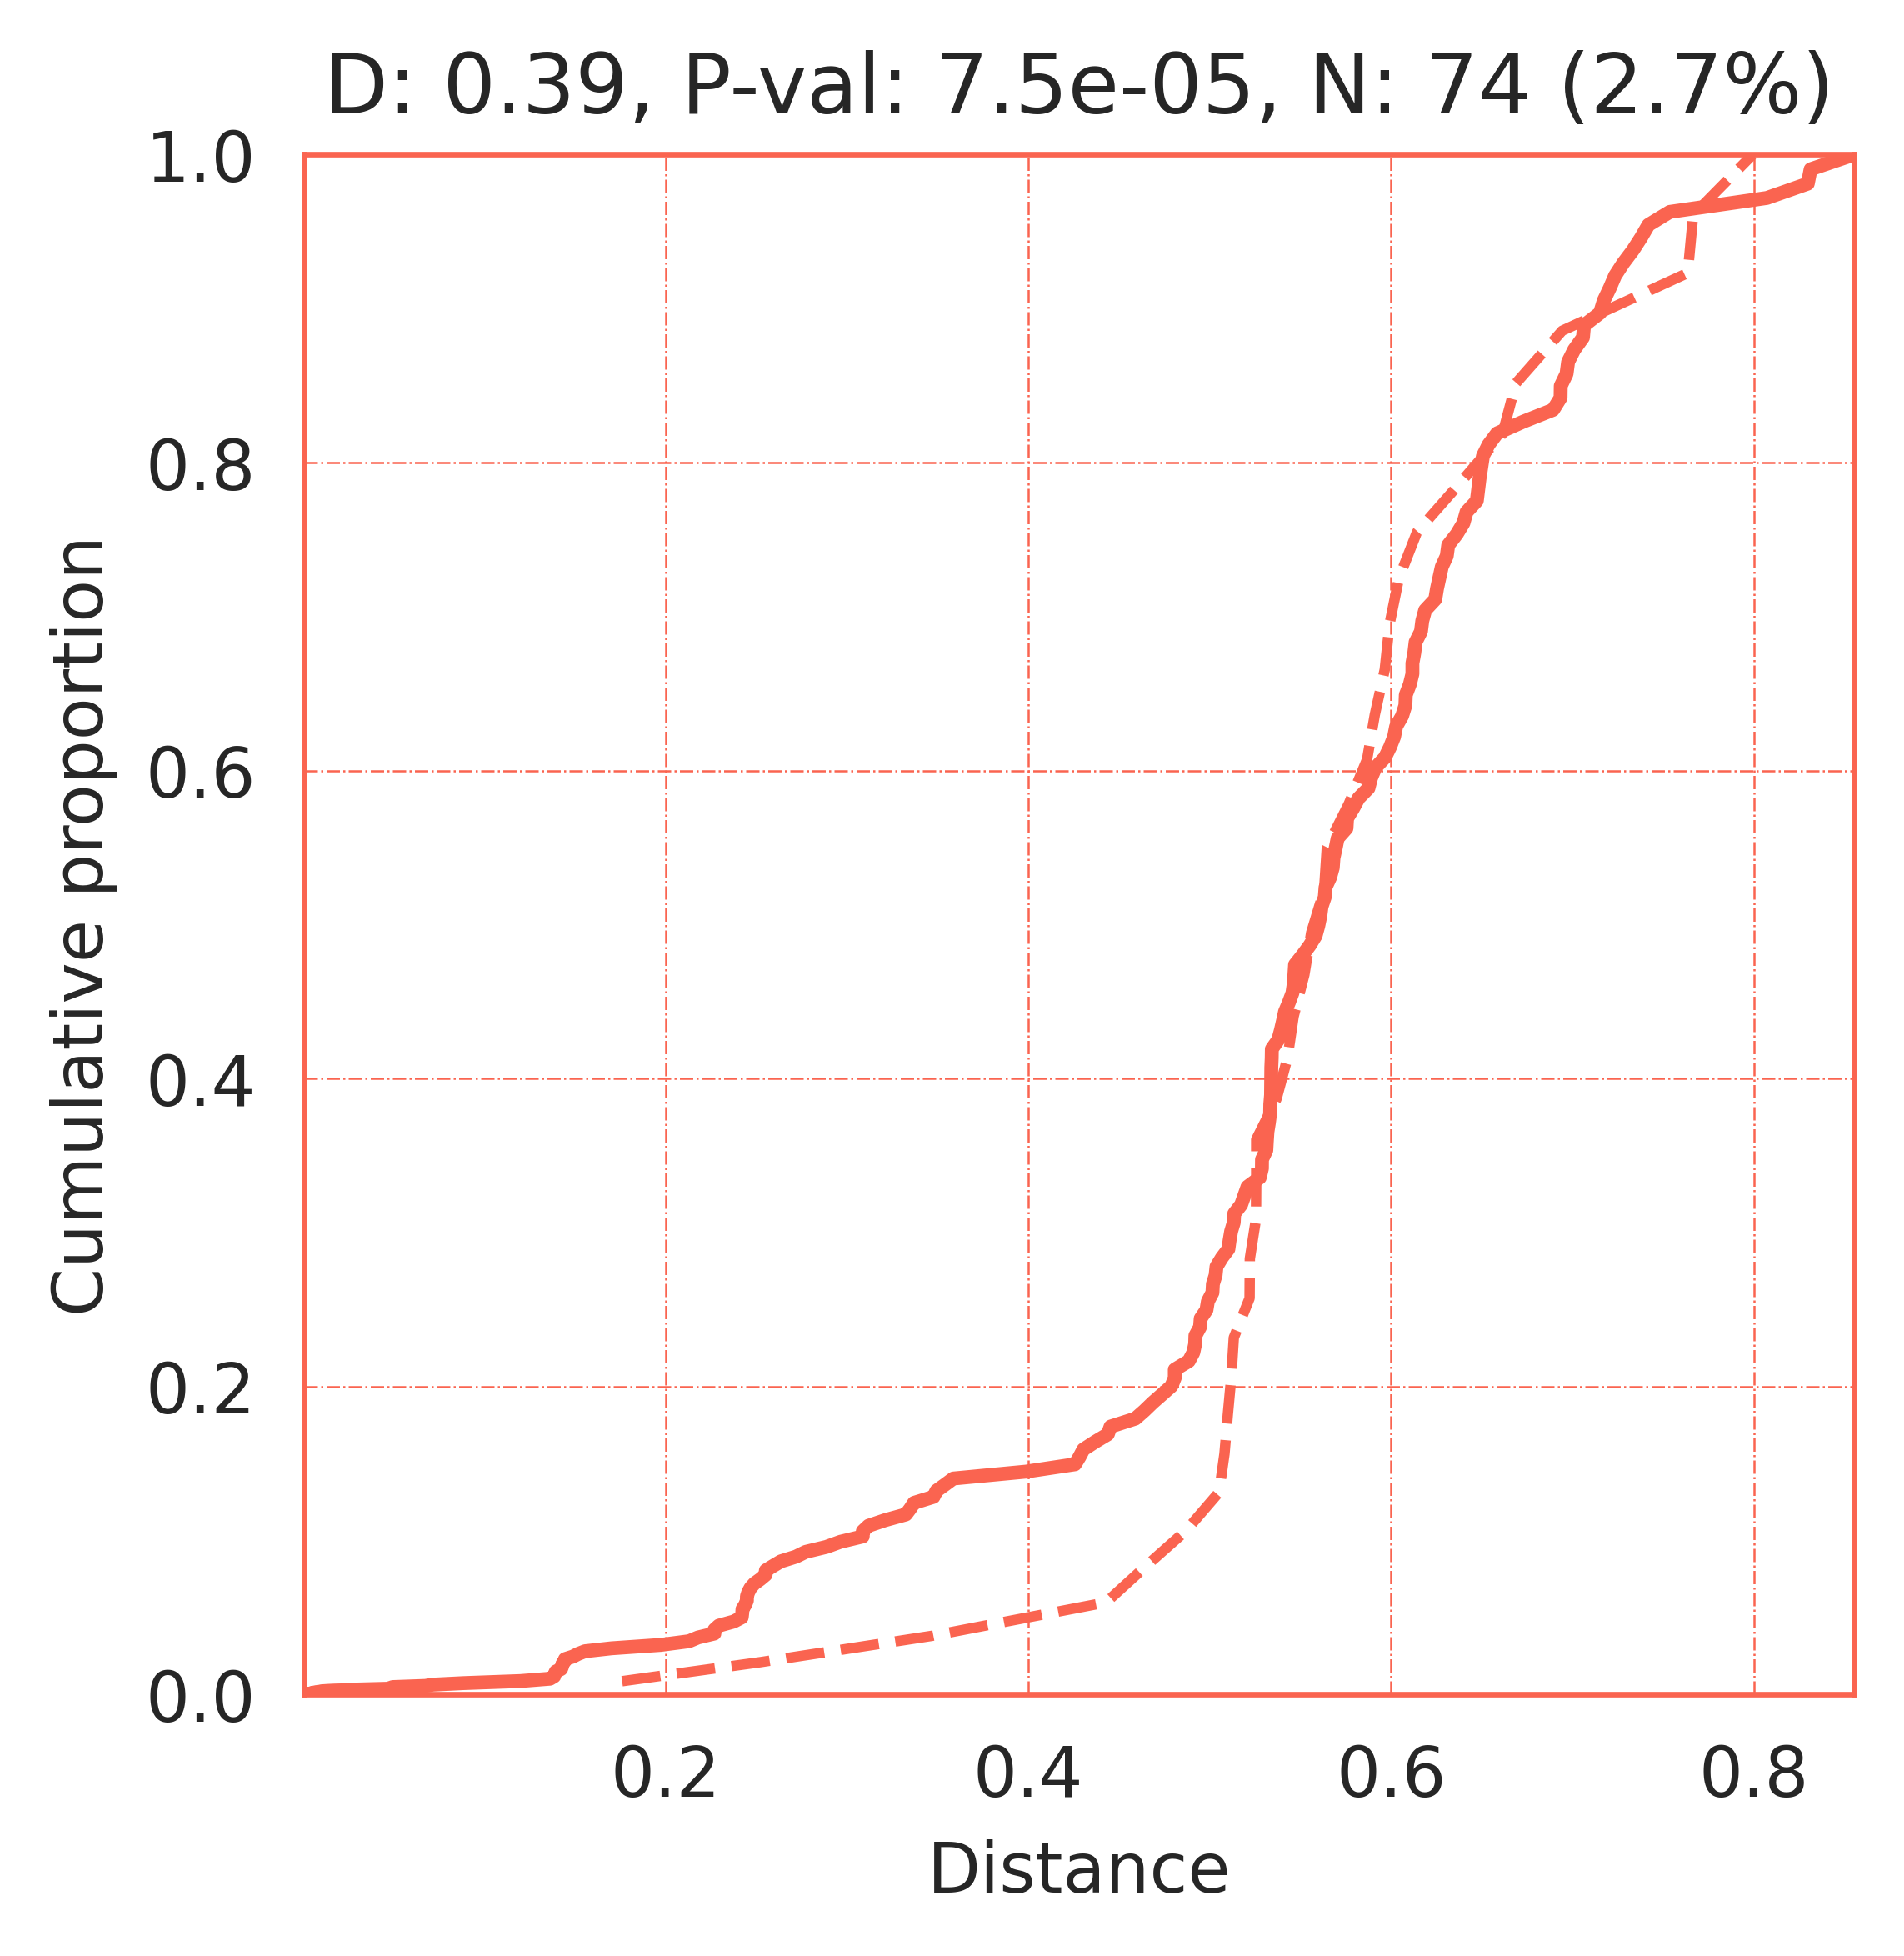

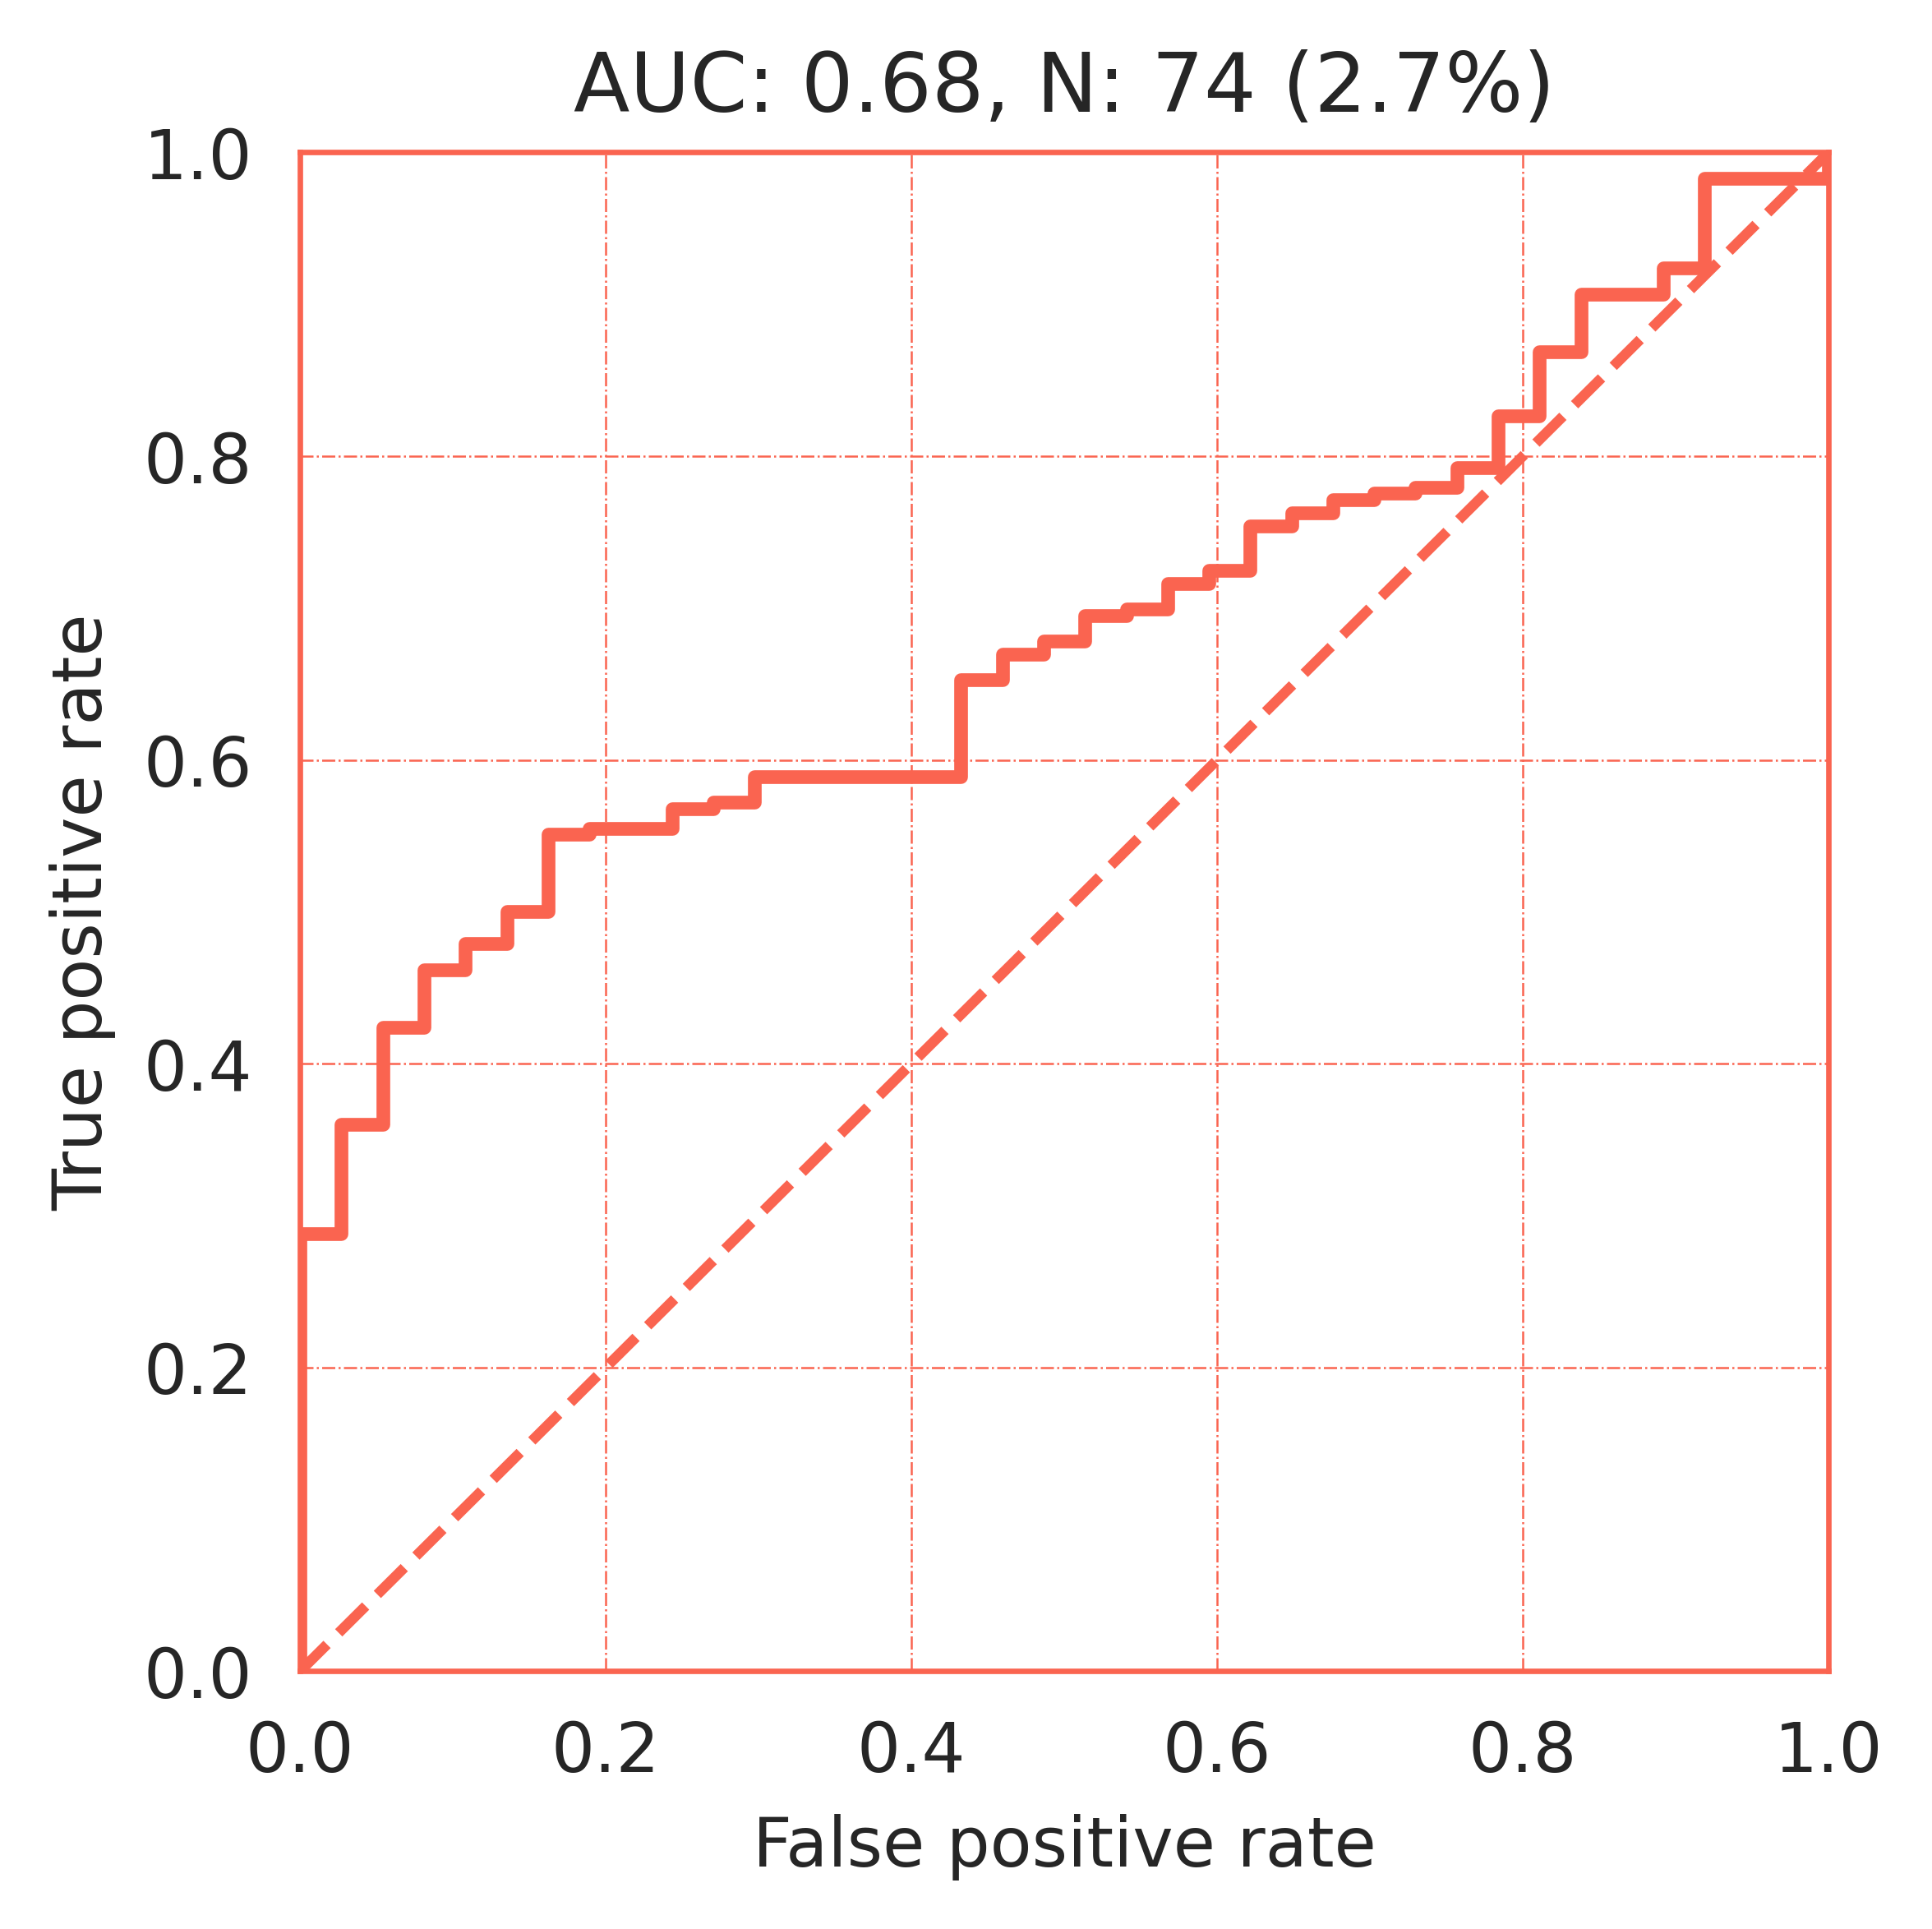

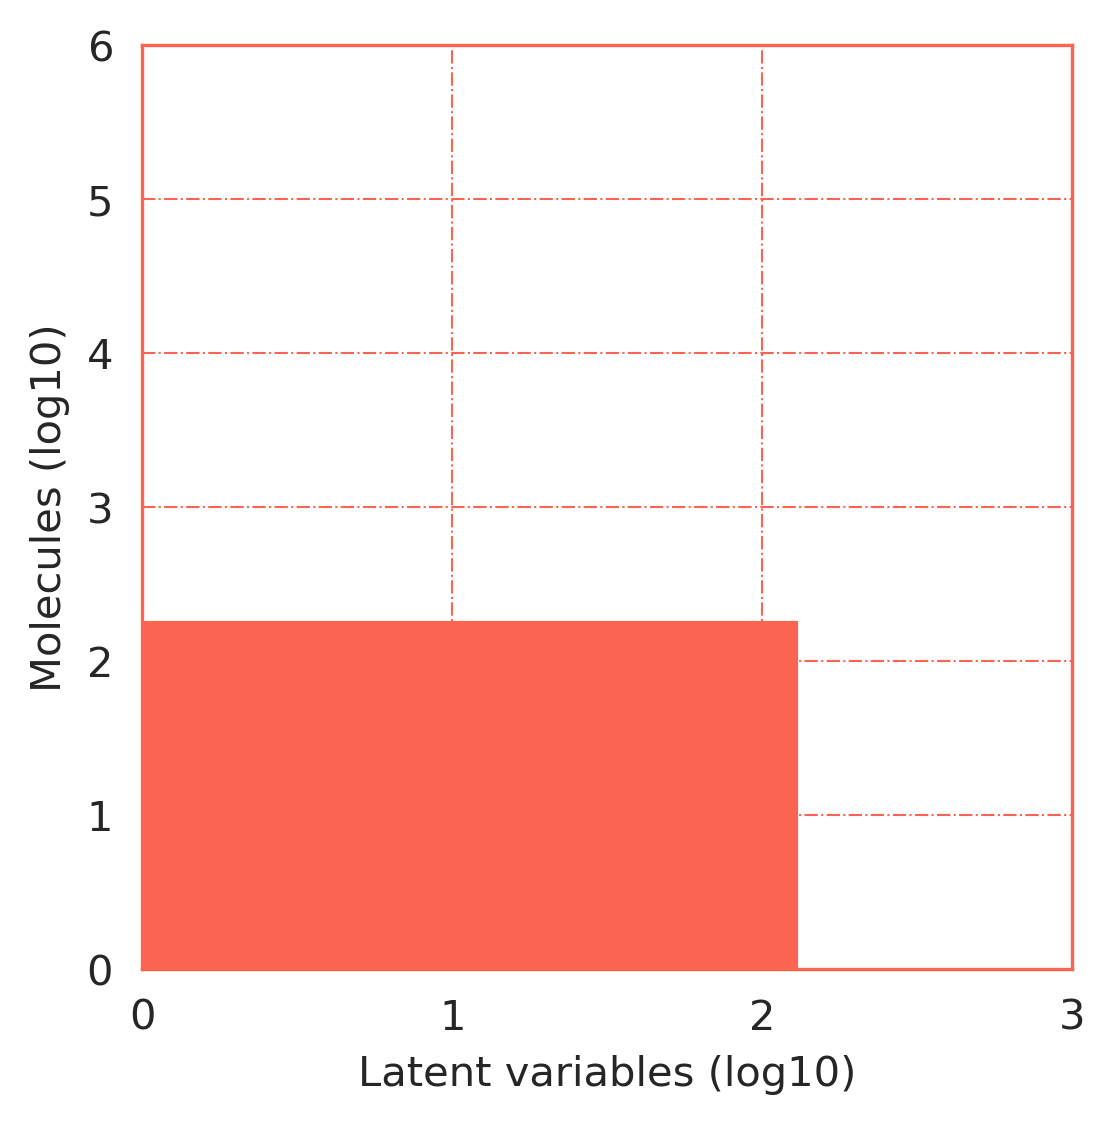

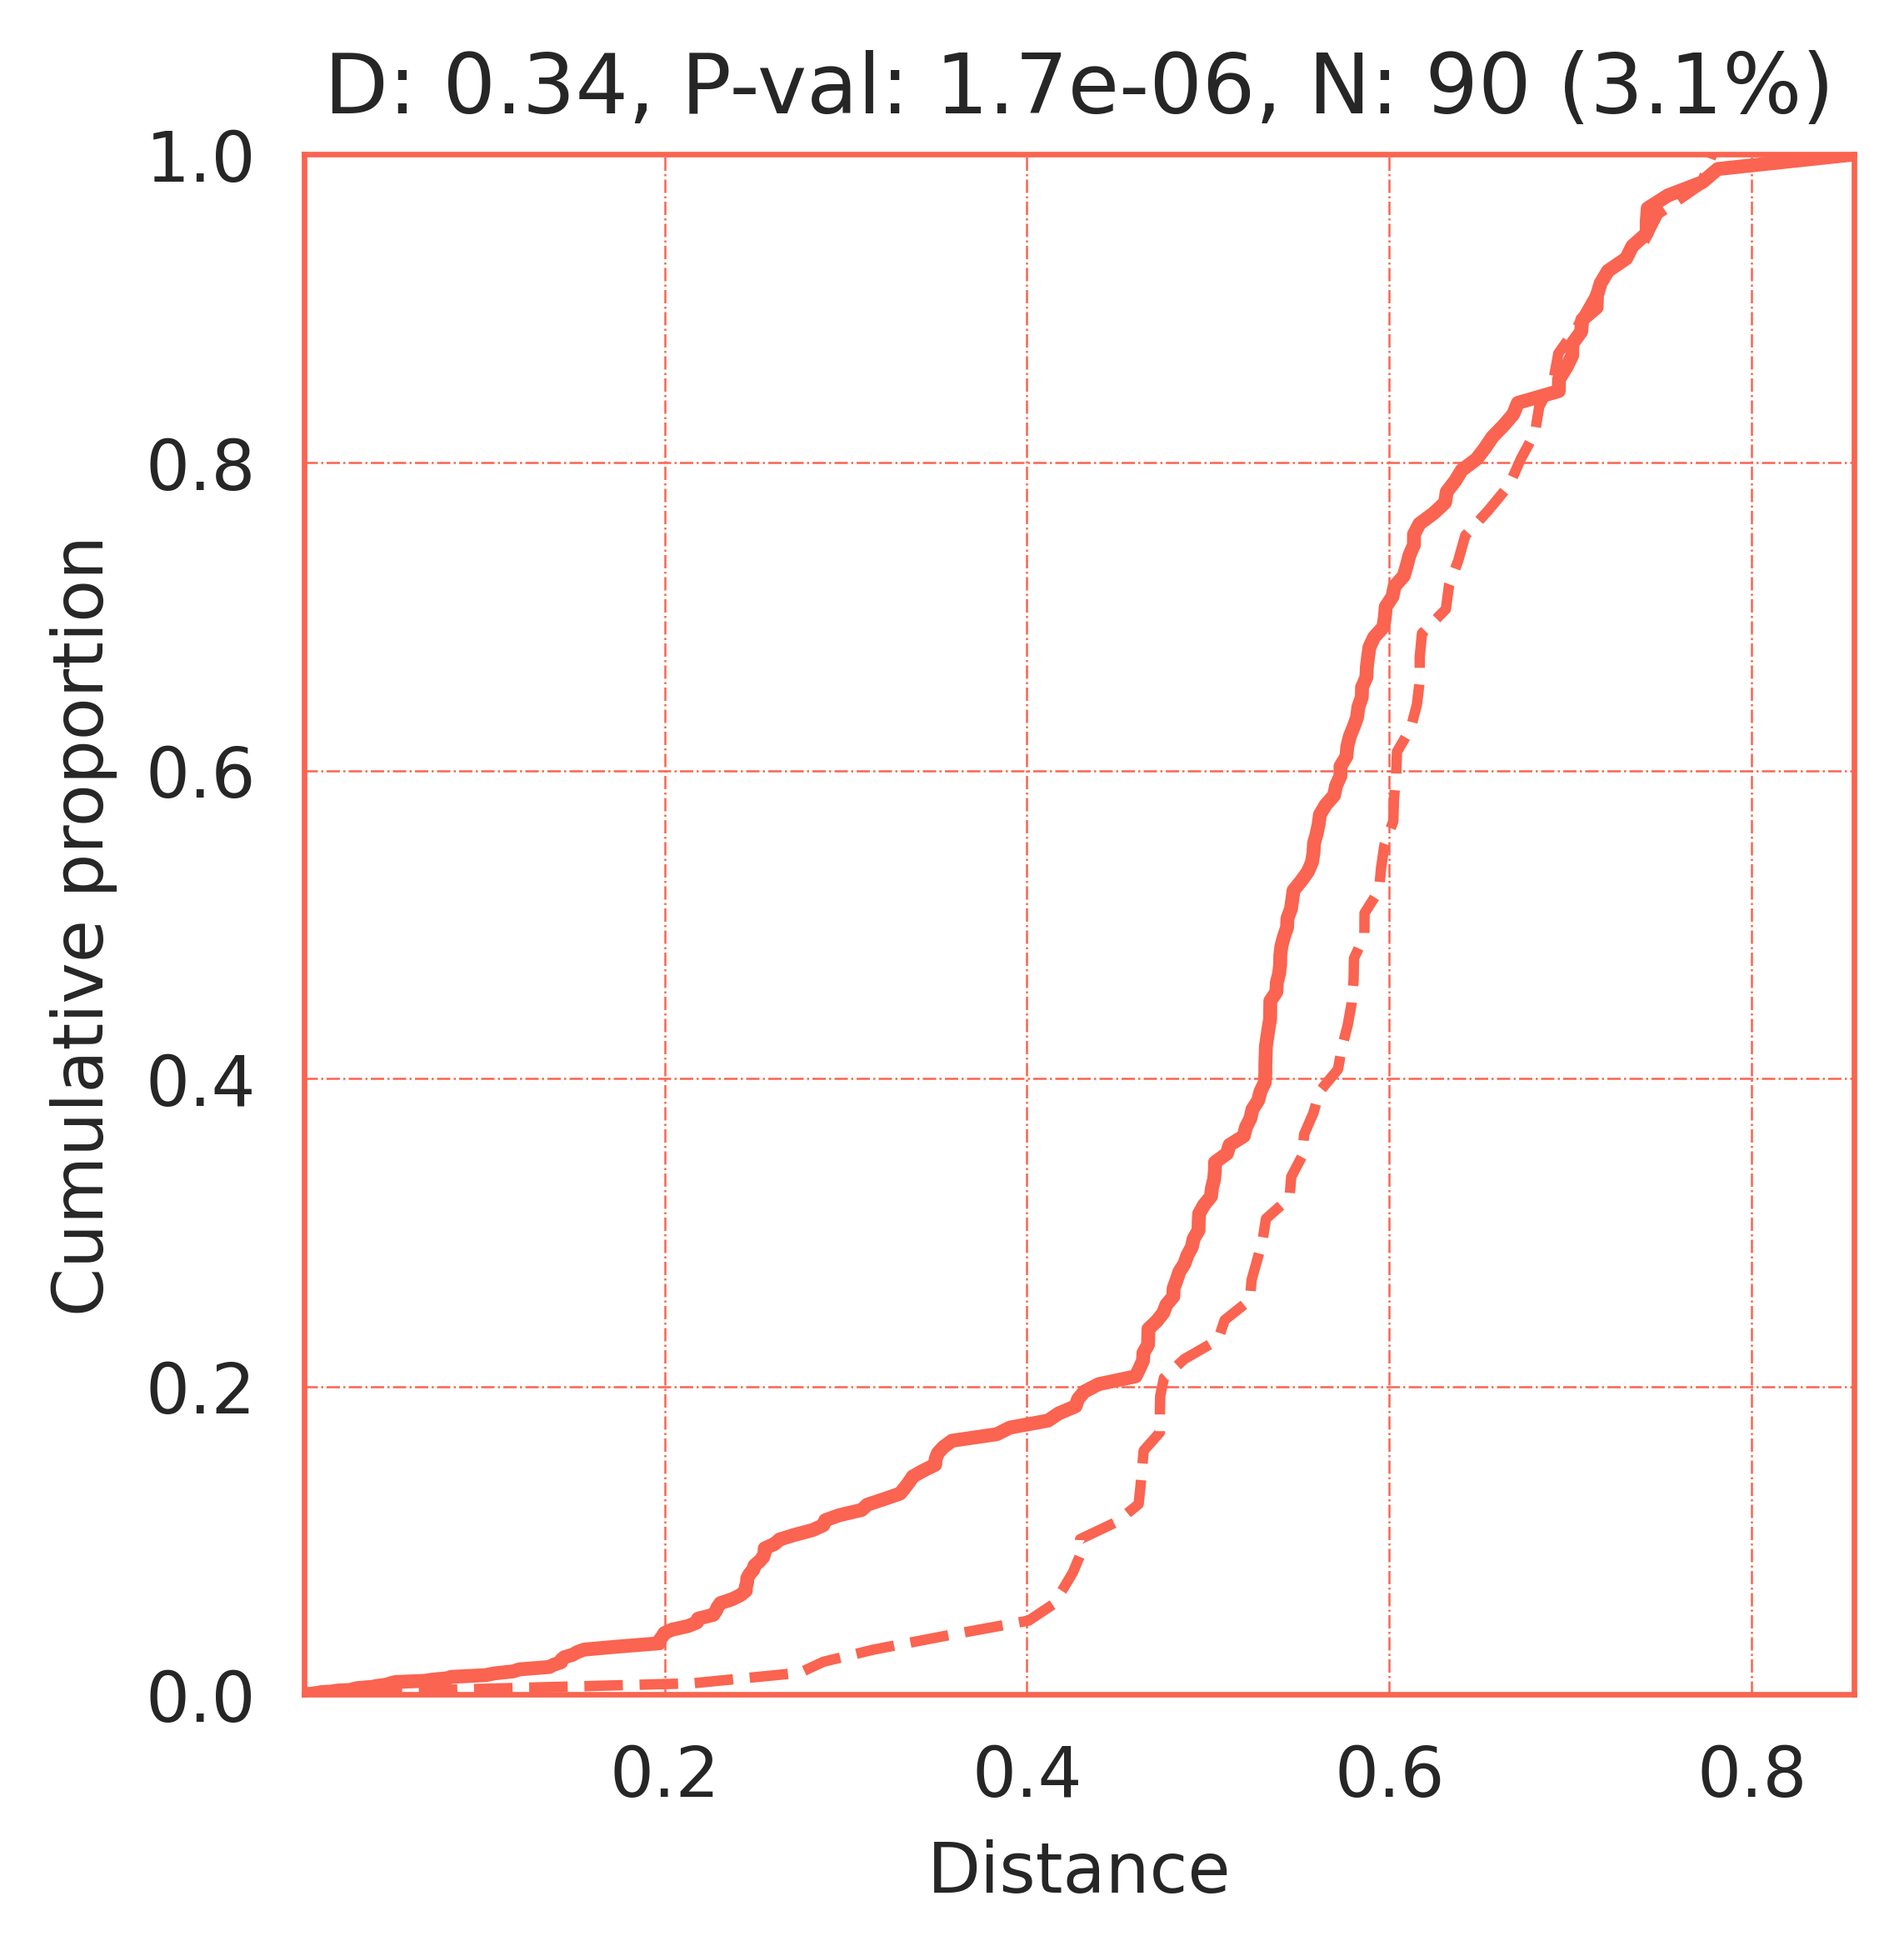

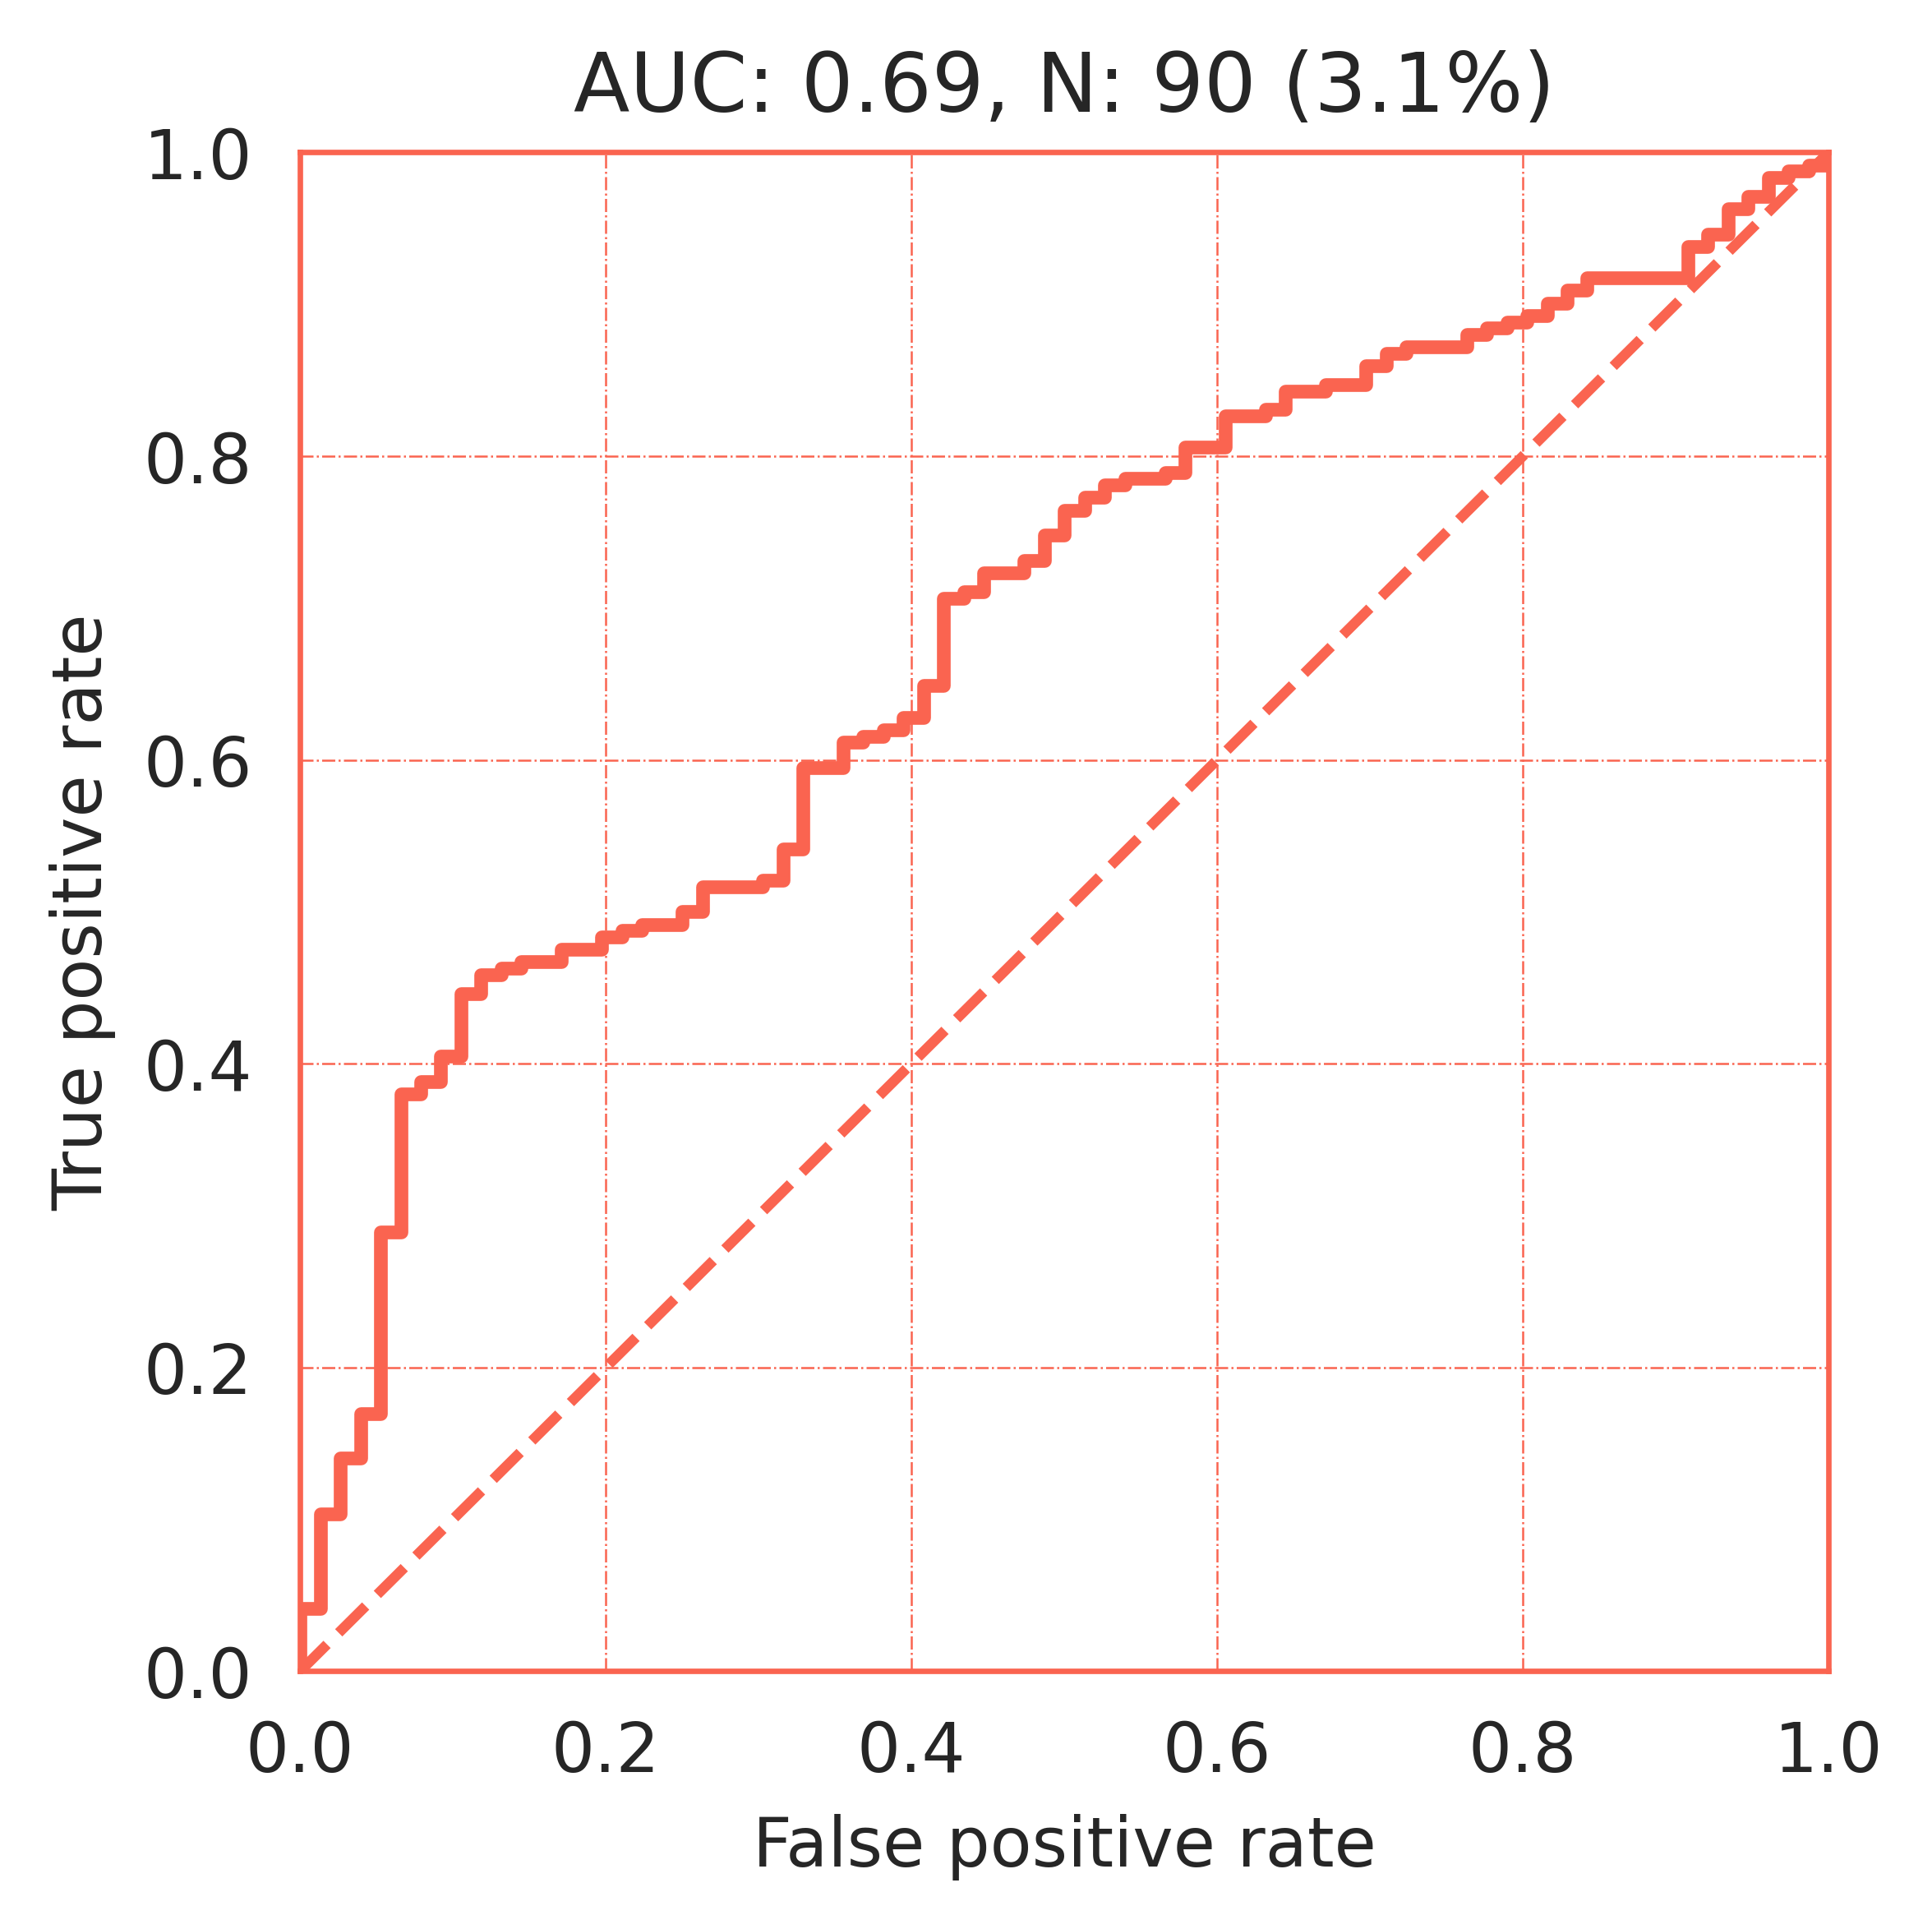

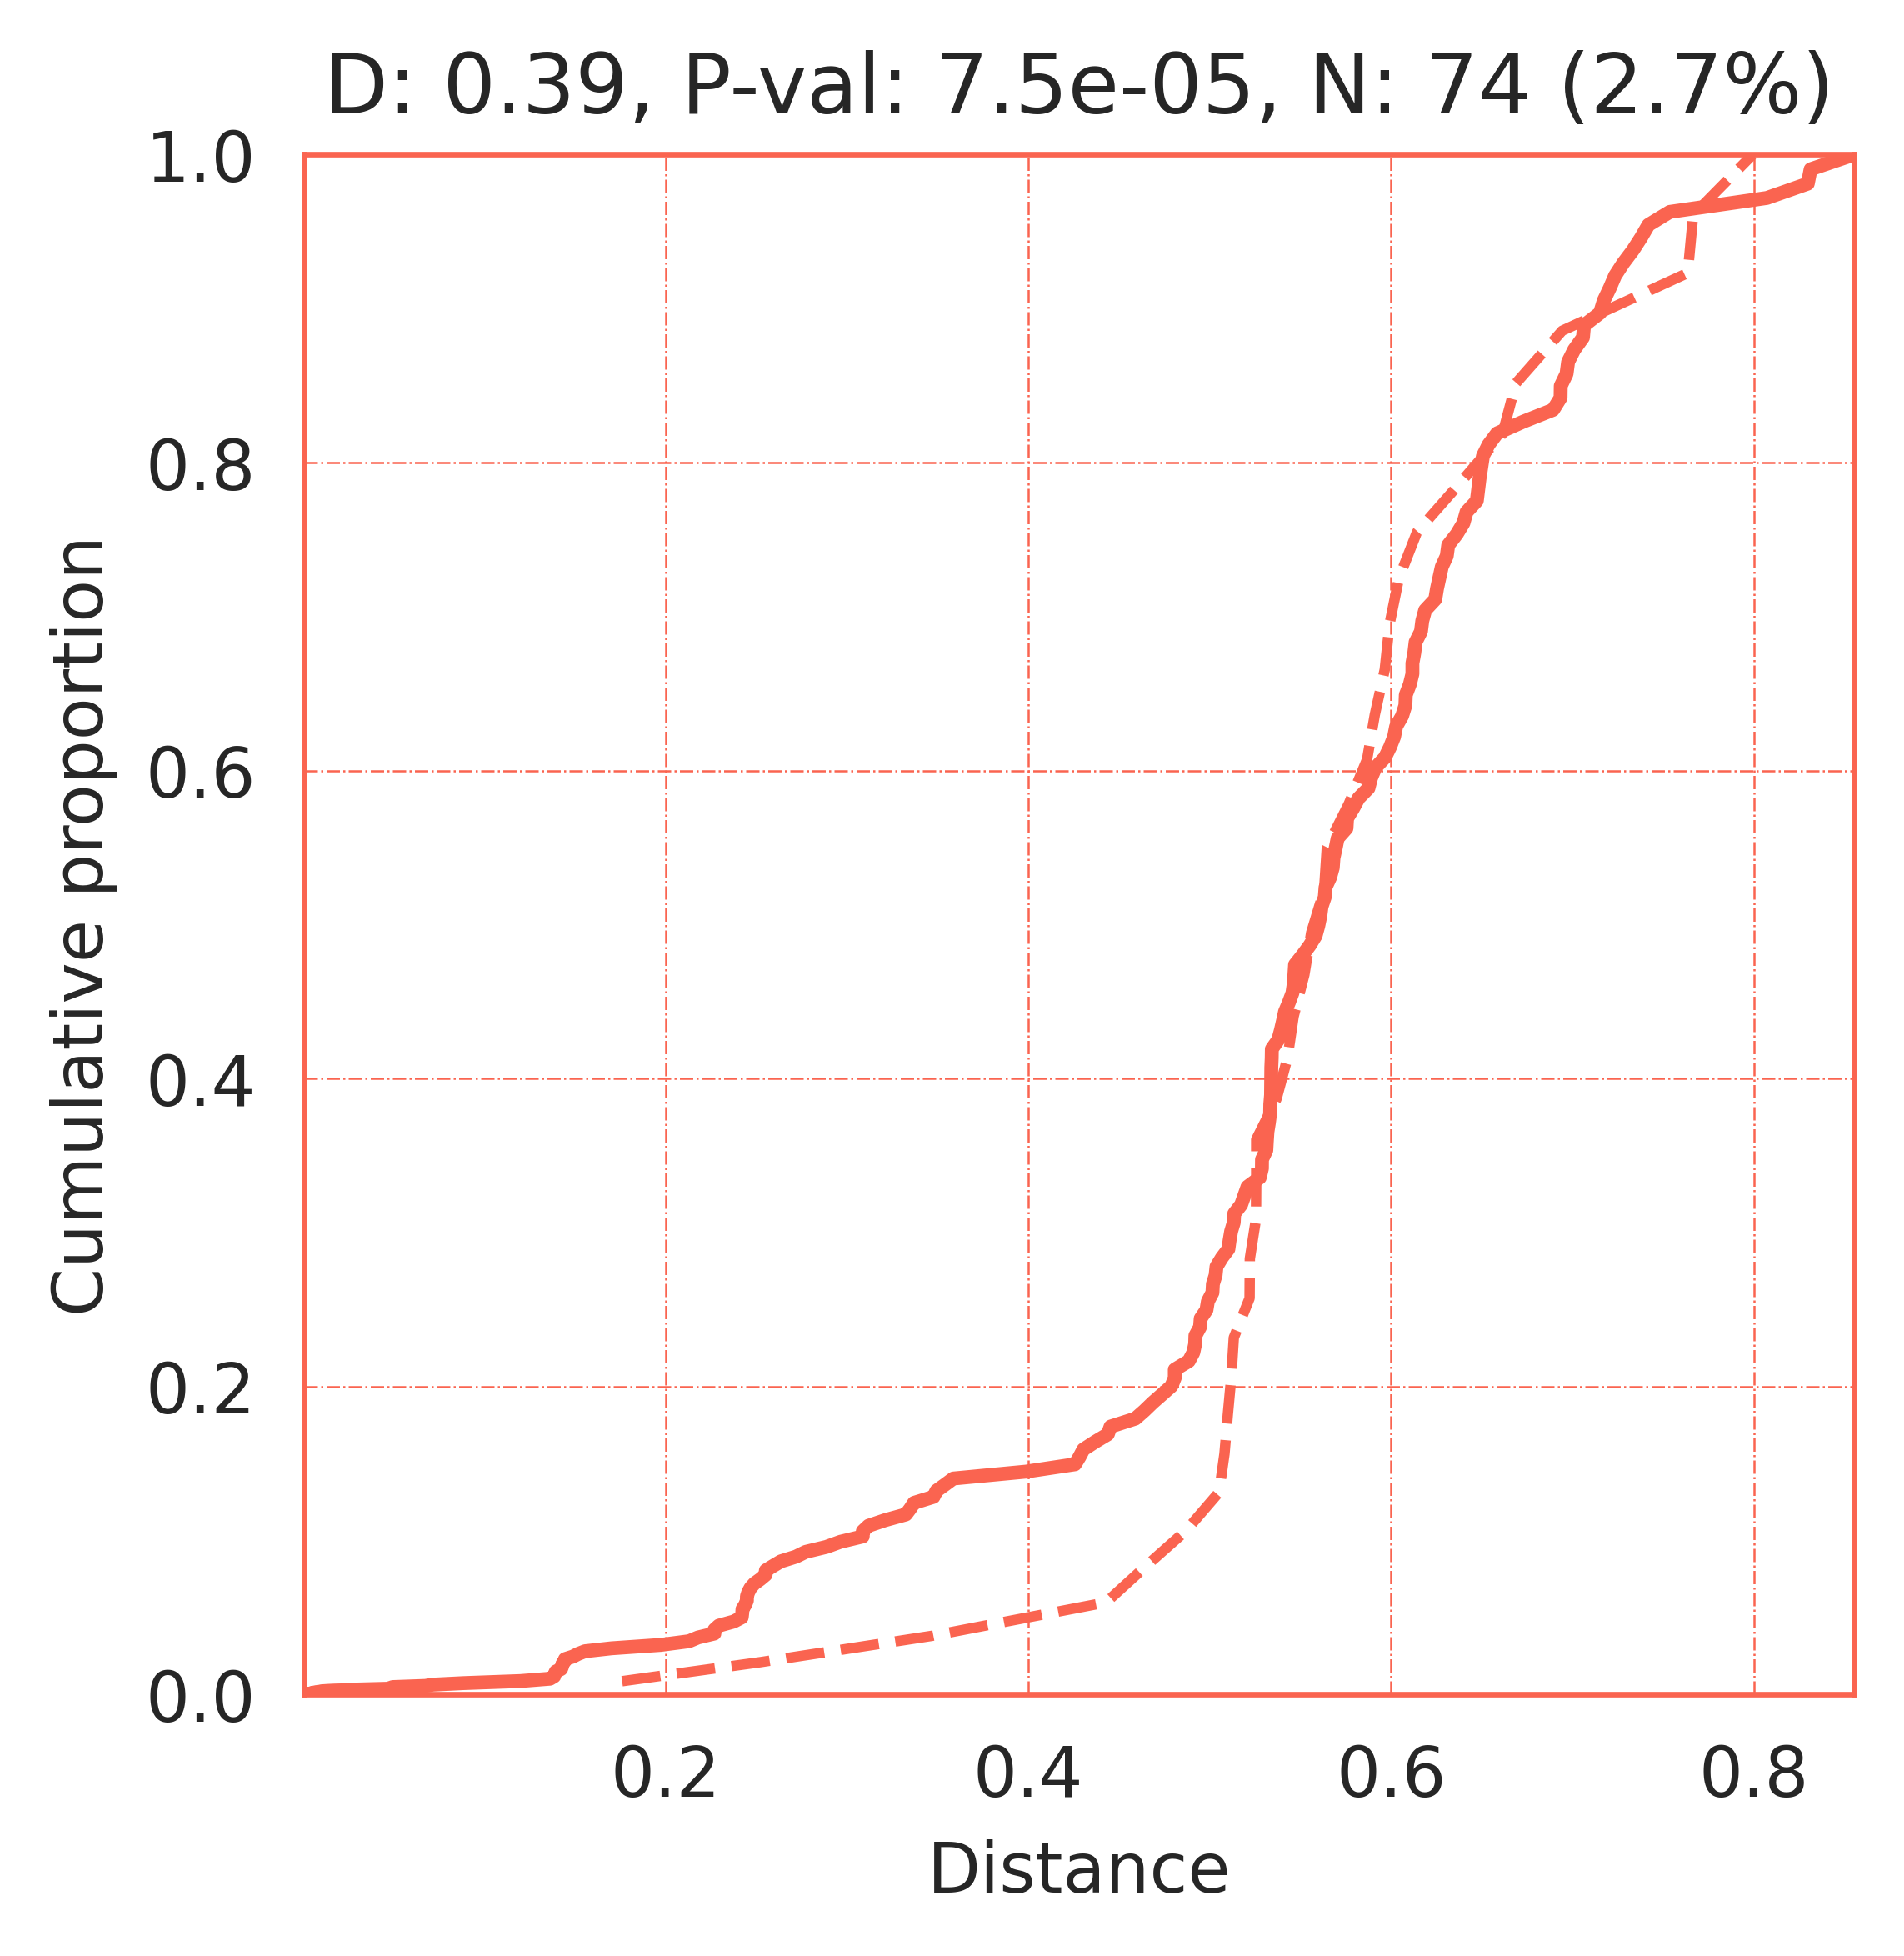

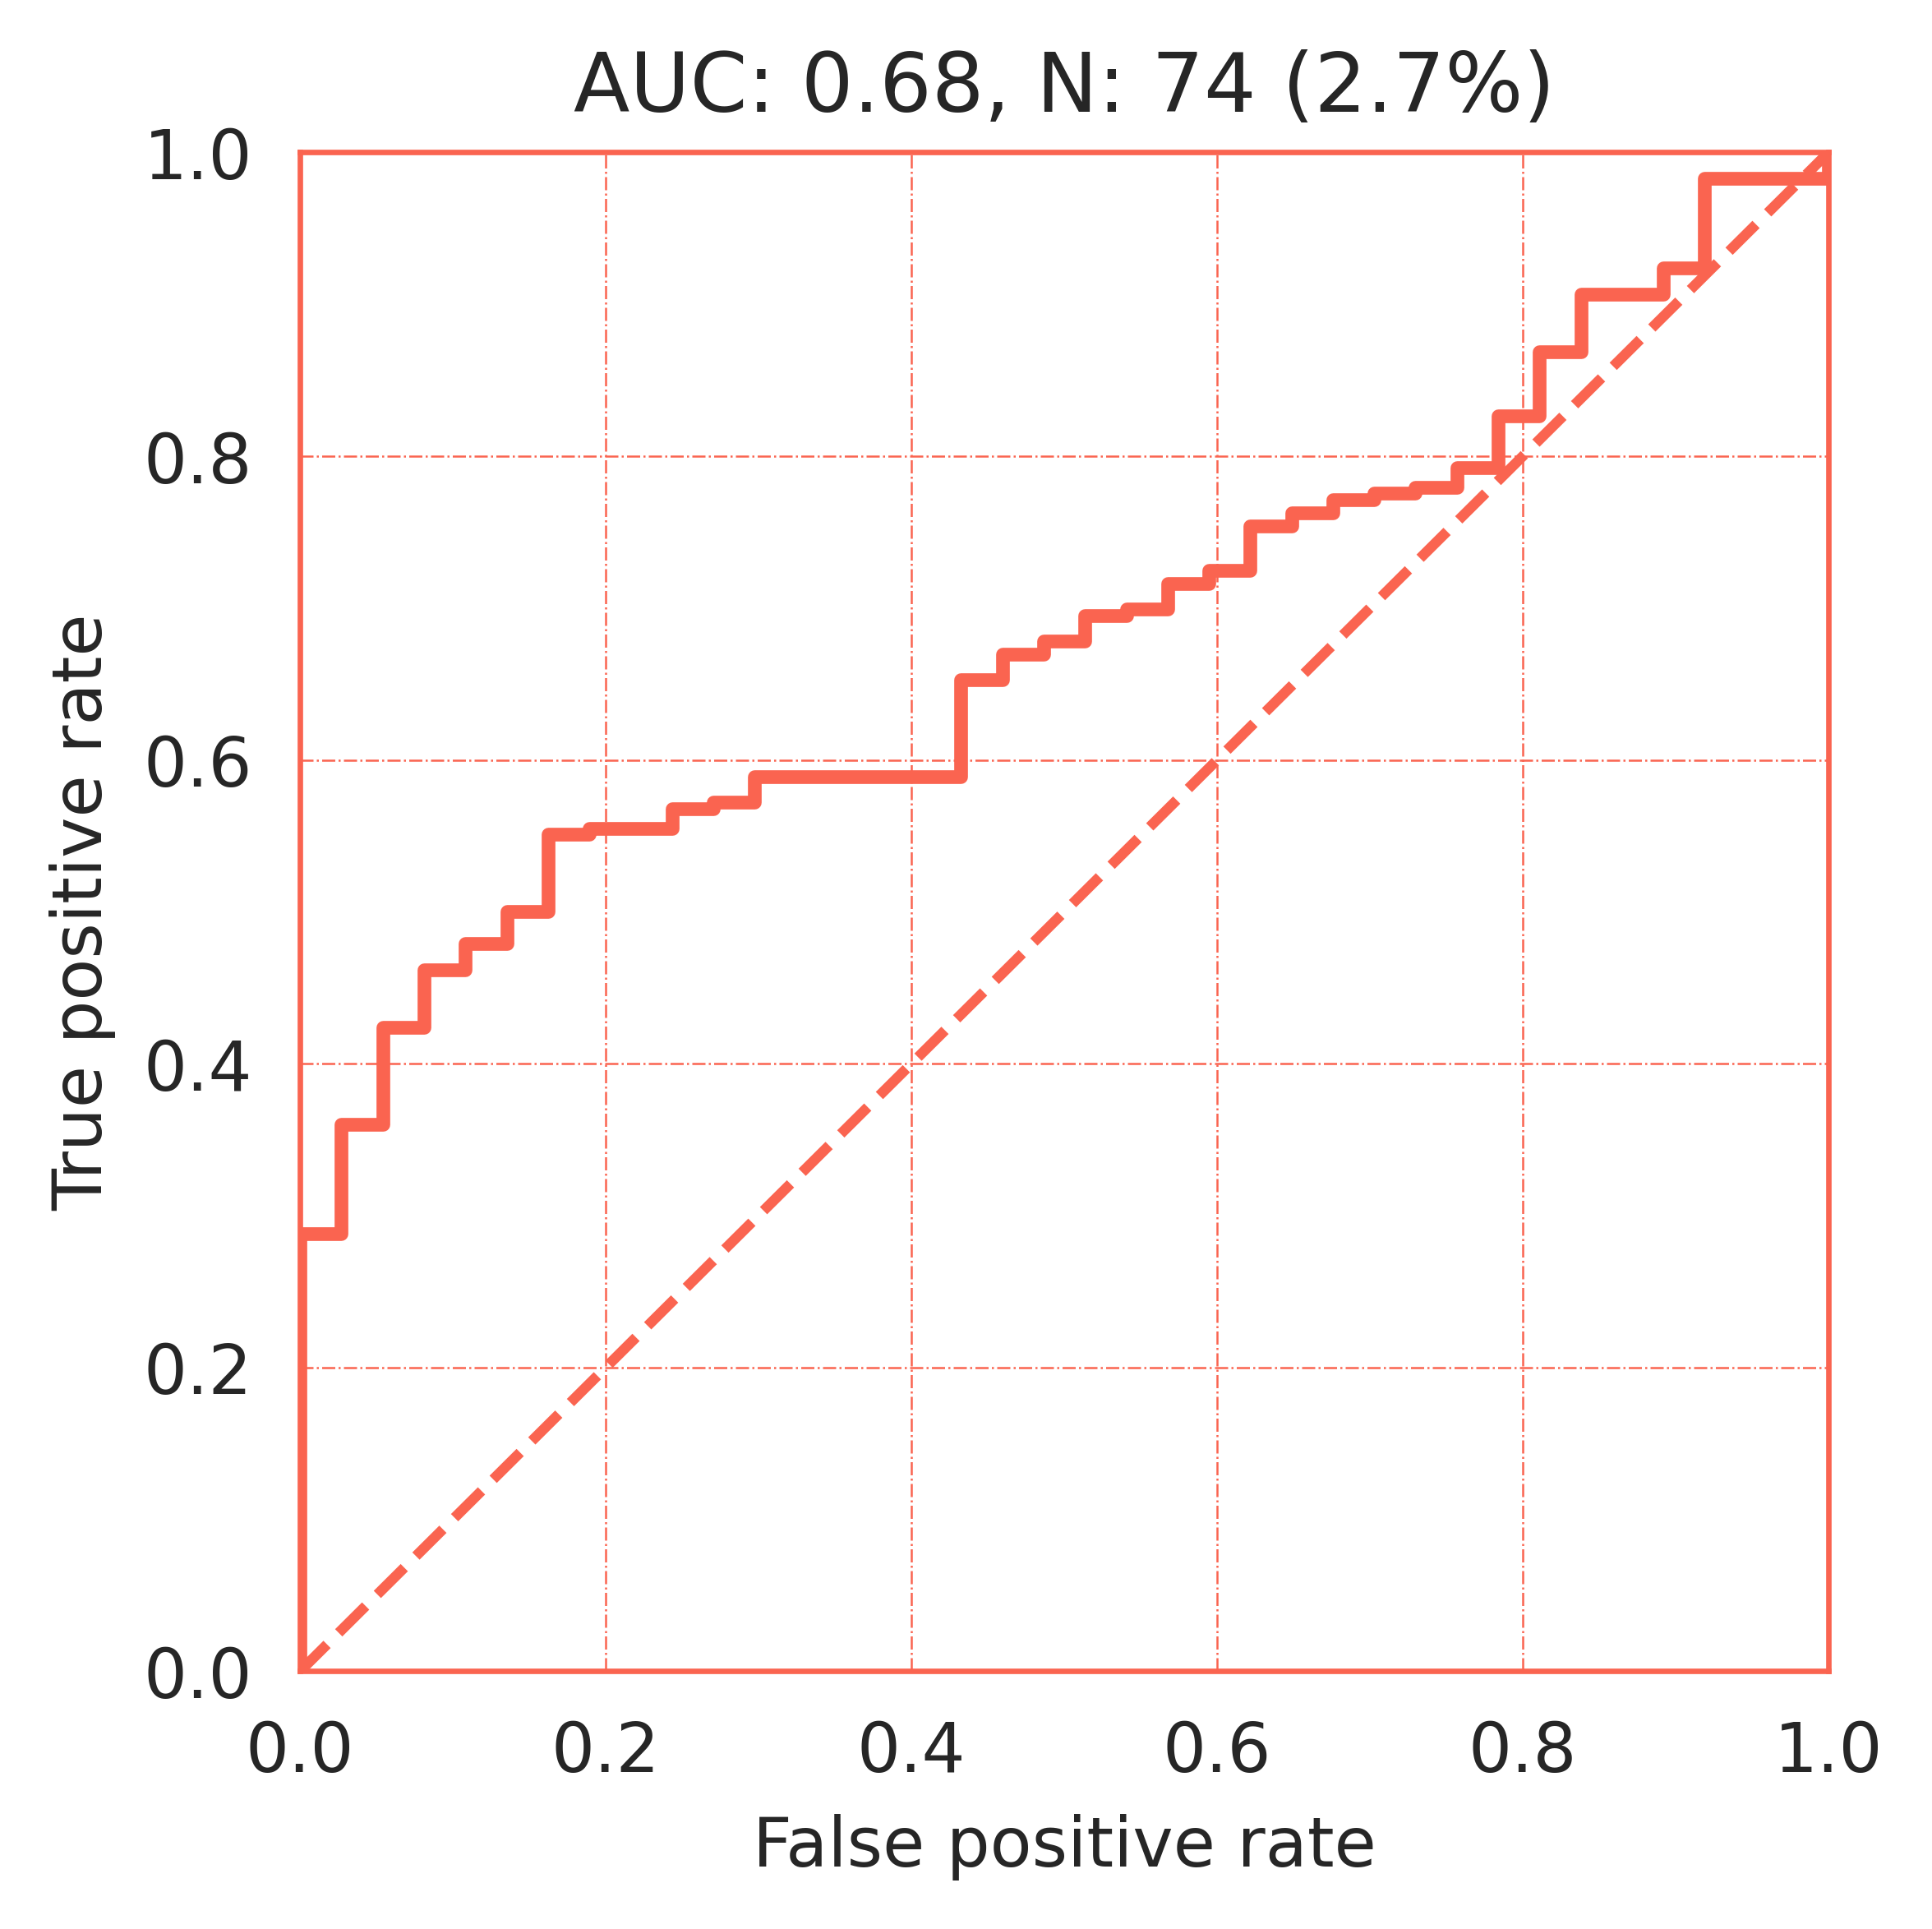

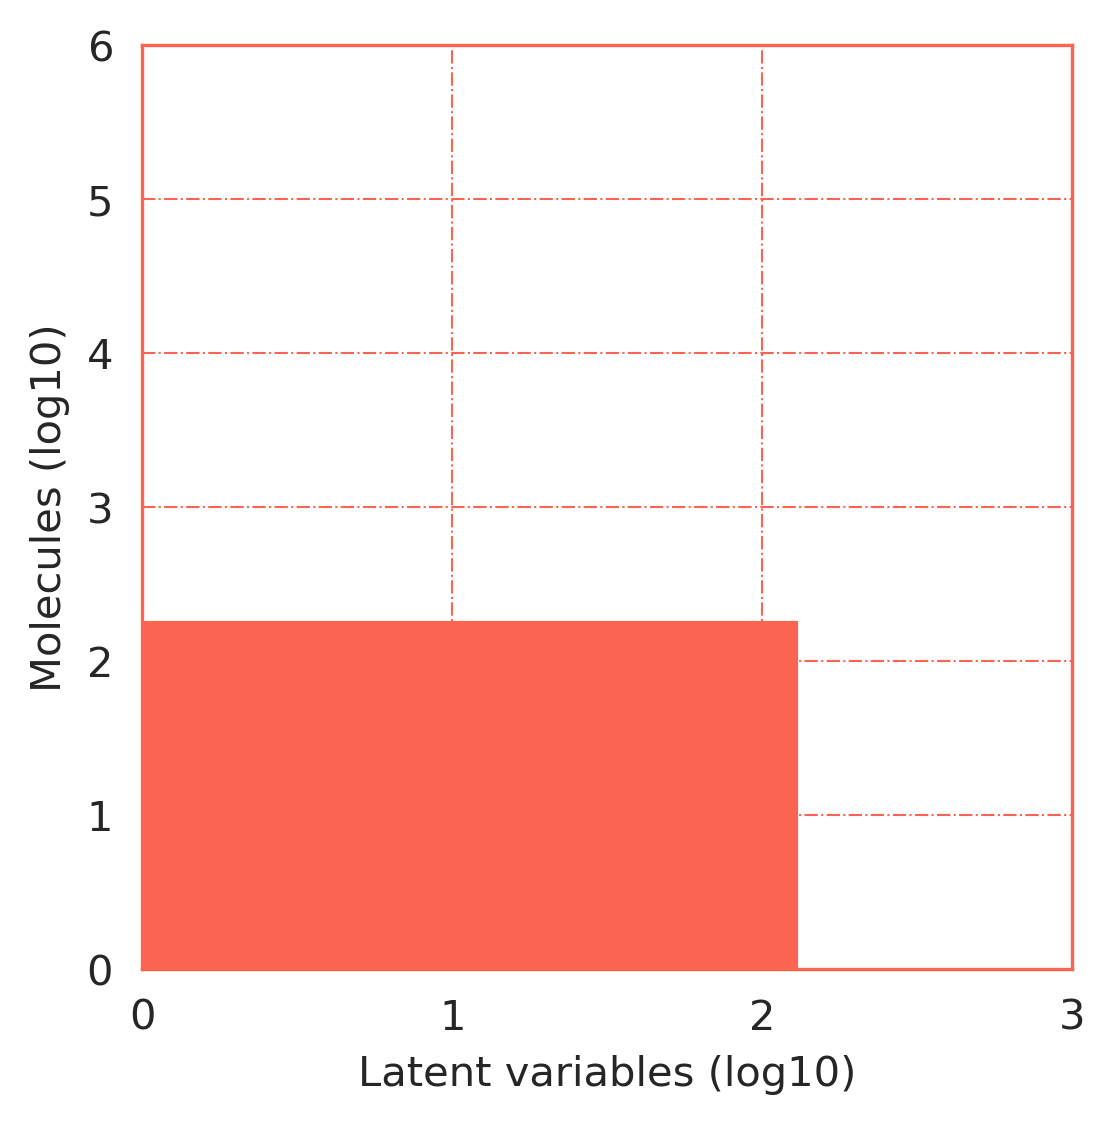

In [20]:
# Dataset Name
dataset = 'M1.001'

# Get sign1
sign1 = cc_local.get_signature('sign1', 'full', dataset)

# Get neig1
neig1 = cc_local.get_signature('neig1', 'full', dataset)  # By default, all vs ref

# Instantiation of sign2
sign2 = cc_local.signature(dataset, 'sign2')

# Cleaning both full and reference datasets. This is crucial!
sign2.clear_all()

# Fit sign2 given sign1 & neig1
sign2.fit(sign1, neig1, oos_predictor=False)

In [21]:
sign2.shape

(200, 128)

2024-10-17 12:27:21,621 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign2
2024-10-17 12:27:21,640 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_M1
2024-10-17 12:27:22,444 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across ROC
2024-10-17 12:27:22,453 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/A/A1/A1.001/sign0
2024-10-17 12:27:24,628 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/A/A1/A1.001/sign0
2024-10-17 12:27:31,859 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 188 rows from dataset V
2024-10-17 12:27:33,990 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 188 rows from dataset V
2

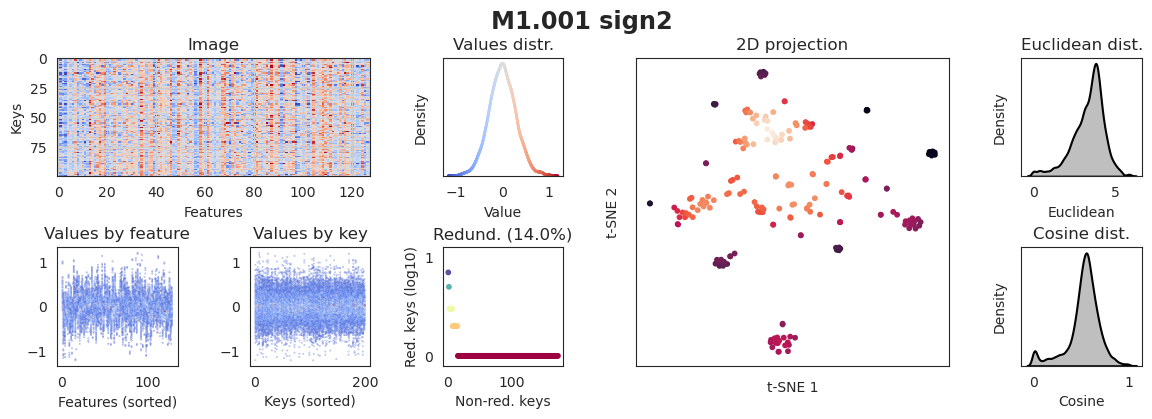

In [22]:
# Instantiation of sign2
sign2 = cc_local.signature(dataset, 'sign2')

# Instantiation of diag2 (diagnosis plots)
diag2 = sign2.diagnosis(ref_cctype='sign0')

# Including M1 into the ROC diagnosis plot
diag2.across_roc(include_datasets=[dataset], save=True, plot=False)

# Plot medium & small diagnosis plots
diag2.canvas(size='medium', savefig=True, savefig_kwargs={'dpi': 300})
diag2.canvas(size='small', savefig=True, savefig_kwargs={'dpi': 300})

In [24]:
np.min(np.array(sign2).flatten()), np.max(np.array(sign2).flatten())

(-1.21556, 1.22278)

## sign3 ##

In [3]:
# Dataset Name
dataset = 'M1.001'

# Get CC universe
cc_universe = []
for dat in cc_local.datasets:
    if dat != dataset and dat.endswith('001'):
        cc_universe.extend(cc_local.get_signature('sign2', 'full', dat).keys)
cc_universe = set(cc_universe)

# Get sign2
sign2 = cc_local.signature(dataset, 'sign2')

# Get M1 molecules
m1_molecules = set(sign2.keys)

print("Number of molecules in the CC universe: " + str(len(cc_universe)))
print("Number of molecules in M1 sign2: " + str(len(m1_molecules)))
print("Intersection CC & M1: " + str(len(cc_universe.intersection(m1_molecules))))

2024-10-18 16:20:08,857 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/A/A1/A1.001/sign2
2024-10-18 16:20:11,095 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/A/A2/A2.001/sign2
2024-10-18 16:20:12,578 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/A/A3/A3.001/sign2
2024-10-18 16:20:14,572 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/A/A4/A4.001/sign2
2024-10-18 16:20:16,594 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/A/A5/A5.001/sign2
2024-10-18 16:20:18,514 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protoco

Number of molecules in the CC universe: 1009293
Number of molecules in M1 sign2: 200
Intersection CC & M1: 188


In [4]:
# Instantiation of sign3
sign3 = cc_local.signature(dataset, 'sign3')
sign3.clear_all()

# Create a list of sign2 to feed sign3 -- using the 25 CC spaces & M1
sign2_list = list()

# For each CC space
for ds in cc_local.coordinates:
    ds += '.001'
    sign2_list.append(cc_local.get_signature('sign2', 'full', ds))

# Append the new M1 space
sign2_list.append(cc_local.get_signature('sign2','full', dataset))

# In total, we now have 26 spaces
print(len(sign2_list))

# Get M1 sign1
sign1_self = cc_local.signature(dataset, 'sign1')

# Get M1 sign2
sign2_self = cc_local.signature(dataset, 'sign2')

2024-10-18 16:20:26,113 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign3
2024-10-18 16:20:26,115 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign1
2024-10-18 16:20:26,119 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/reference/M/M1/M1.001/sign1
2024-10-18 16:20:26,121 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/reference/M/M1/M1.001/sign1
2024-10-18 16:20:26,122 chemicalchecker.core.sign1.sign1 [DEBUG   ] Reading triplets
2024-10-18 16:20:26,122 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/reference/M/M1/M1.001/sign1
2024-10-18 16:20:26,124 chemicalche

26


In [5]:
# Fit sign3 

# Option 1: in the cluster
kwargs = {"cpu": 5, "mem_by_core": 12, "wait": False}
sign3.fit_hpc(sign2_list, sign2_self, sign1_self, sign2_universe=None, complete_universe="full", sign2_coverage=None, hpc_args=kwargs)

# Option 2: locally

2024-10-18 16:20:26,232 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/acomajuncosa/cc_config.json
2024-10-18 16:20:26,233 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/acomajuncosa/cc_config.json
2024-10-18 16:20:26,244 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: slurmGPU
2024-10-18 16:20:26,245 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object slurmGPU
2024-10-18 16:20:27,424 chemicalchecker.util.hpc.slurm_gpu.slurmGPU [DEBUG   ] Job name is: CC_SIGN3_M1.001_fit__
2024-10-18 16:20:27,425 chemicalchecker.util.hpc.slurm_gpu.slurmGPU [DEBUG   ] memory : 12
2024-10-18 16:20:27,426 chemicalchecker.util.hpc.slurm_gpu.slurmGPU [WARNING ] The Singularity command submitted doesn't contain a necessary argument: Adding  --cleanenv --nv
2024-10-18 16:20:27,427 chemicalchecker.util.hpc.slurm_gpu.slurmGPU [WARNING ] New command format: SINGULARITYENV_PYTHONPATH=/aloy/home

In [3]:
dataset = 'M1.001'

# Instantiation of sign3
sign3 = cc_local.signature(dataset, 'sign3')

print(sign3.shape)

2024-04-08 09:14:35,555 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign3


(1009305, 128)


In [10]:
signatures = np.array(sign3)

In [15]:
min(signatures.flatten()), max(signatures.flatten())

(-0.24733184278011322, 0.25538304448127747)

2024-04-07 16:26:13,620 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/M/M1/M1.001/sign3
2024-04-07 16:26:13,623 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_M1
2024-04-07 16:26:13,760 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across ROC
2024-04-07 16:26:13,762 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/A/A1/A1.001/sign0
2024-04-07 16:26:16,135 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_M1/full/A/A1/A1.001/sign0
2024-04-07 16:26:30,363 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 10000 rows from dataset V
2024-04-07 16:28:22,613 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 10000 rows from dataset

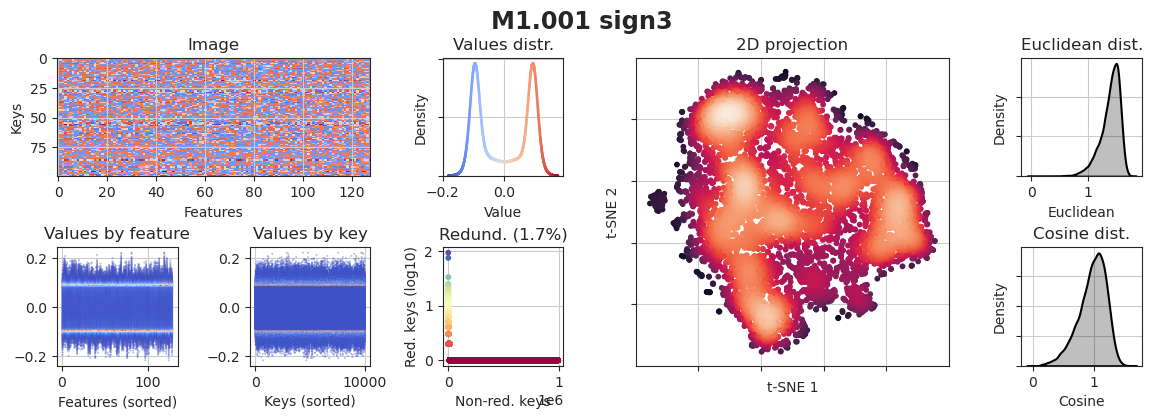

In [3]:
dataset = 'M1.001'

# Instantiation of sign3
sign3 = cc_local.signature(dataset, 'sign3')

# Instantiation of diag3 (diagnosis plots)
diag3 = sign3.diagnosis(ref_cctype='sign0')

# Including M1 into the ROC diagnosis plot
diag3.across_roc(include_datasets=[dataset], save=True, plot=False)

# Plot medium & small diagnosis plots
diag3.canvas(size='medium', savefig=True, savefig_kwargs={'dpi': 300})
diag3.canvas(size='small', savefig=True, savefig_kwargs={'dpi': 300})